In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1

from fastf1 import core,ergast,events,livetiming,plotting
from matplotlib.collections import LineCollection

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [2]:
#!pip install fastf1

In [3]:
#list of events
year  = int(input("Enter F1 Season: "))
season_data = fastf1.get_event_schedule(year,include_testing=False)
season_data.drop(['Session1Date','Session2Date','Session3Date','Session4Date','Session5Date','F1ApiSupport'],axis=1,inplace=True)
print(f"Year : {year}")
season_data

Enter F1 Season:  2024


req         WARNING 	DEFAULT CACHE ENABLED! (318.49 MB) /Users/chandan/Library/Caches/fastf1
logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!


Year : 2024


RoundNumber        Country     Location OfficialEventName  \
0             1        Bahrain       Sakhir                     
1             2   Saudi Arabia       Jeddah                     
2             3      Australia    Melbourne                     
3             4          Japan       Suzuka                     
4             5          China     Shanghai                     
5             6            USA        Miami                     
6             7          Italy        Imola                     
7             8         Monaco  Monte-Carlo                     
8             9         Canada     Montreal                     
9            10          Spain     Montmeló                     
10           11        Austria    Spielberg                     
11           12             UK  Silverstone                     
12           13        Hungary     Budapest                     
13           14        Belgium          Spa                     
14           15    Netherlands    Zandvoort                     
15           16          Italy        Monza                     
16           17     Azerbaijan         Baku                     
17           18      Singapore   Marina Bay                     
18           19            USA       Austin                     
19           20         Mexico  Mexico City                     
20           21         Brazil    São Paulo                     
21           22  United States    Las Vegas                     
22           23          Qatar    Al Daayen                     
23           24            UAE    Abu Dhabi                     

             EventDate                  EventName   EventFormat    Session1  \
0  2024-03-02 15:00:00         Bahrain Grand Prix  conventional  Practice 1   
1  2024-03-09 17:00:00   Saudi Arabian Grand Prix  conventional  Practice 1   
2  2024-03-24 04:00:00      Australian Grand Prix  conventional  Practice 1   
3  2024-04-07 05:00:00        Japanese Grand Prix  conventional  Practice 1   
4  2024-04-21 07:00:00         Chinese Grand Prix        sprint  Practice 1   
5  2024-05-05 20:00:00           Miami Grand Prix        sprint  Practice 1   
6  2024-05-19 13:00:00  Emilia Romagna Grand Prix  conventional  Practice 1   
7  2024-05-26 13:00:00          Monaco Grand Prix  conventional  Practice 1   
8  2024-06-09 18:00:00        Canadian Grand Prix  conventional  Practice 1   
9  2024-06-23 13:00:00         Spanish Grand Prix  conventional  Practice 1   
10 2024-06-30 13:00:00        Austrian Grand Prix        sprint  Practice 1   
11 2024-07-07 14:00:00         British Grand Prix  conventional  Practice 1   
12 2024-07-21 13:00:00       Hungarian Grand Prix  conventional  Practice 1   
13 2024-07-28 13:00:00         Belgian Grand Prix  conventional  Practice 1   
14 2024-08-25 13:00:00           Dutch Grand Prix  conventional  Practice 1   
15 2024-09-01 13:00:00         Italian Grand Prix  conventional  Practice 1   
16 2024-09-15 11:00:00      Azerbaijan Grand Prix  conventional  Practice 1   
17 2024-09-22 12:00:00       Singapore Grand Prix  conventional  Practice 1   
18 2024-10-20 19:00:00   United States Grand Prix        sprint  Practice 1   
19 2024-10-27 20:00:00     Mexico City Grand Prix  conventional  Practice 1   
20 2024-11-03 17:00:00       São Paulo Grand Prix        sprint  Practice 1   
21 2024-11-23 06:00:00       Las Vegas Grand Prix  conventional  Practice 1   
22 2024-12-01 17:00:00           Qatar Grand Prix        sprint  Practice 1   
23 2024-12-08 13:00:00       Abu Dhabi Grand Prix  conventional  Practice 1   

   Session1DateUtc    Session2 Session2DateUtc    Session3 Session3DateUtc  \
0       2024-02-29  Practice 2      2024-02-29  Practice 3      2024-03-01   
1       2024-03-07  Practice 2      2024-03-07  Practice 3      2024-03-08   
2       2024-03-22  Practice 2      2024-03-22  Practice 3      2024-03-23   
3       2024-04-05  Practice 2      2024-04-05  Practice 3      2024-04-06   
4       2024

In [4]:
#Collecting Round No. and Session Data
round = int(input("Enter Round No."))
session = input("Pracrice 1: FP1, Pracrice 2: FP2, Pracrice 3: FP3, Sprint: S, Sprint-Shootout: SS, Qualifying : Q, Race: R \nEnter Session : ")

print(f"ROUND NO.: {round}\nSESSION: {session}")

race_data = fastf1.get_session(year, round, identifier=session)
race_data.load(laps=True, telemetry=True, weather=True, messages=True, livedata=None)

Enter Round No. 3
Pracrice 1: FP1, Pracrice 2: FP2, Pracrice 3: FP3, Sprint: S, Sprint-Shootout: SS, Qualifying : Q, Race: R 
Enter Session :  Q


ROUND NO.: 3
SESSION: Q


core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading d

In [5]:
#Podium Racer of the Round

In [6]:
podium = race_data.results[:3]
podium.drop(['BroadcastName','DriverId','TeamColor','TeamId','FirstName','LastName','CountryCode','ClassifiedPosition','Q1','Q2','Q3','HeadshotUrl'],axis=1,inplace=True)
podium

/var/folders/fy/7wt74p512ng68hpsy587cd4c0000gn/T/ipykernel_1107/3912636149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podium.drop(['BroadcastName','DriverId','TeamColor','TeamId','FirstName','LastName','CountryCode','ClassifiedPosition','Q1','Q2','Q3','HeadshotUrl'],axis=1,inplace=True)


DriverNumber Abbreviation         TeamName        FullName  Position  \
1             1          VER  Red Bull Racing  Max Verstappen       1.0   
55           55          SAI          Ferrari    Carlos Sainz       2.0   
11           11          PER  Red Bull Racing    Sergio Perez       3.0   

    GridPosition Time Status  Points  
1            NaN  NaT            NaN  
55           NaN  NaT            NaN  
11           NaN  NaT            NaN

In [7]:
#Fastest Lap Time of the Round

In [8]:
if year >2017:
    fast_lap = race_data.laps.pick_fastest()

    print(f"Fastest Lap Driver: {fast_lap['Driver']}")
    print(f"Fastest Driver Team: {fast_lap['Team']}")
    print(f"Fastest Driver Position: {fast_lap['Position']}")
    print(f"Fastest LapTime: {fast_lap['LapTime'].to_pytimedelta()}")
    print(f"Fastest LapNumber: {fast_lap['LapNumber']}")
    print(f"\t Fastest Sector 1: {fast_lap['Sector1Time'].to_pytimedelta()}")
    print(f"\t Fastest Sector 2: {fast_lap['Sector2Time'].to_pytimedelta()}")
    print(f"\t Fastest Sector 3: {fast_lap['Sector3Time'].to_pytimedelta()}")
else:
    print('Fatest Lap Data Only availabe from 2018 - Current')

Fastest Lap Driver: VER
Fastest Driver Team: Red Bull Racing
Fastest Driver Position: nan
Fastest LapTime: 0:01:15.915000
Fastest LapNumber: 20.0
	 Fastest Sector 1: 0:00:26.262000
	 Fastest Sector 2: 0:00:17.315000
	 Fastest Sector 3: 0:00:32.338000


In [9]:
#Driver Code for the Race

In [10]:
laps = race_data.laps

drivers = race_data.drivers
drivers = [race_data.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

['VER', 'SAI', 'PER', 'NOR', 'LEC', 'PIA', 'RUS', 'TSU', 'STR', 'ALO', 'HAM', 'ALB', 'BOT', 'MAG', 'OCO', 'HUL', 'GAS', 'RIC', 'ZHO']


In [11]:
#Tyre Strategies of the Race

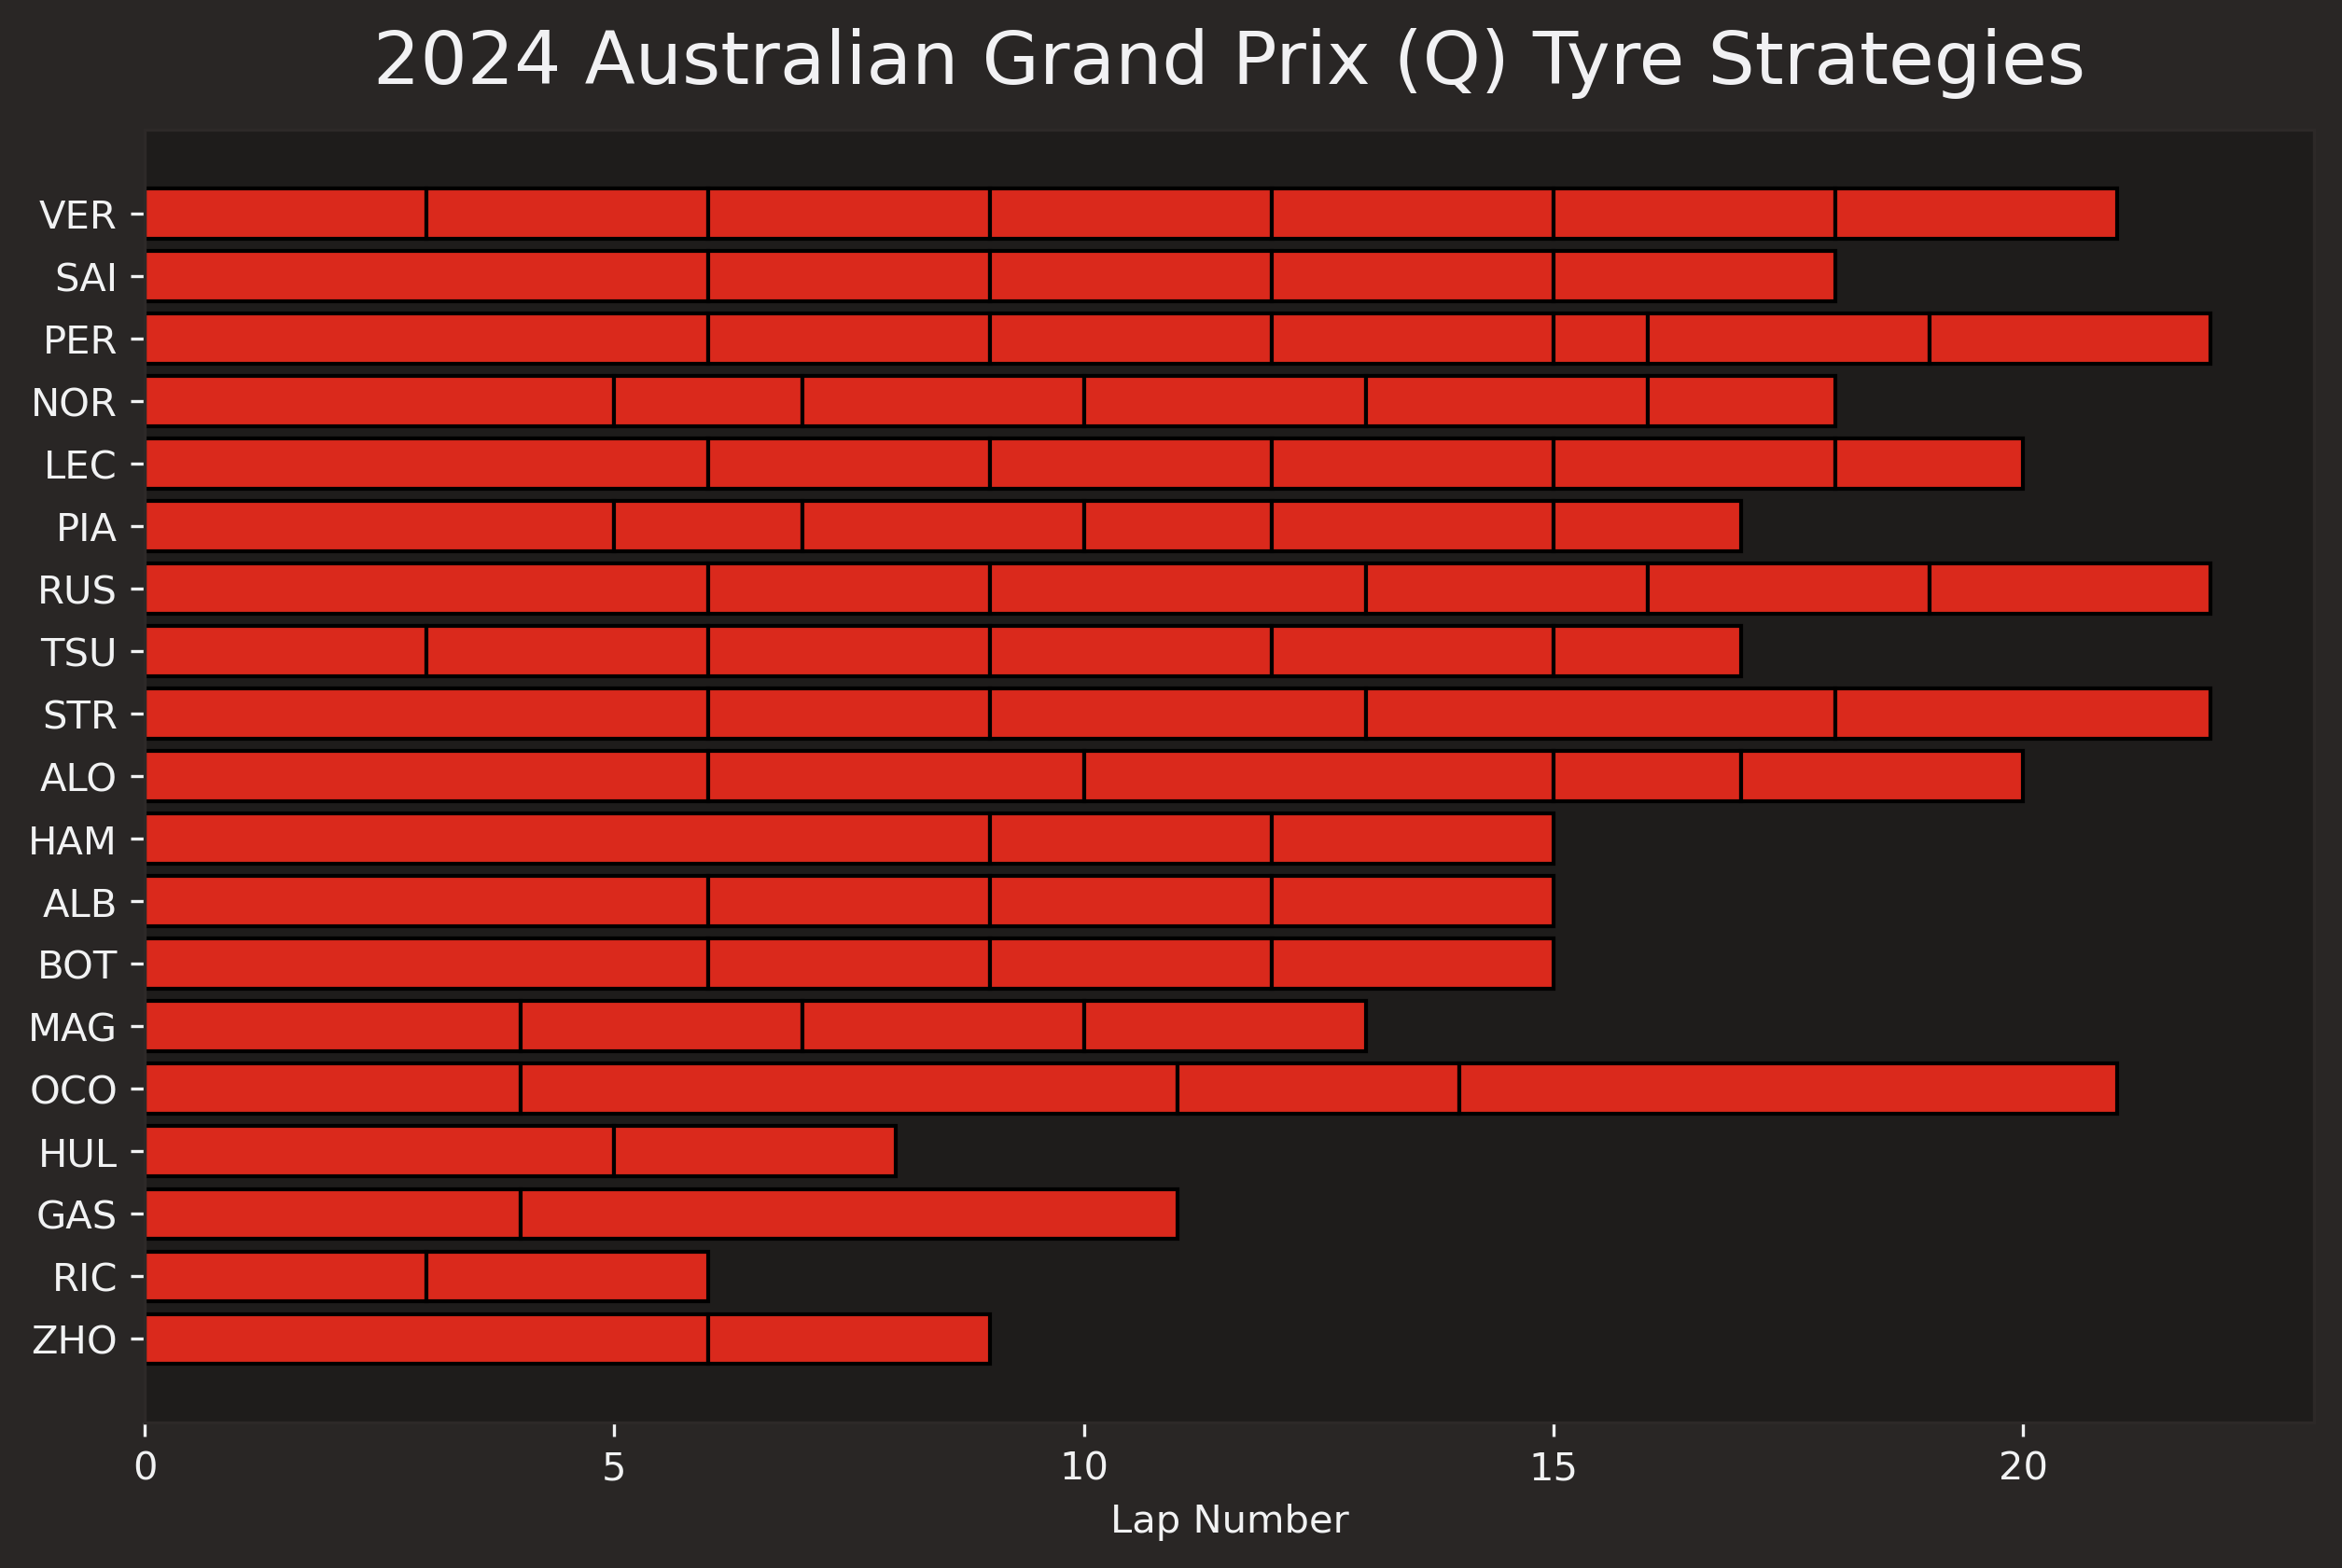

In [12]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

fig1, ax = plt.subplots(figsize=(10, 6),dpi=300)

plt.title(f"{year} {race_data.event['EventName']} ({session}) Tyre Strategies")
plt.xlabel("Lap Number")
plt.grid(False)

# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    # print(driver_stints)

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )


        previous_stint_end += row["StintLength"]

plt.show()

In [13]:
#Podium Driver's Telementry

In [14]:
pod_1 = race_data.laps.pick_driver(podium['Abbreviation'][0]).pick_fastest()
pod_1_tel = pod_1.get_telemetry()
points_1 = np.array([pod_1_tel['X'].values, pod_1_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_1 = np.concatenate([points_1[:-1], points_1[1:]], axis=1)

pod_2 = race_data.laps.pick_driver(podium['Abbreviation'][1]).pick_fastest()
pod_2_tel = pod_2.get_telemetry()
points_2 = np.array([pod_2_tel['X'].values, pod_2_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_2 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)

pod_3 = race_data.laps.pick_driver(podium['Abbreviation'][2]).pick_fastest()
pod_3_tel = pod_3.get_telemetry()
points_3 = np.array([pod_3_tel['X'].values, pod_3_tel['Y'].values]).T.reshape(-1, 1, 2)
segments_3 = np.concatenate([points_2[:-1], points_2[1:]], axis=1)

/var/folders/fy/7wt74p512ng68hpsy587cd4c0000gn/T/ipykernel_1107/2000259789.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pod_1 = race_data.laps.pick_driver(podium['Abbreviation'][0]).pick_fastest()
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
/var/folders/fy/7wt74p512ng68hpsy587cd4c0000gn/T/ipykernel_1107/2000259789.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pod_2 = race_data.laps.

In [15]:
#Driver's Speed

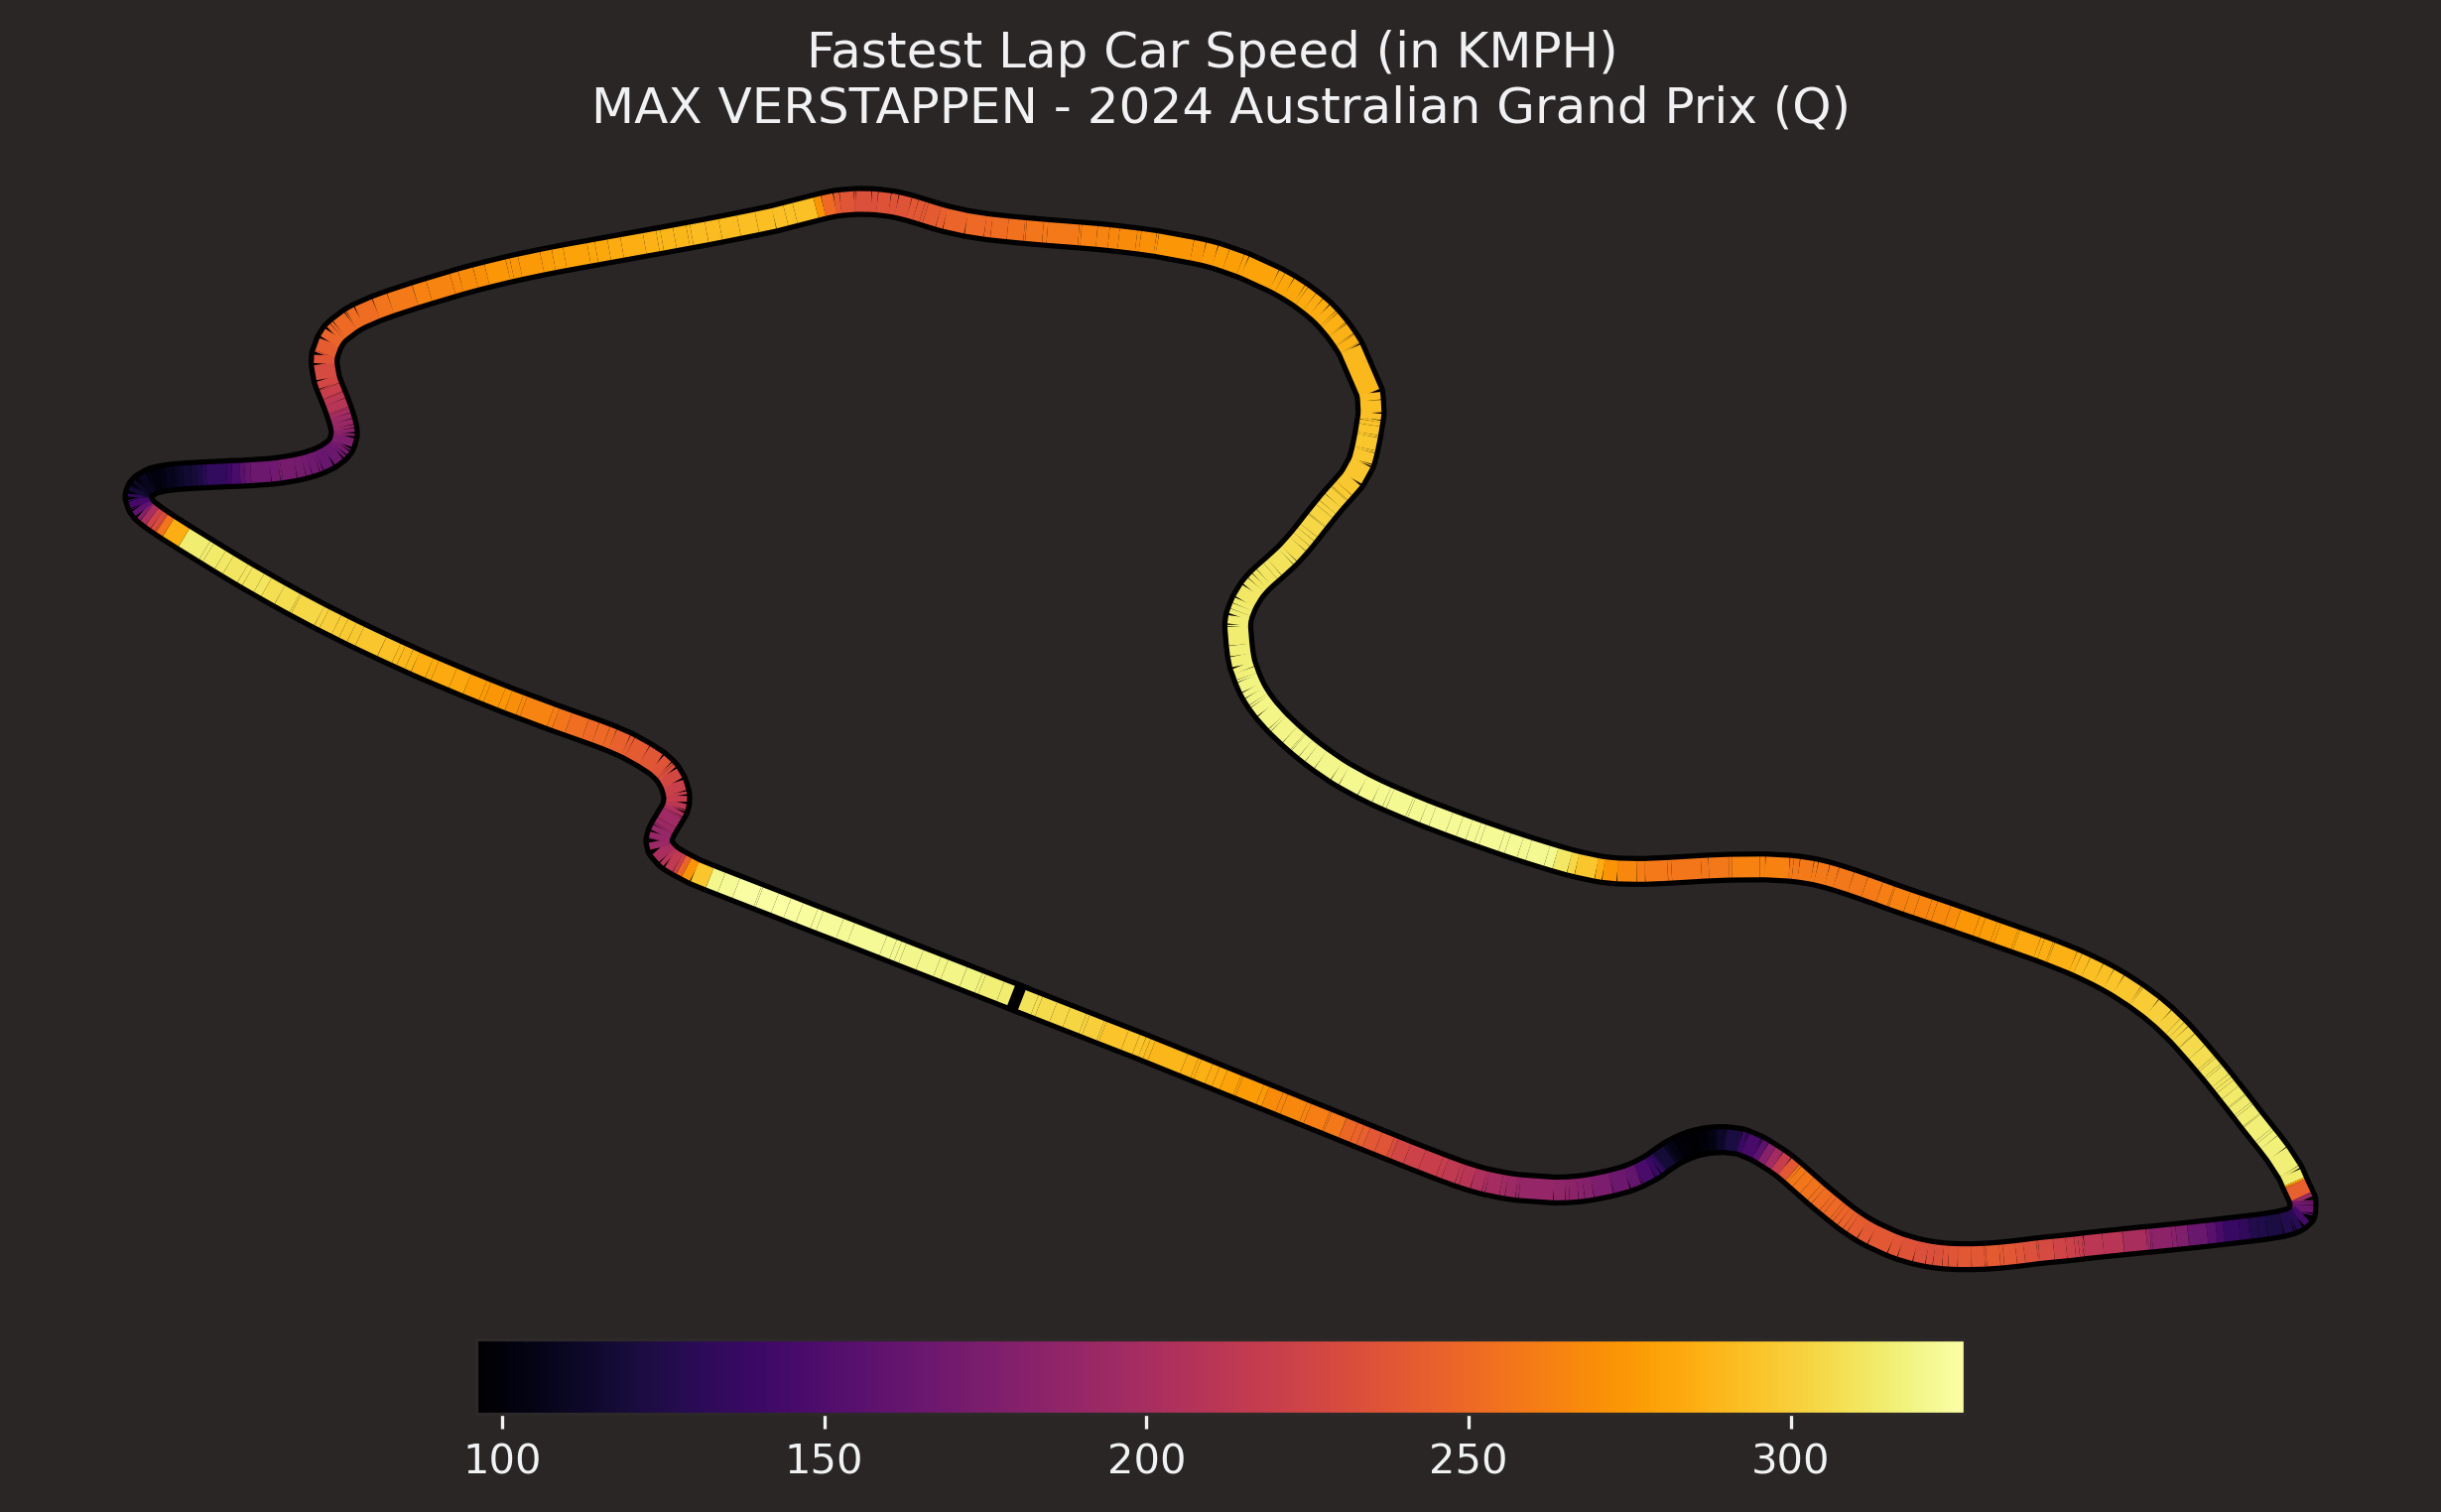

In [16]:
# Podium - 1:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Car Speed (in KMPH) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['Speed'].min(), pod_1_tel['Speed'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Speed'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Speed'].min(), vmax=pod_1_tel['Speed'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

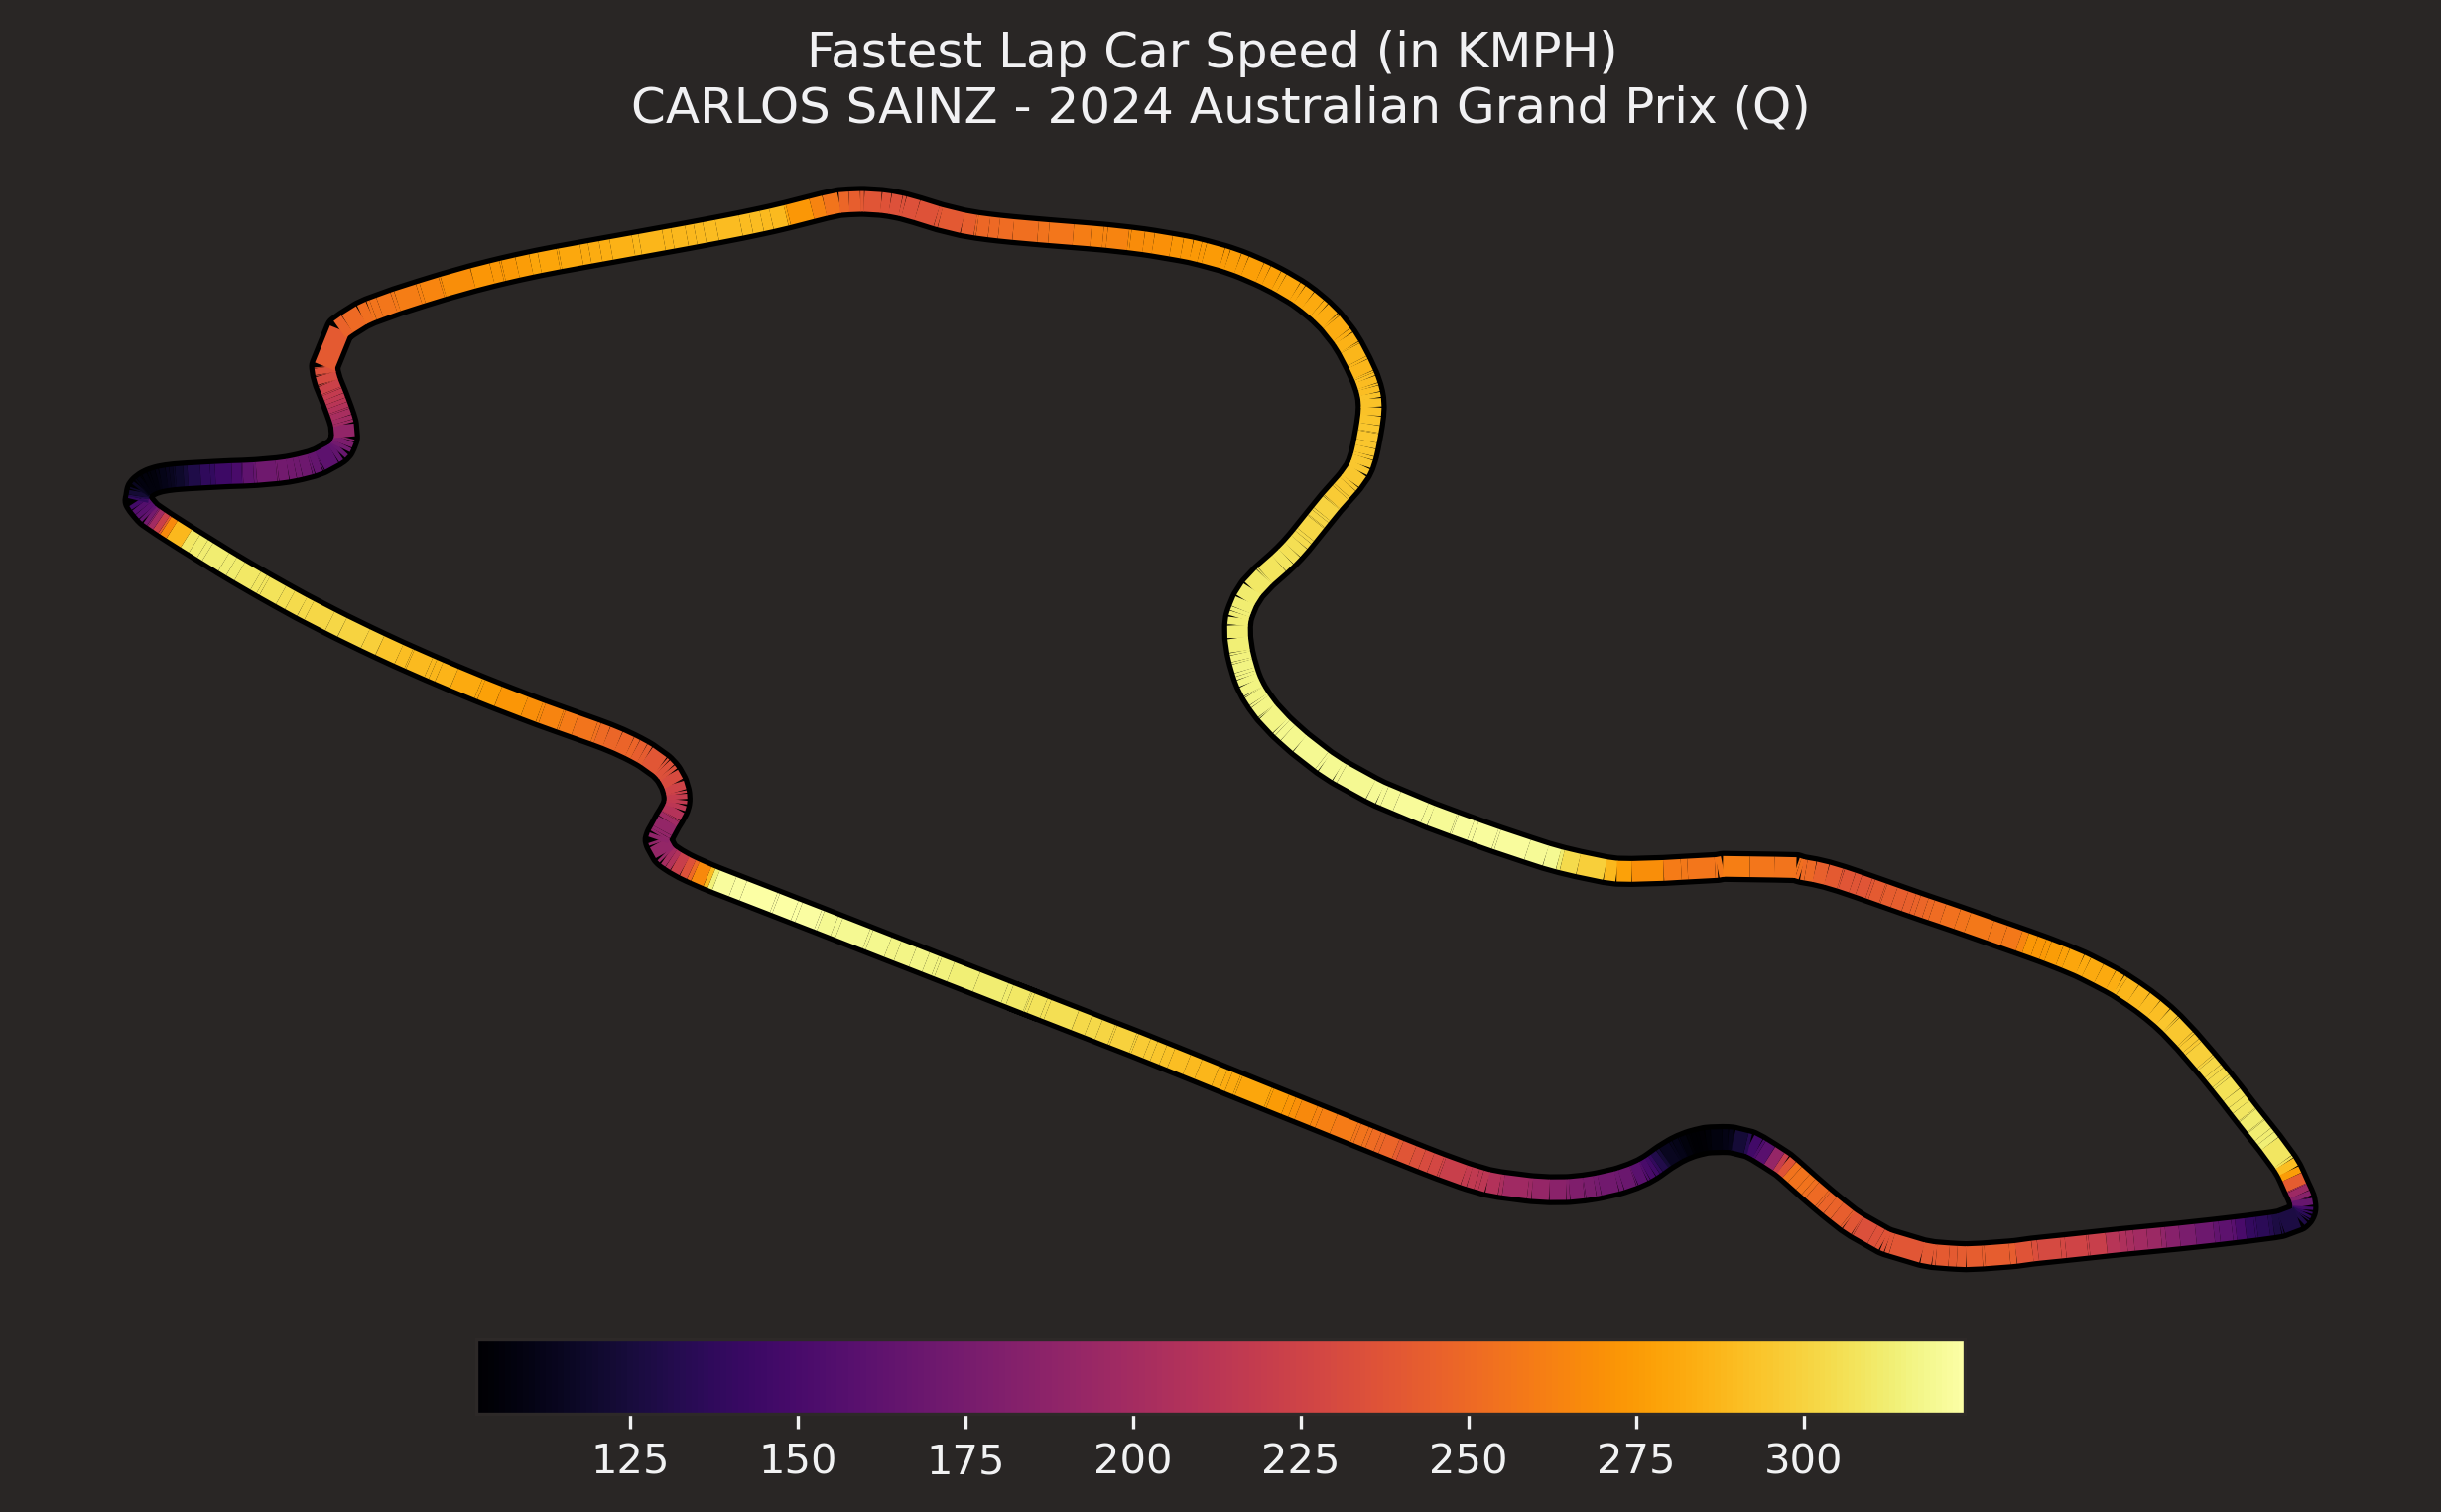

In [17]:
# Podium - 2:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Car Speed (in KMPH) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['Speed'].min(), pod_2_tel['Speed'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['Speed'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['Speed'].min(), vmax=pod_2_tel['Speed'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

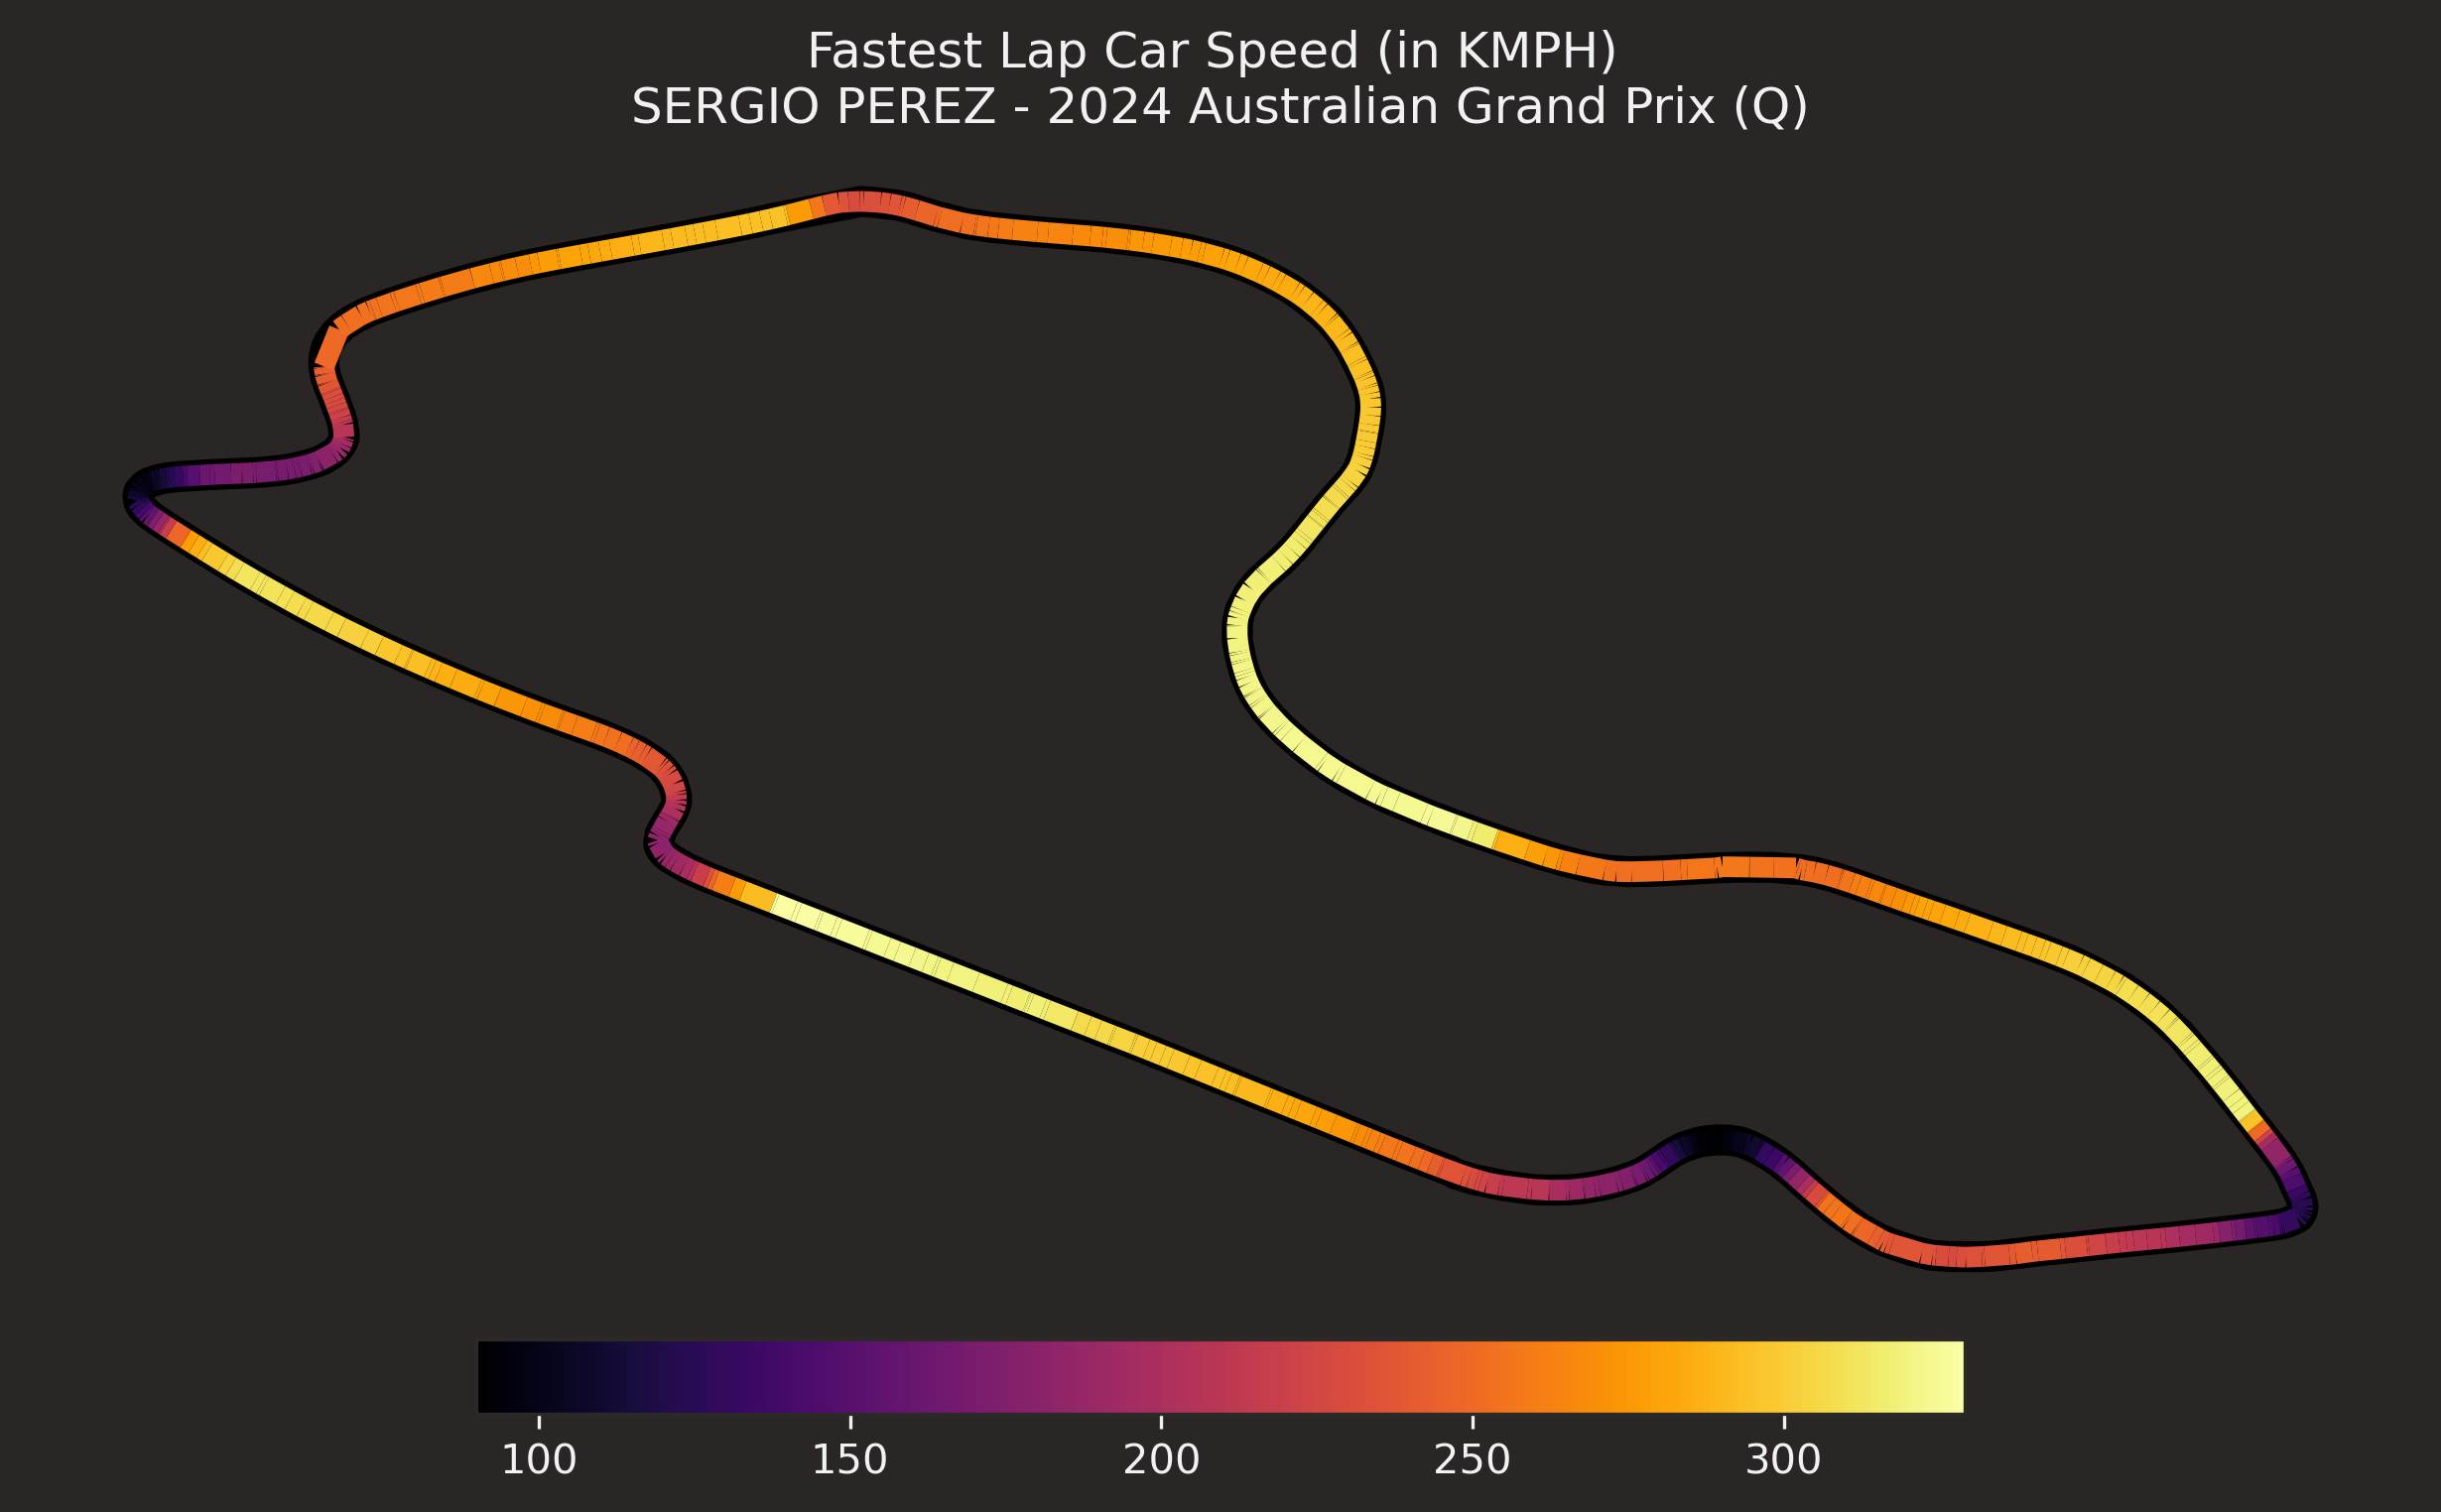

In [18]:
# Podium - 3:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Car Speed (in KMPH) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['Speed'].min(), pod_3_tel['Speed'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['Speed'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['Speed'].min(), vmax=pod_3_tel['Speed'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

In [19]:
#Driver's Gear

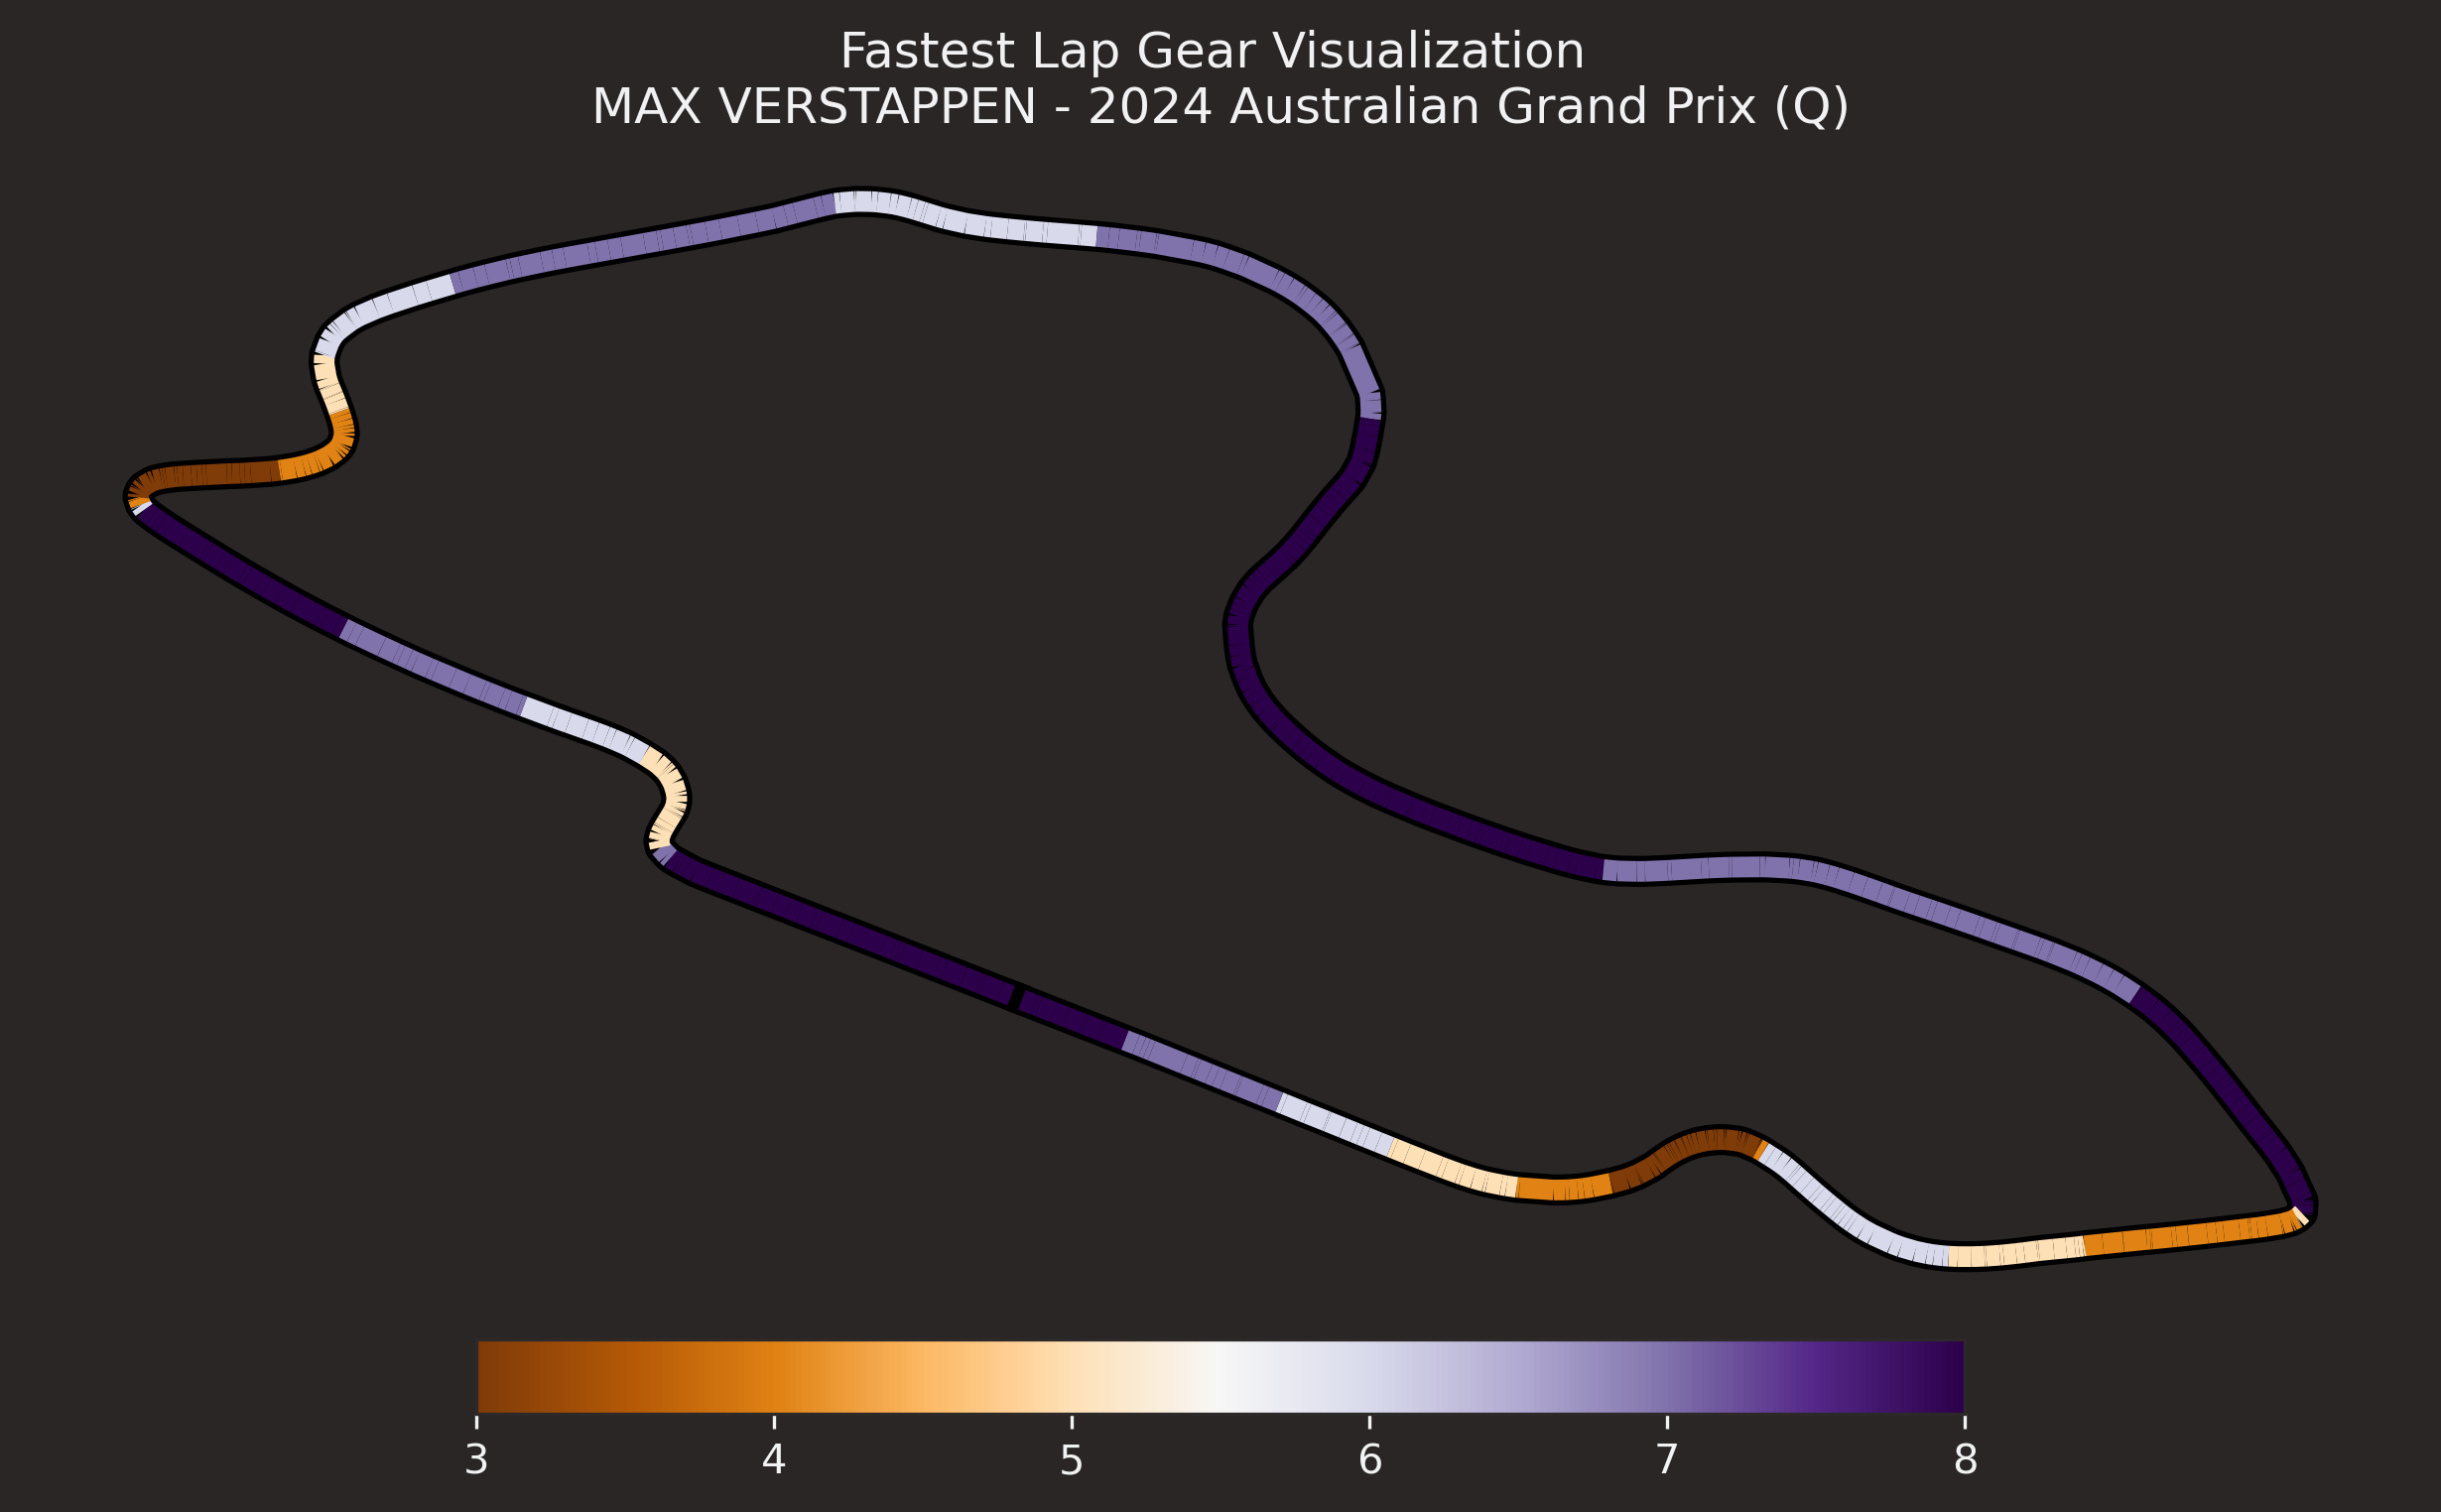

In [20]:
# Podium-1:

cmap = matplotlib.colormaps['PuOr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Gear Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['nGear'].min(), pod_1_tel['nGear'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['nGear'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['nGear'].min(), vmax=pod_1_tel['nGear'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

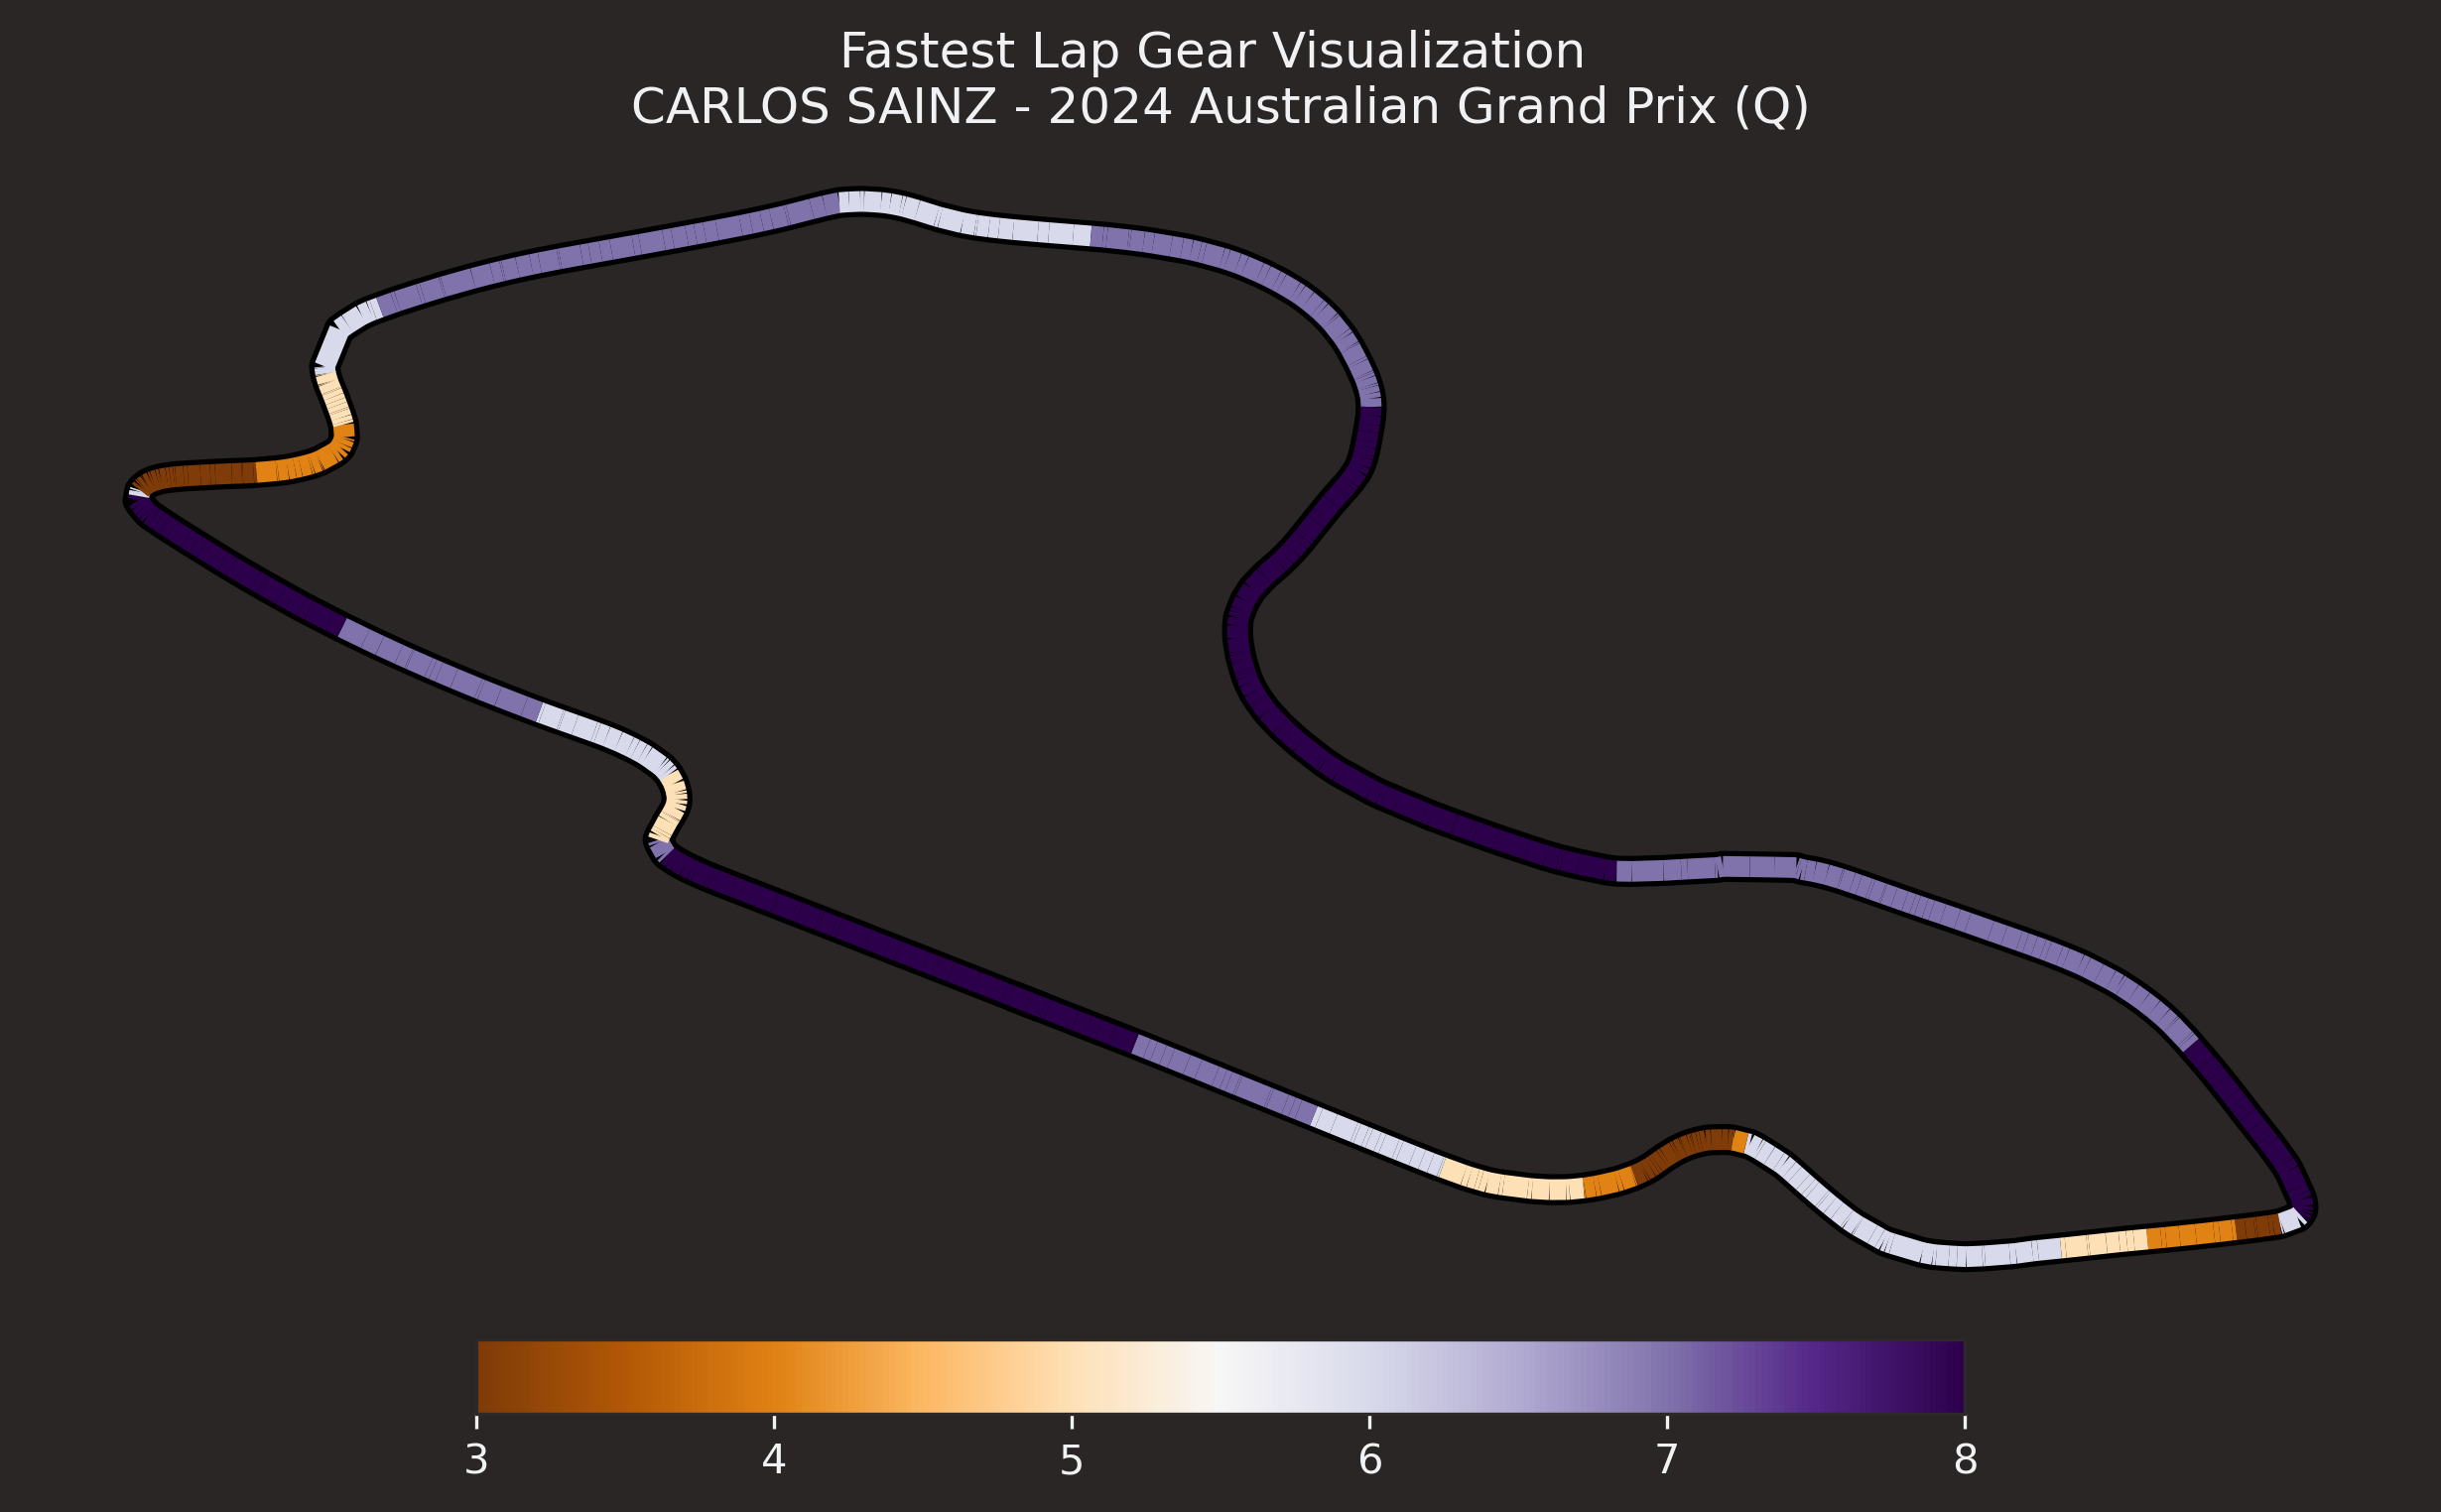

In [21]:
# Podium-2:

cmap = matplotlib.colormaps['PuOr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Gear Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['nGear'].min(), pod_2_tel['nGear'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['nGear'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['nGear'].min(), vmax=pod_2_tel['nGear'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

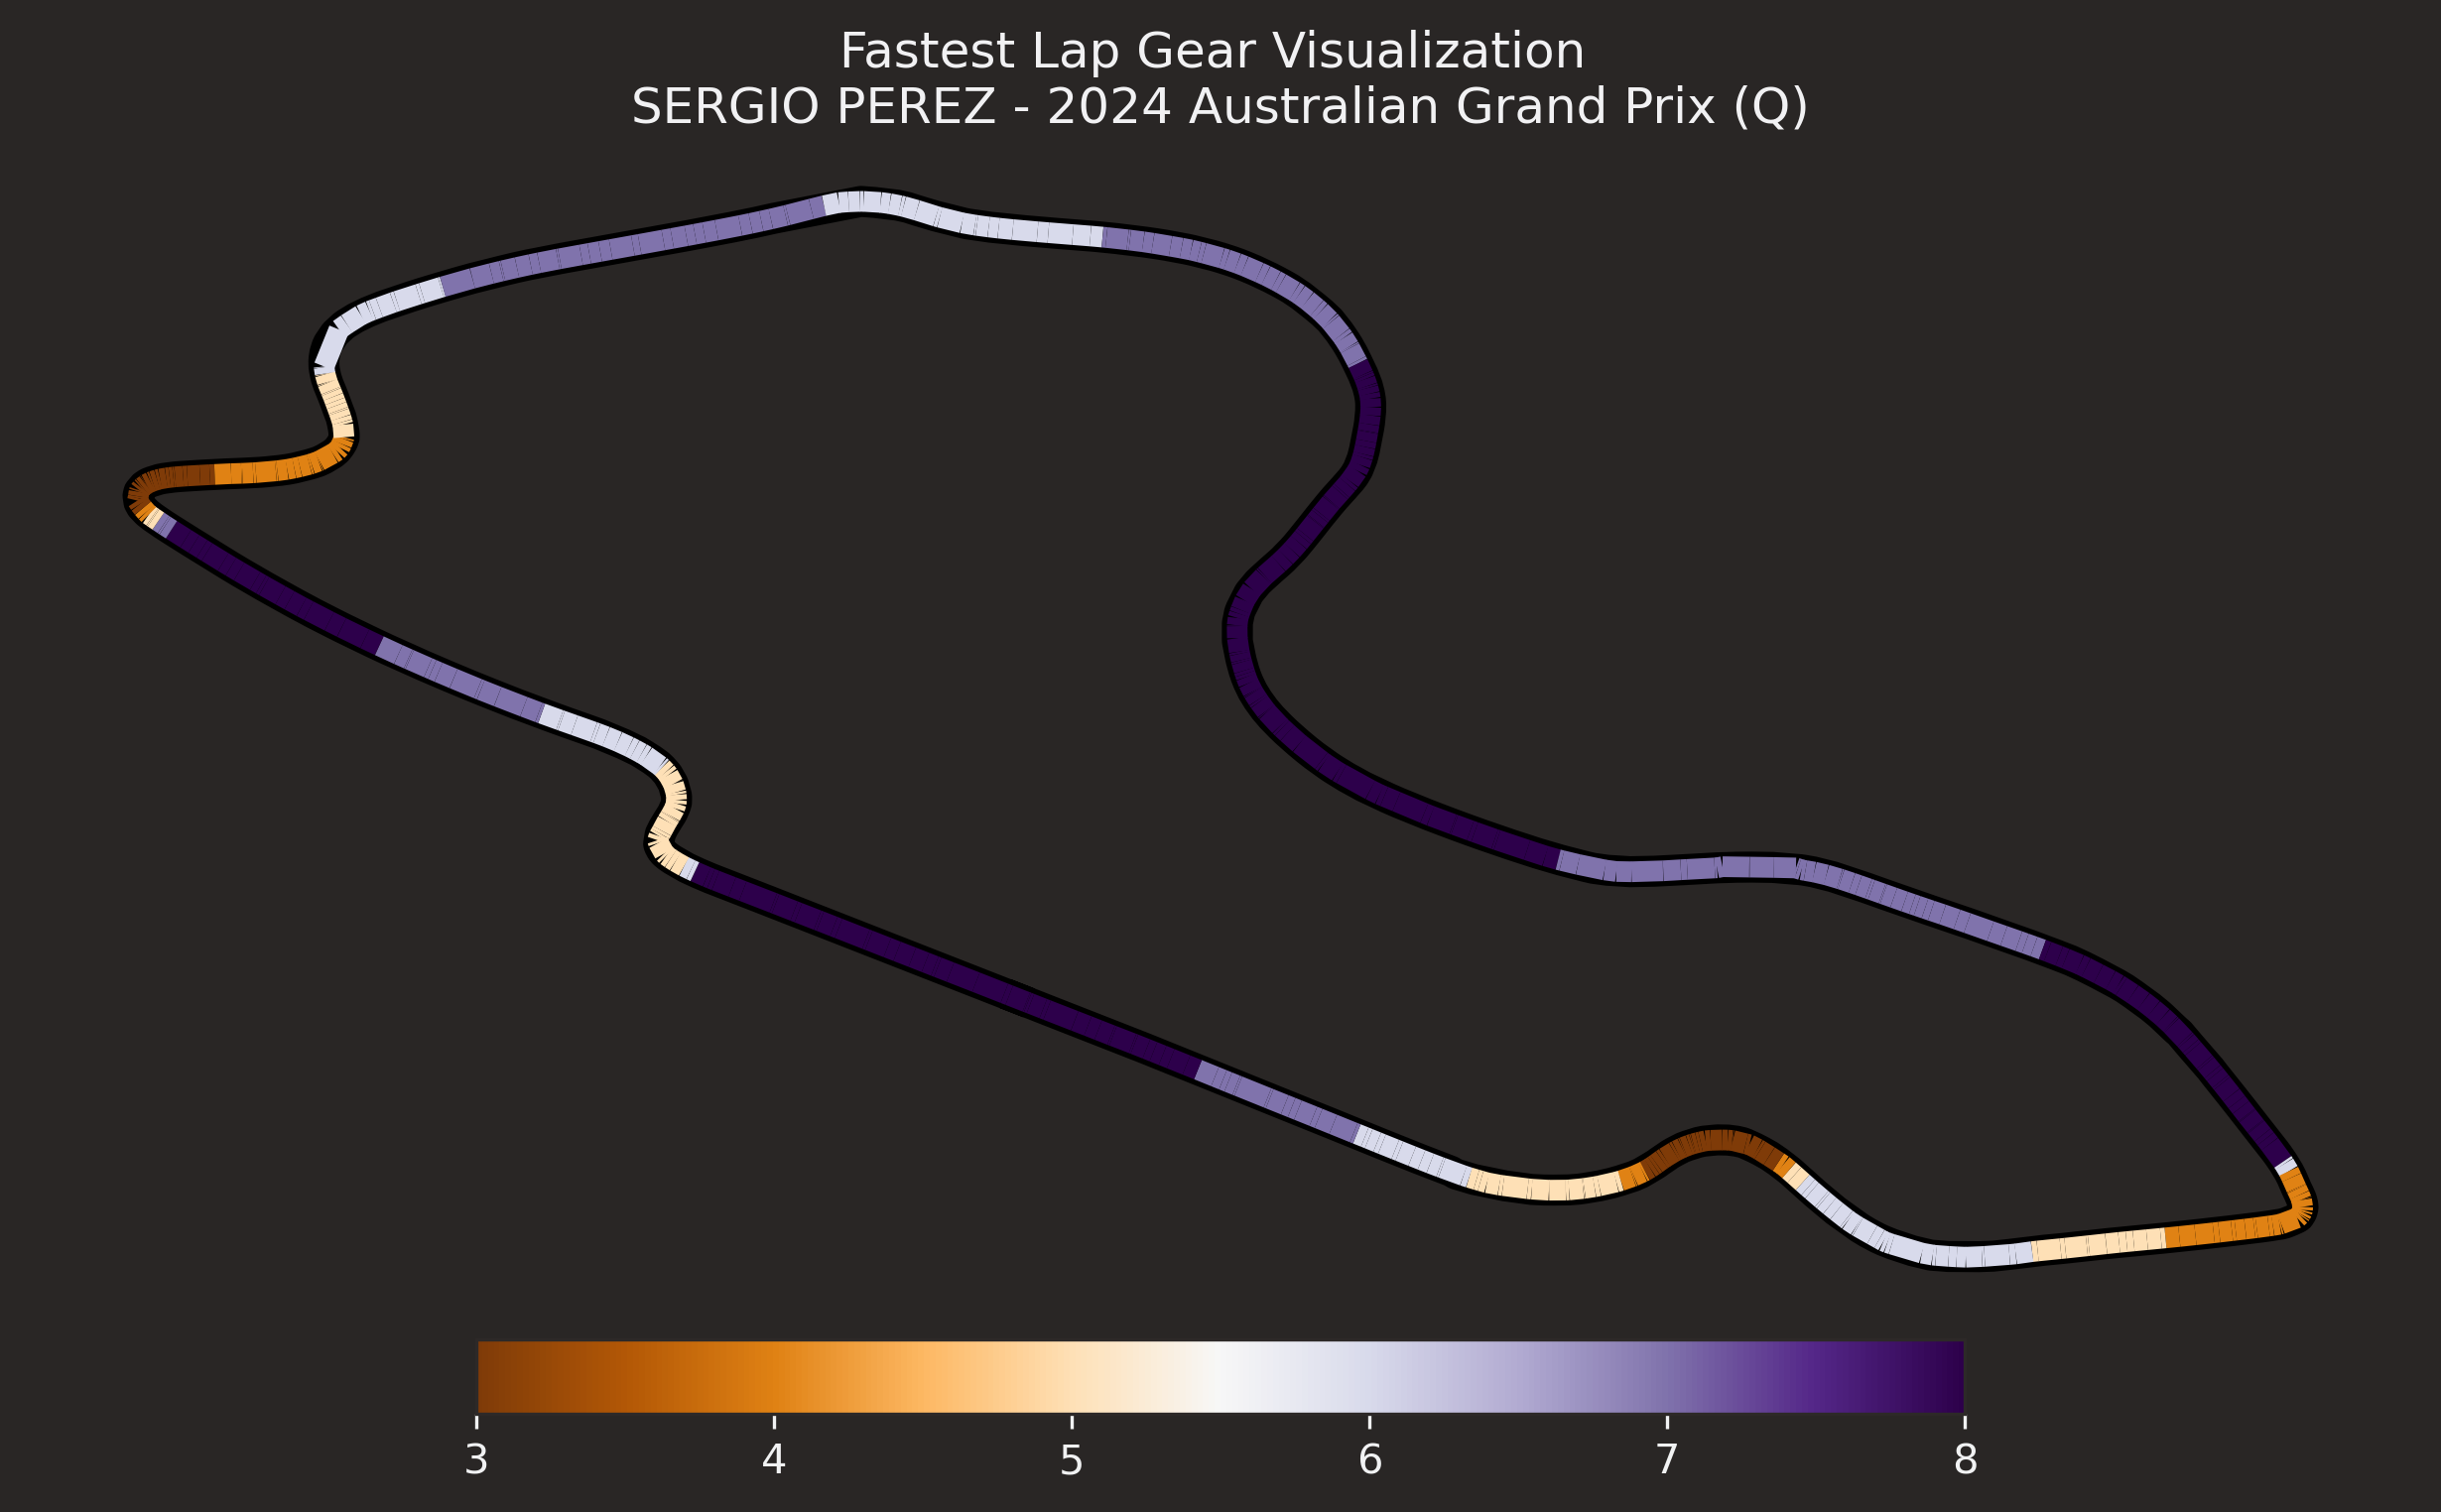

In [22]:
# Podium-3:

cmap = matplotlib.colormaps['PuOr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Gear Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['nGear'].min(), pod_3_tel['nGear'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['nGear'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['nGear'].min(), vmax=pod_2_tel['nGear'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

In [23]:
#Driver's RPM

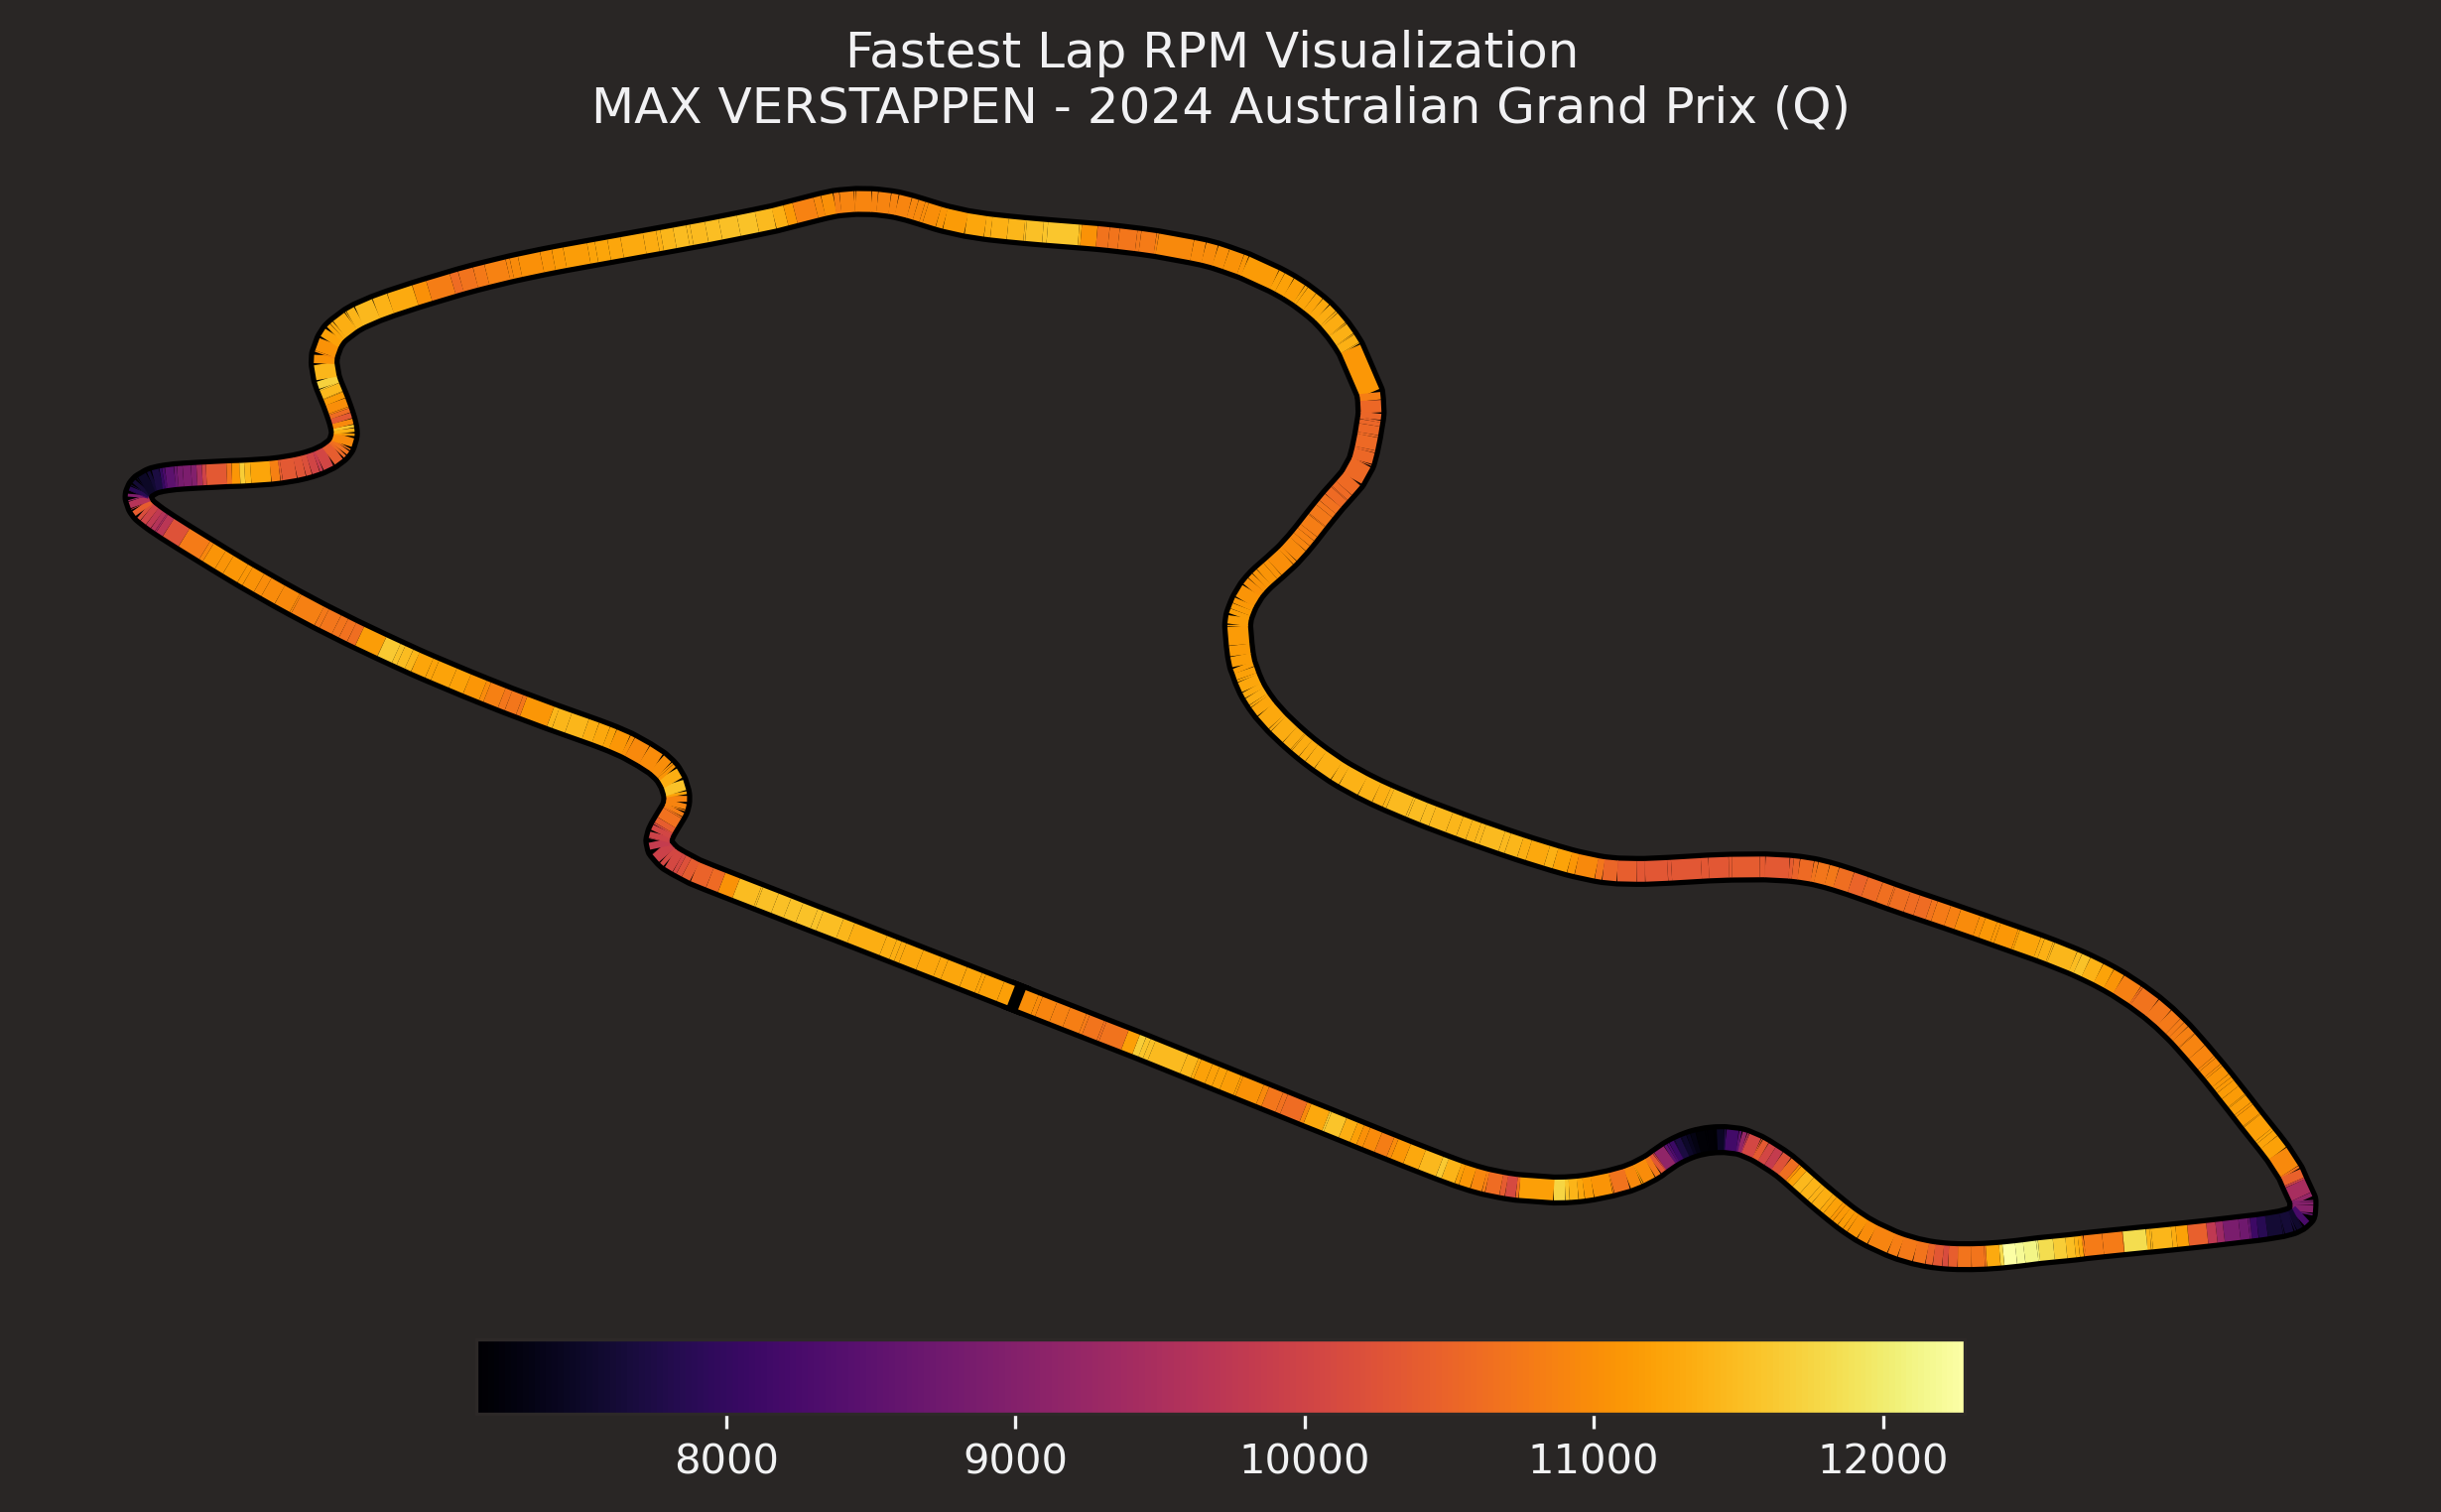

In [24]:
# Podium-1 :

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap RPM Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['RPM'].min(), pod_1_tel['RPM'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['RPM'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['RPM'].min(), vmax=pod_1_tel['RPM'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

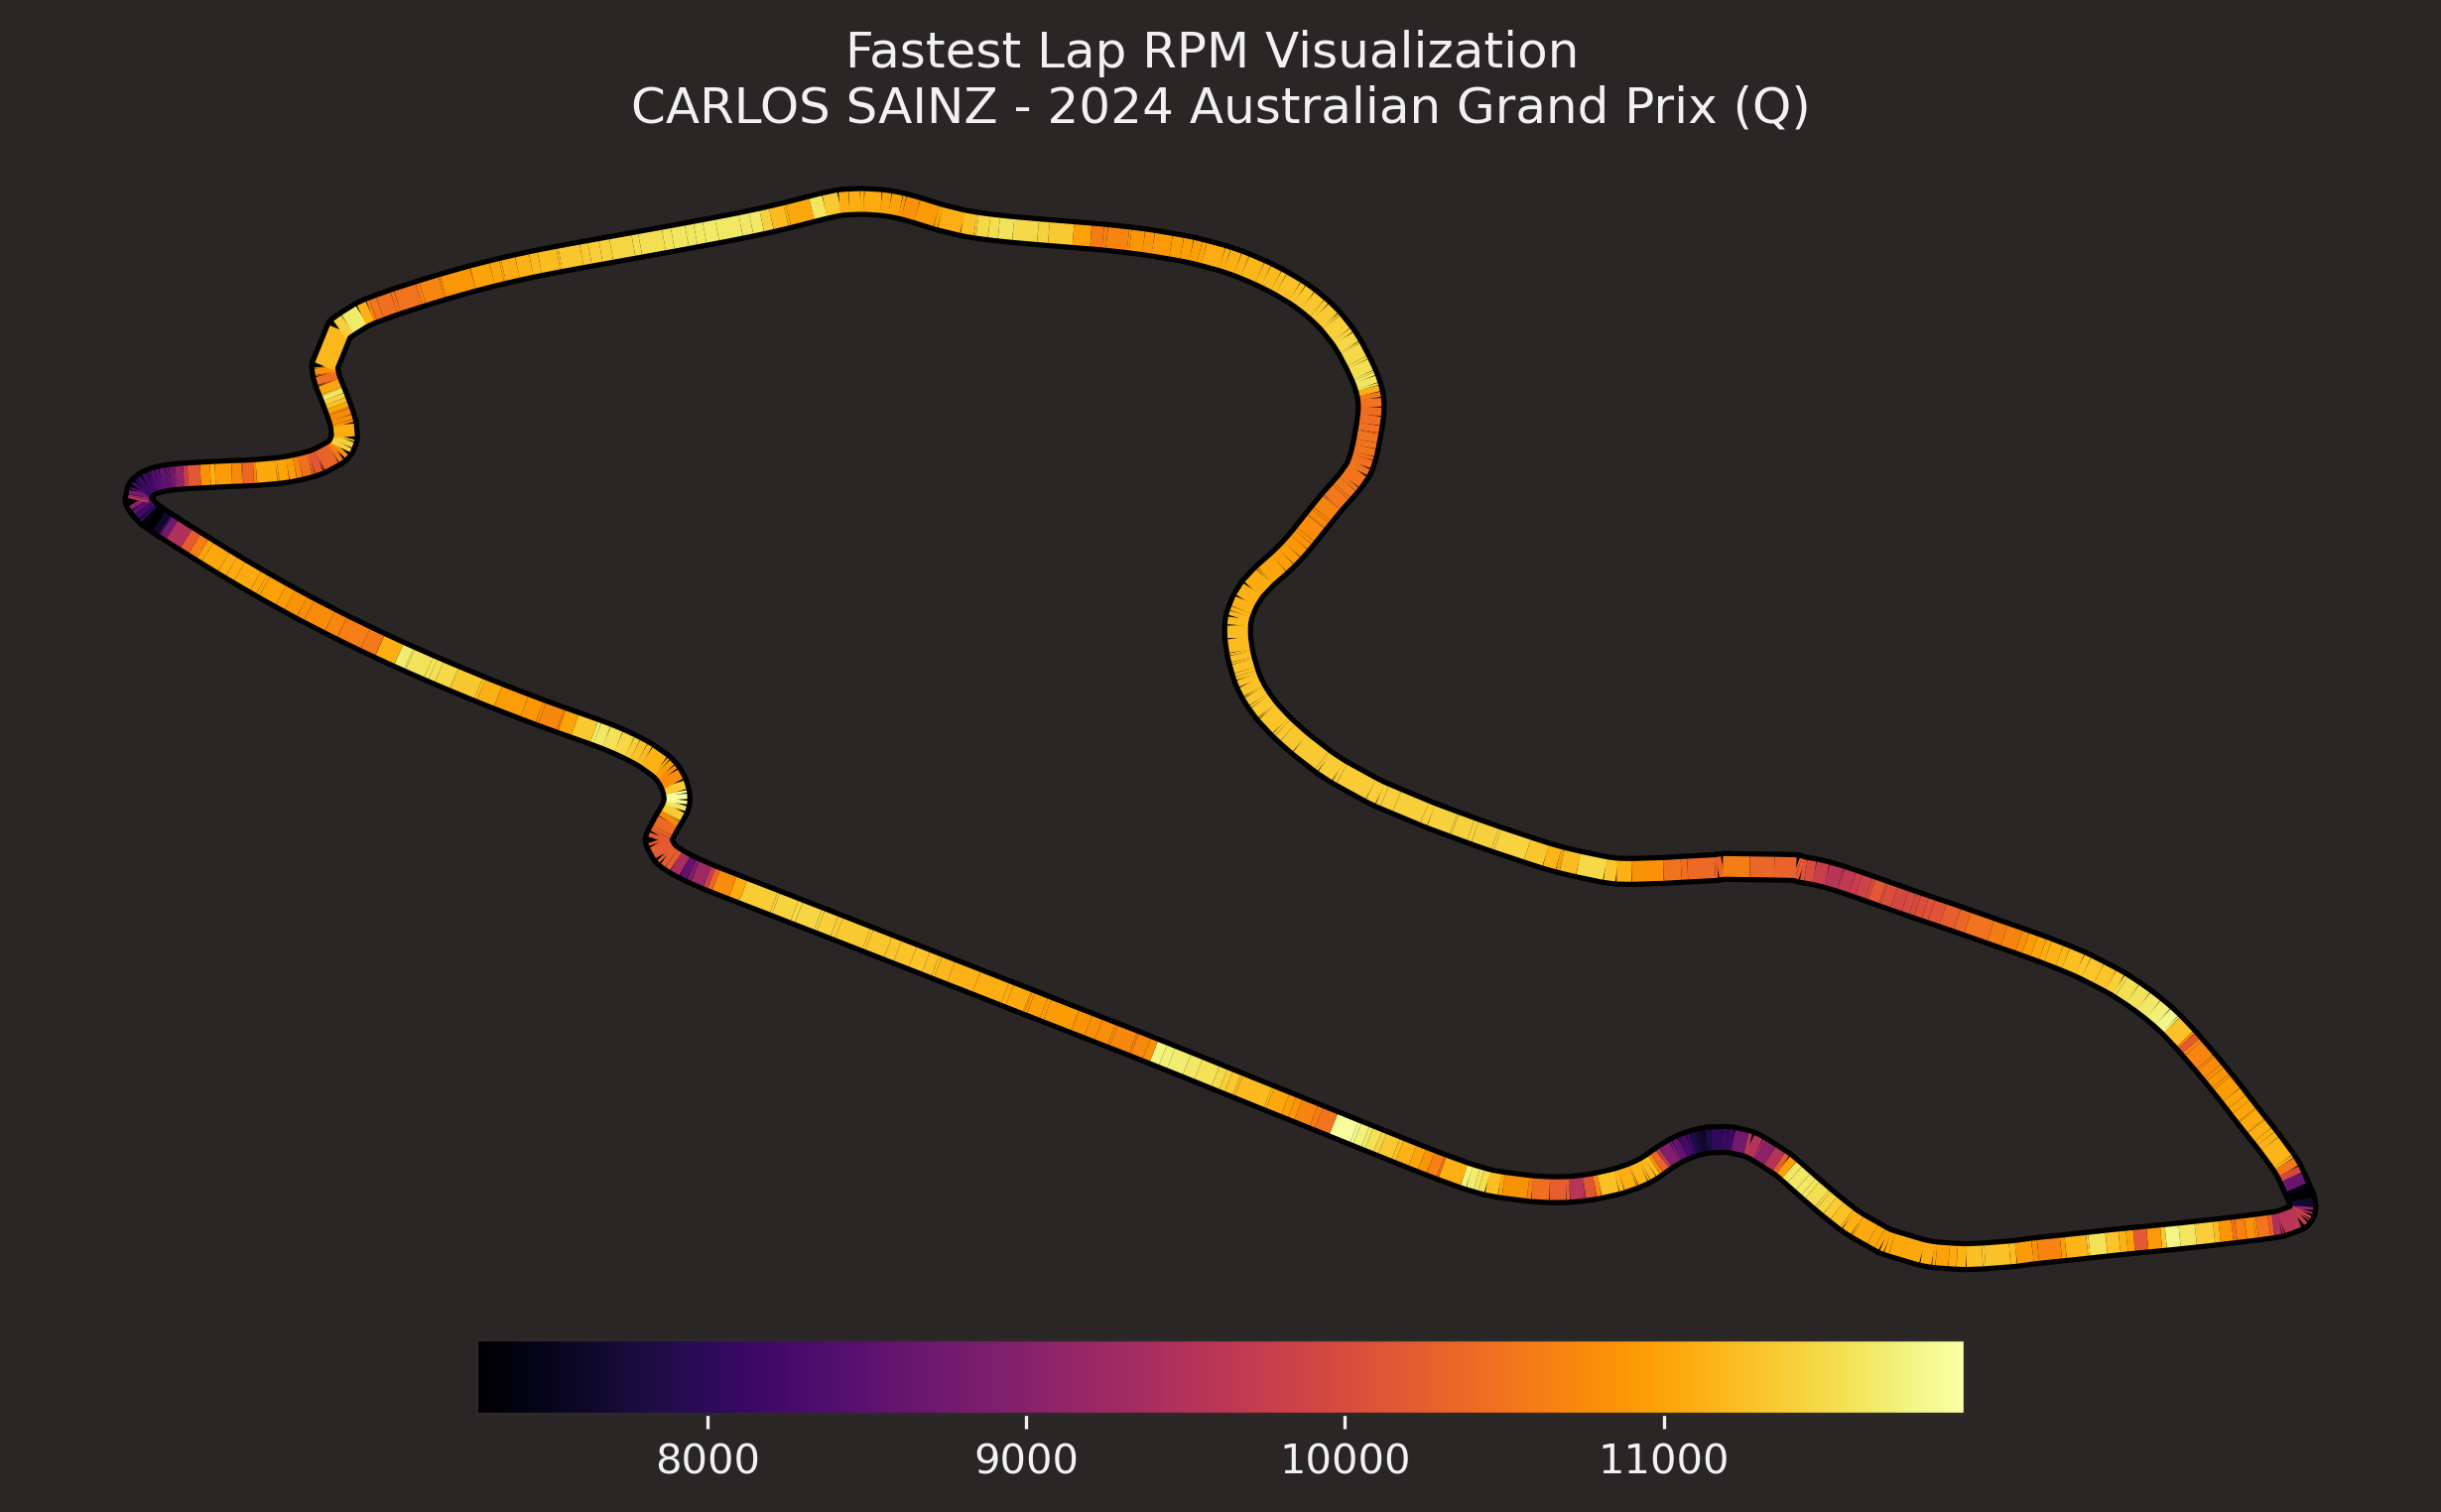

In [25]:
# Podium - 2:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap RPM Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['RPM'].min(), pod_2_tel['RPM'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['RPM'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['RPM'].min(), vmax=pod_2_tel['RPM'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

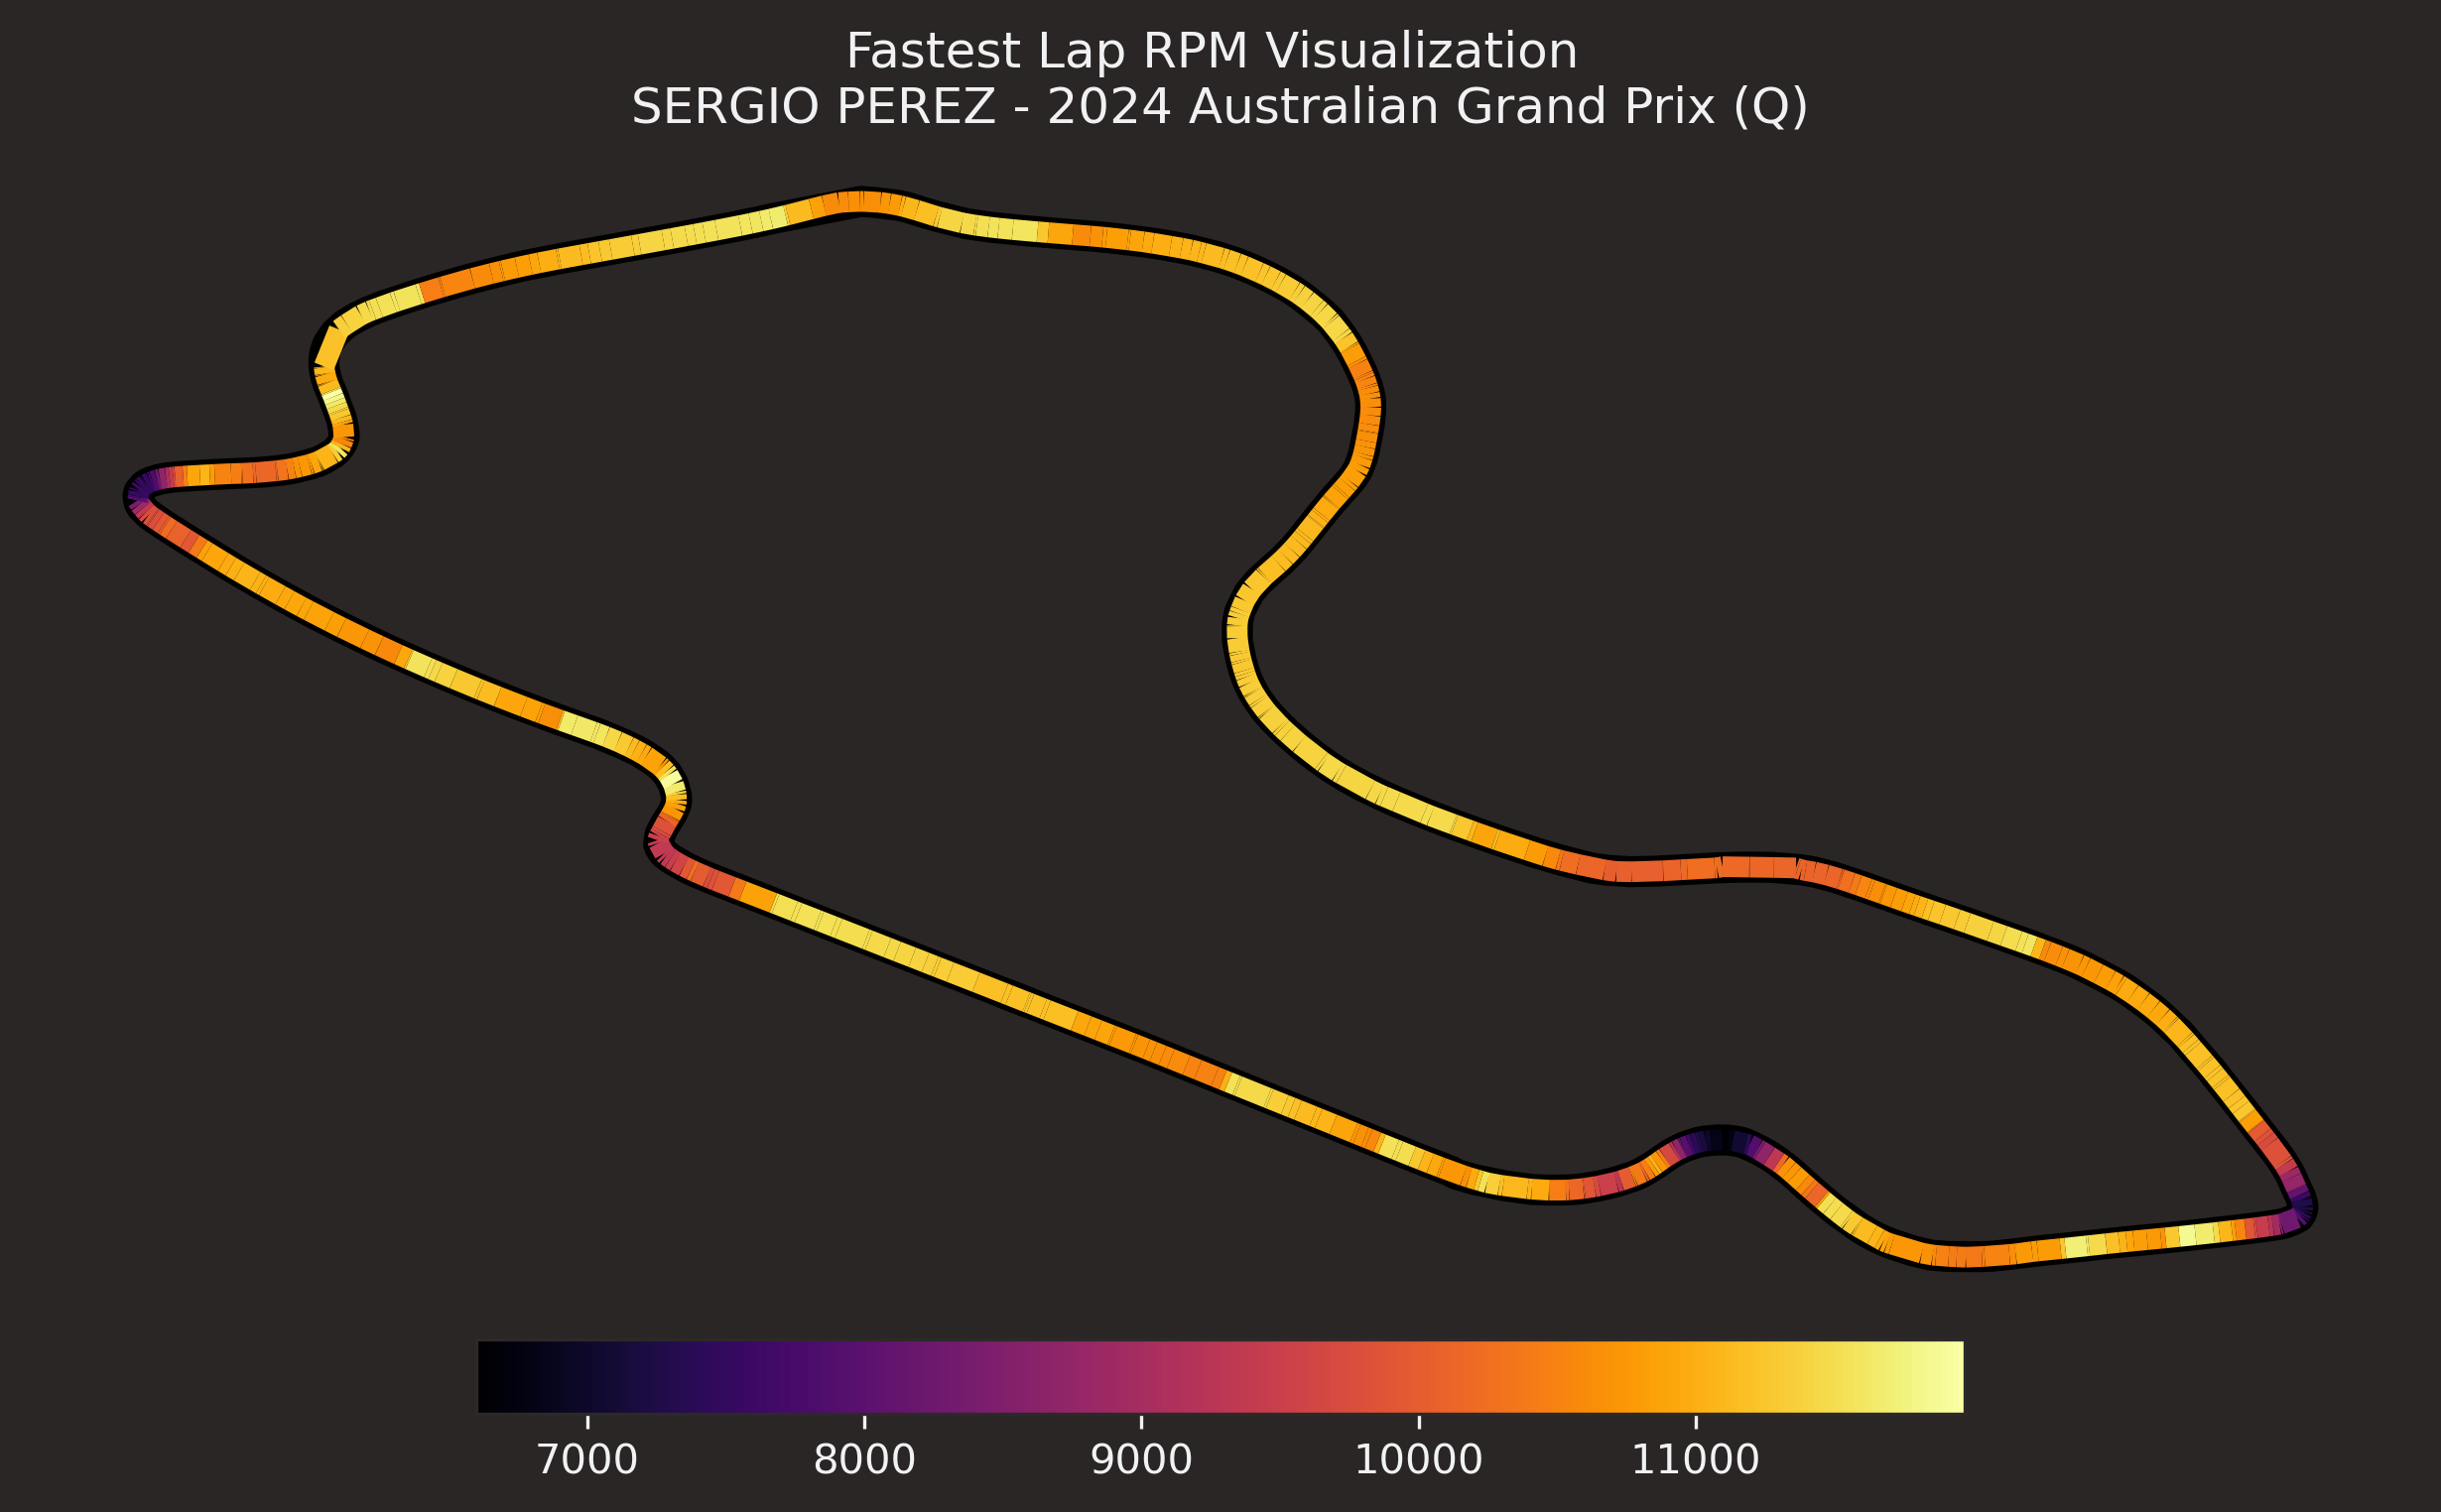

In [26]:
# Podium - 3:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap RPM Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['RPM'].min(), pod_3_tel['RPM'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['RPM'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['RPM'].min(), vmax=pod_3_tel['RPM'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

In [27]:
#Driver's Throttle

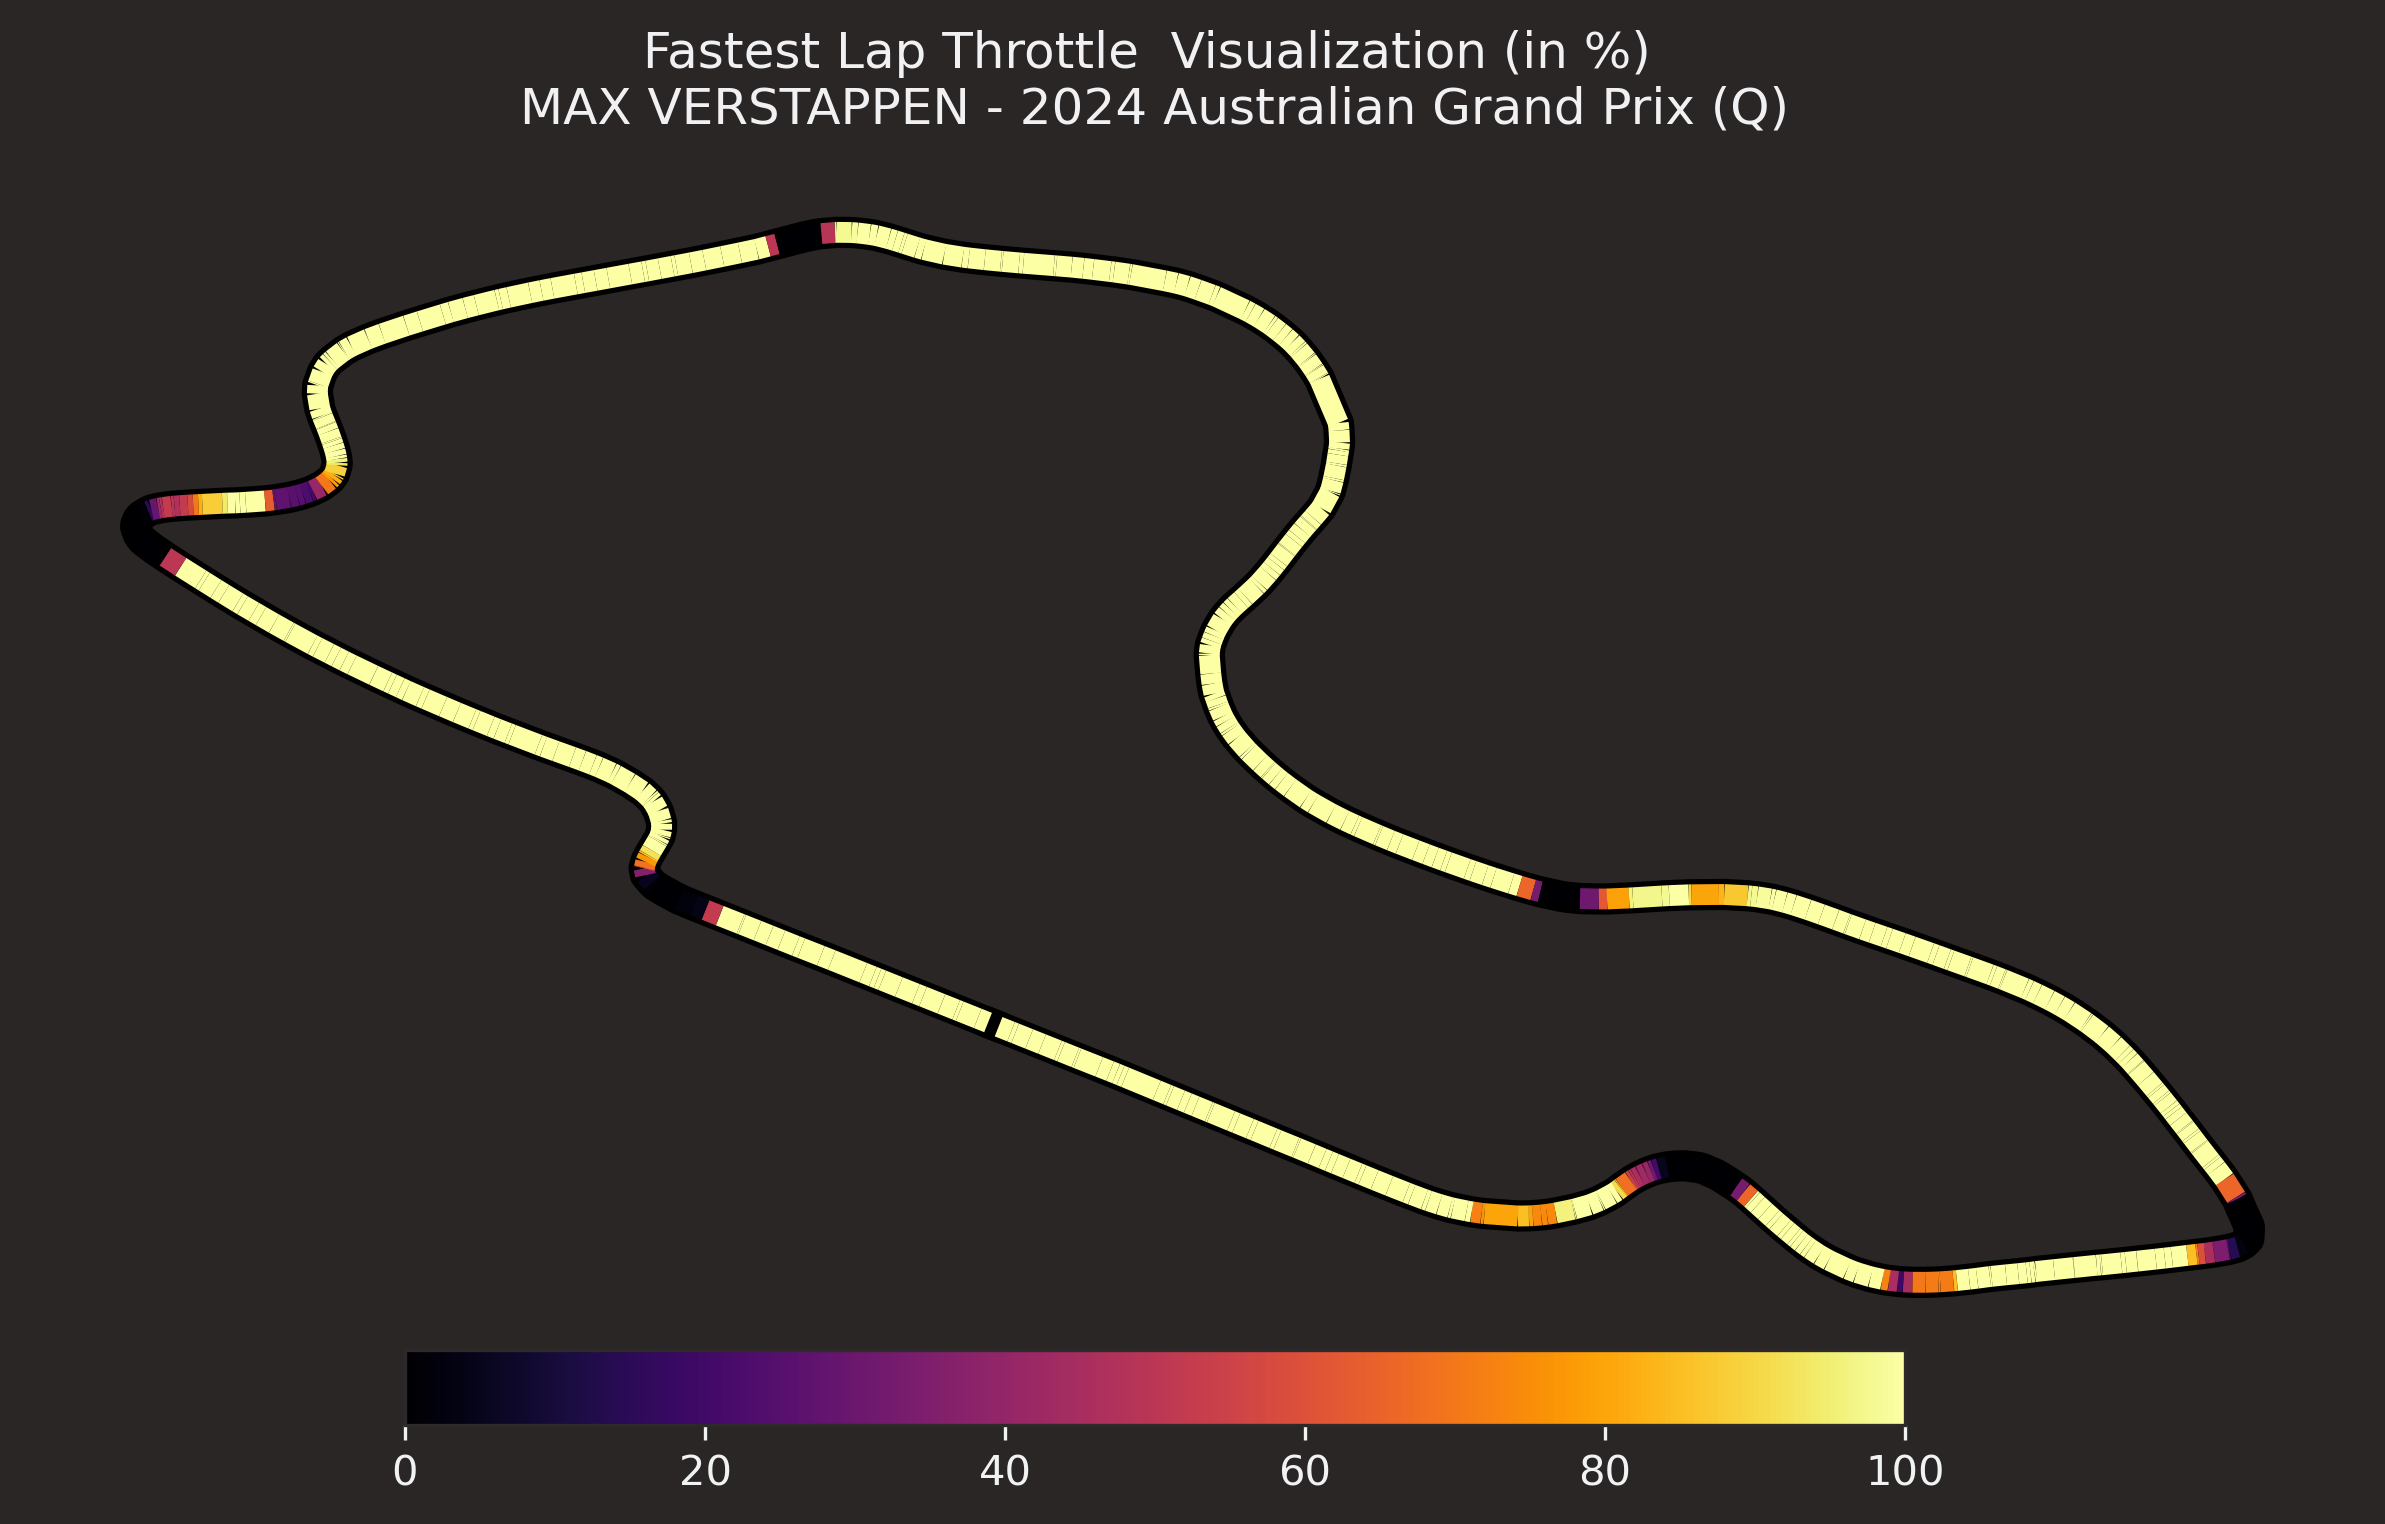

In [28]:
# Podium - 1:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Throttle  Visualization (in %) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['Throttle'].min(), pod_1_tel['Throttle'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Throttle'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Throttle'].min(), vmax=pod_1_tel['Throttle'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

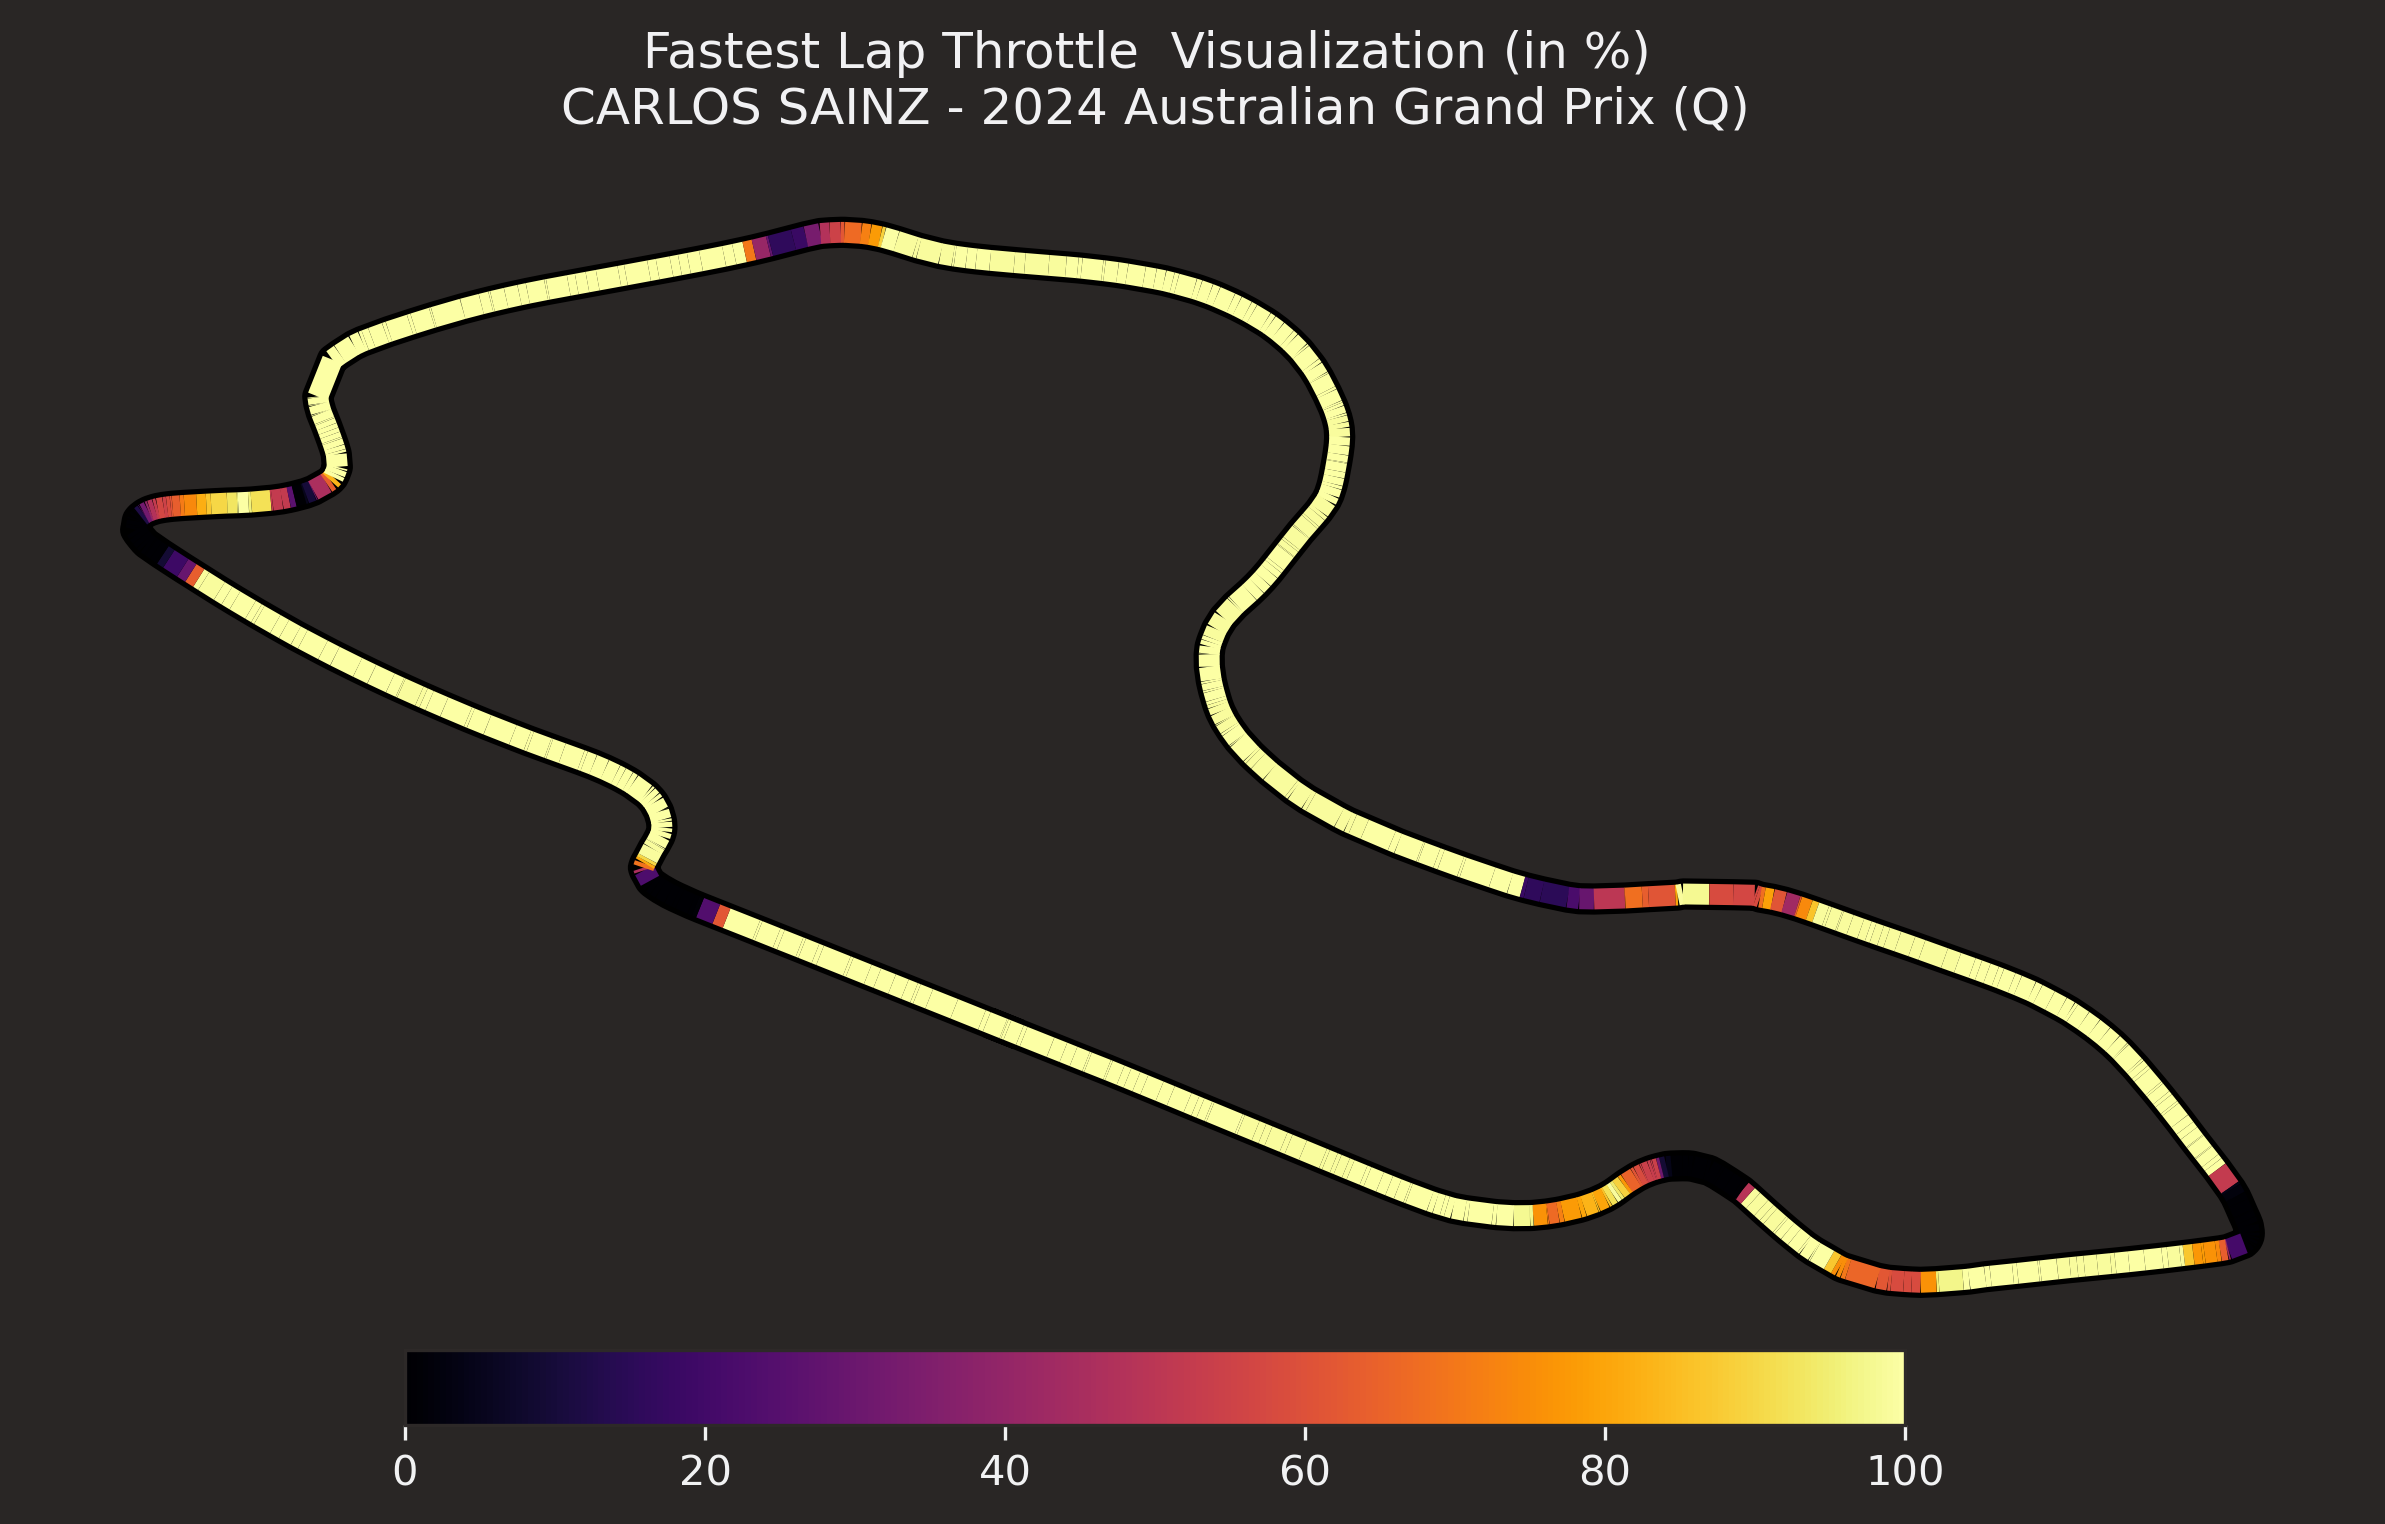

In [29]:
# Podium - 2:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Throttle  Visualization (in %) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['Throttle'].min(), pod_2_tel['Throttle'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['Throttle'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['Throttle'].min(), vmax=pod_2_tel['Throttle'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

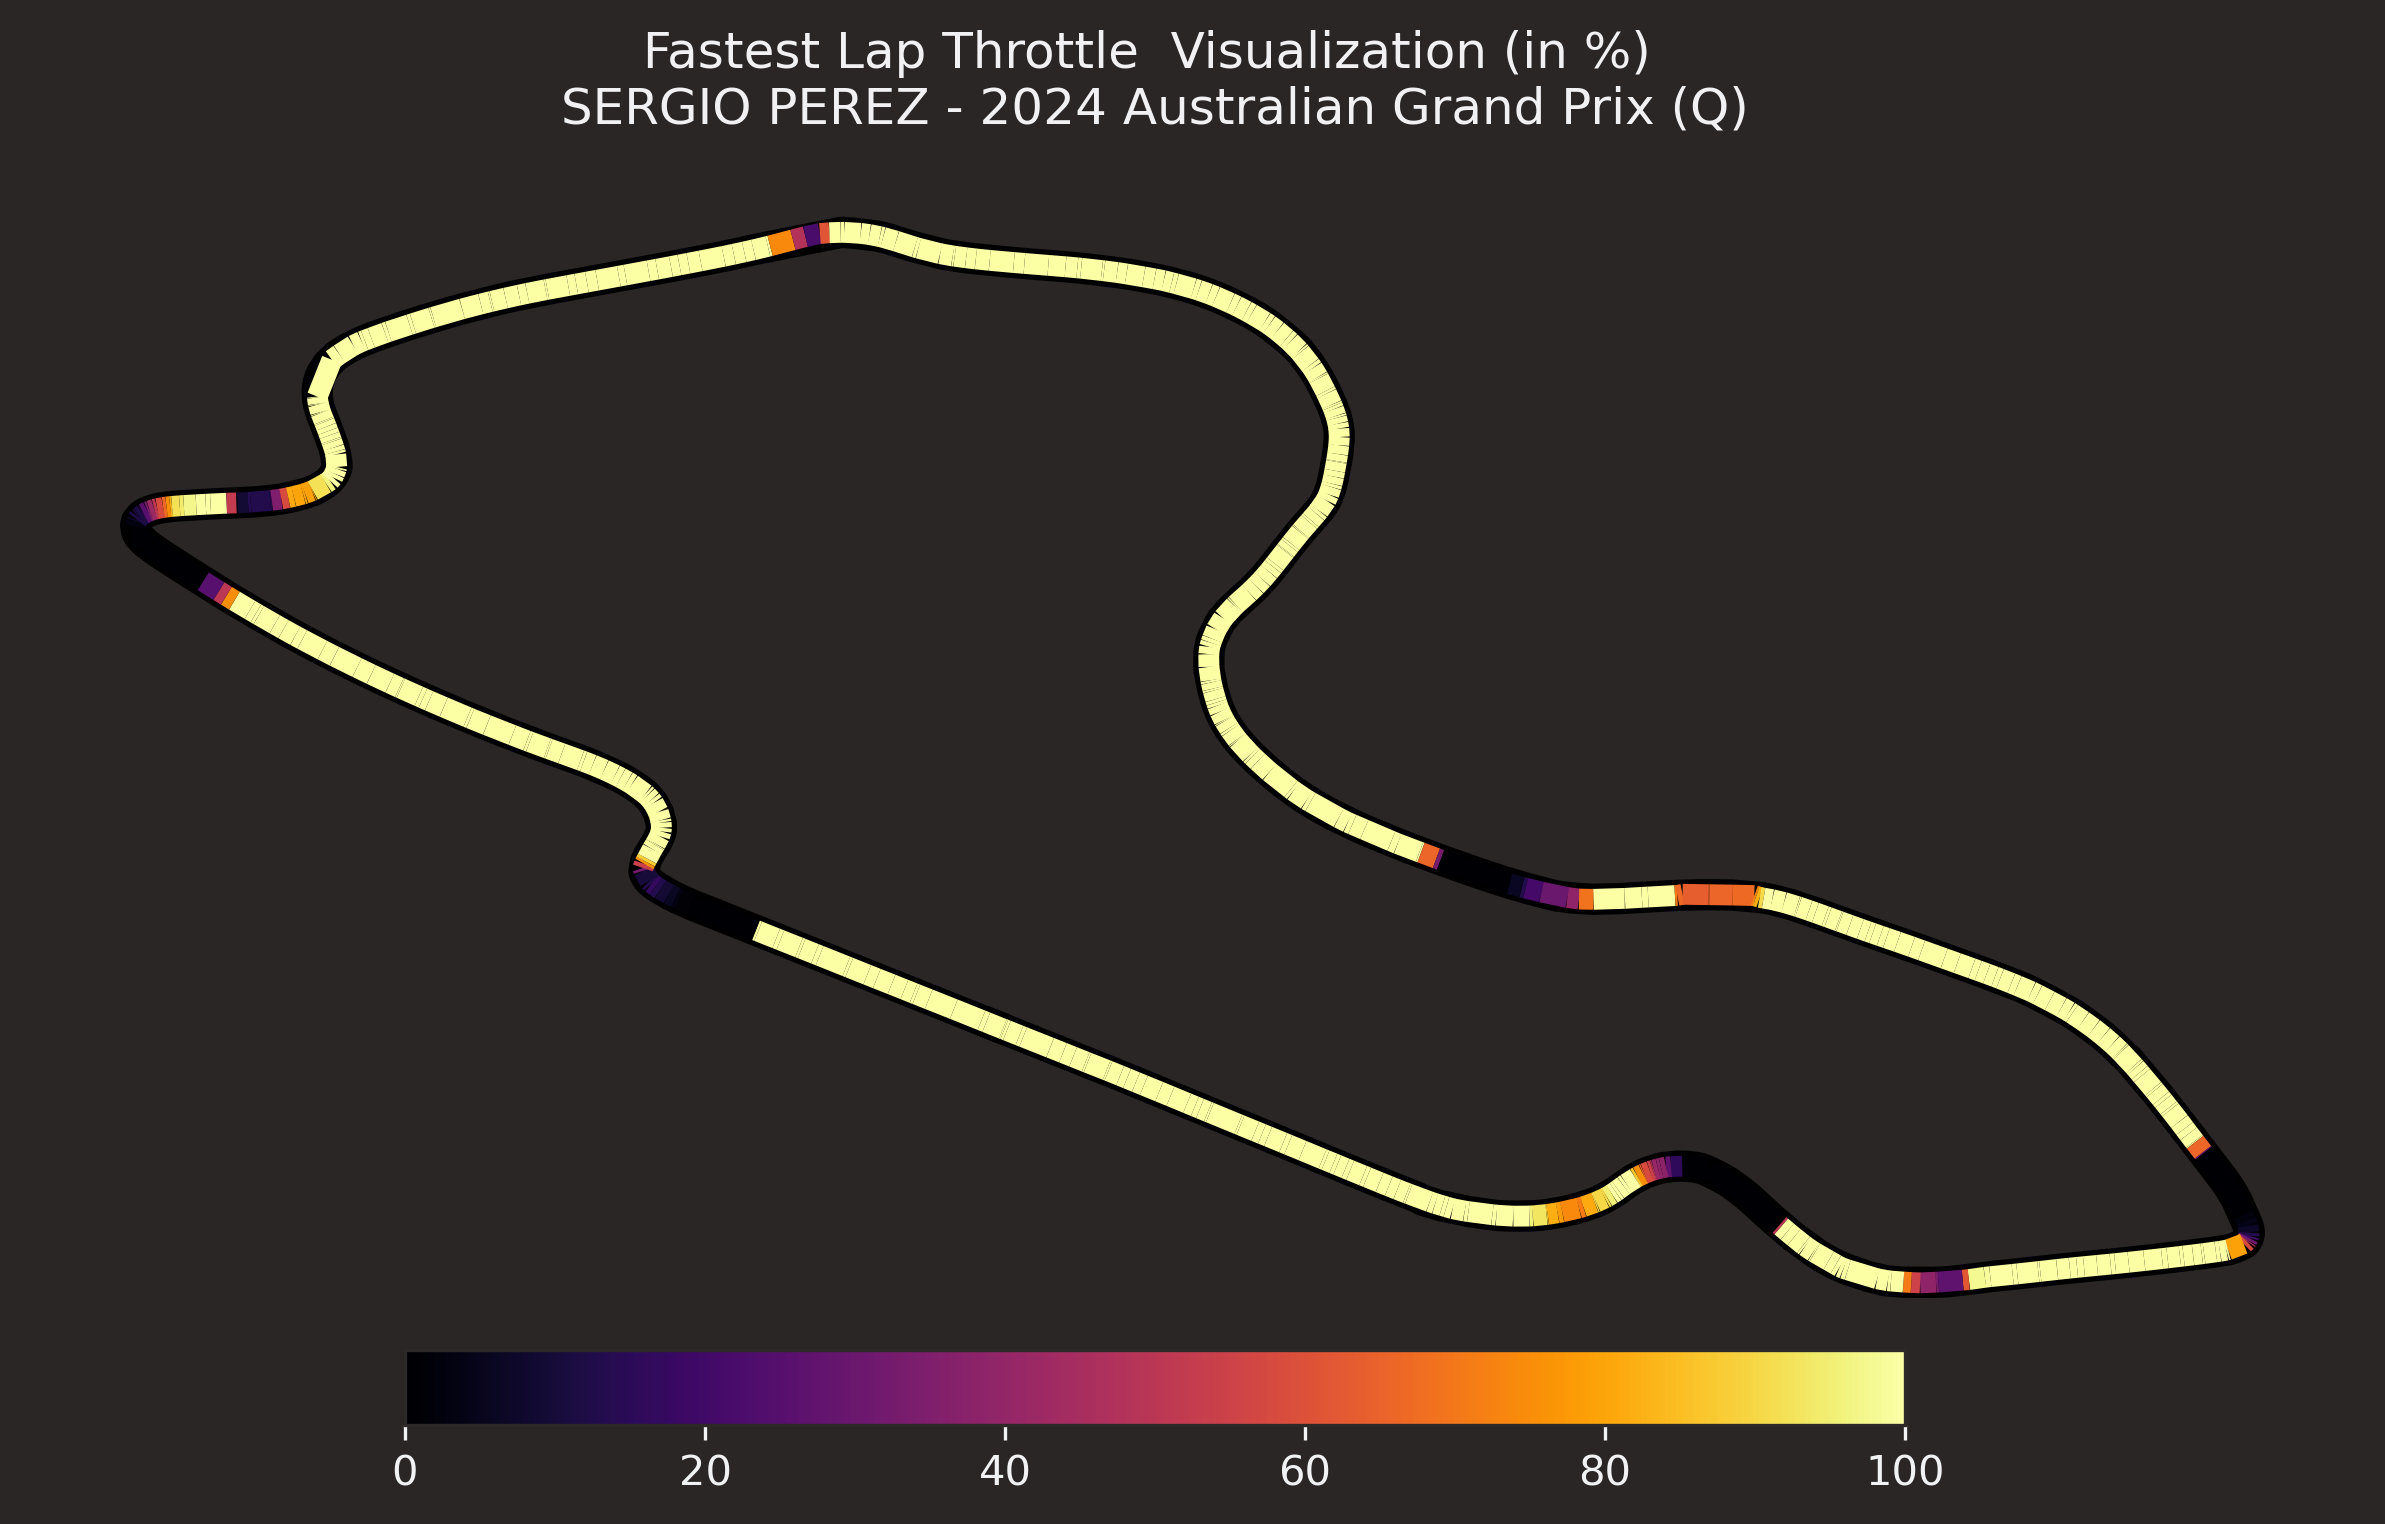

In [30]:
# Podium - 3:

cmap = matplotlib.colormaps['inferno']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Throttle  Visualization (in %) \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['Throttle'].min(), pod_3_tel['Throttle'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['Throttle'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['Throttle'].min(), vmax=pod_3_tel['Throttle'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

In [31]:
#Driver's Brake

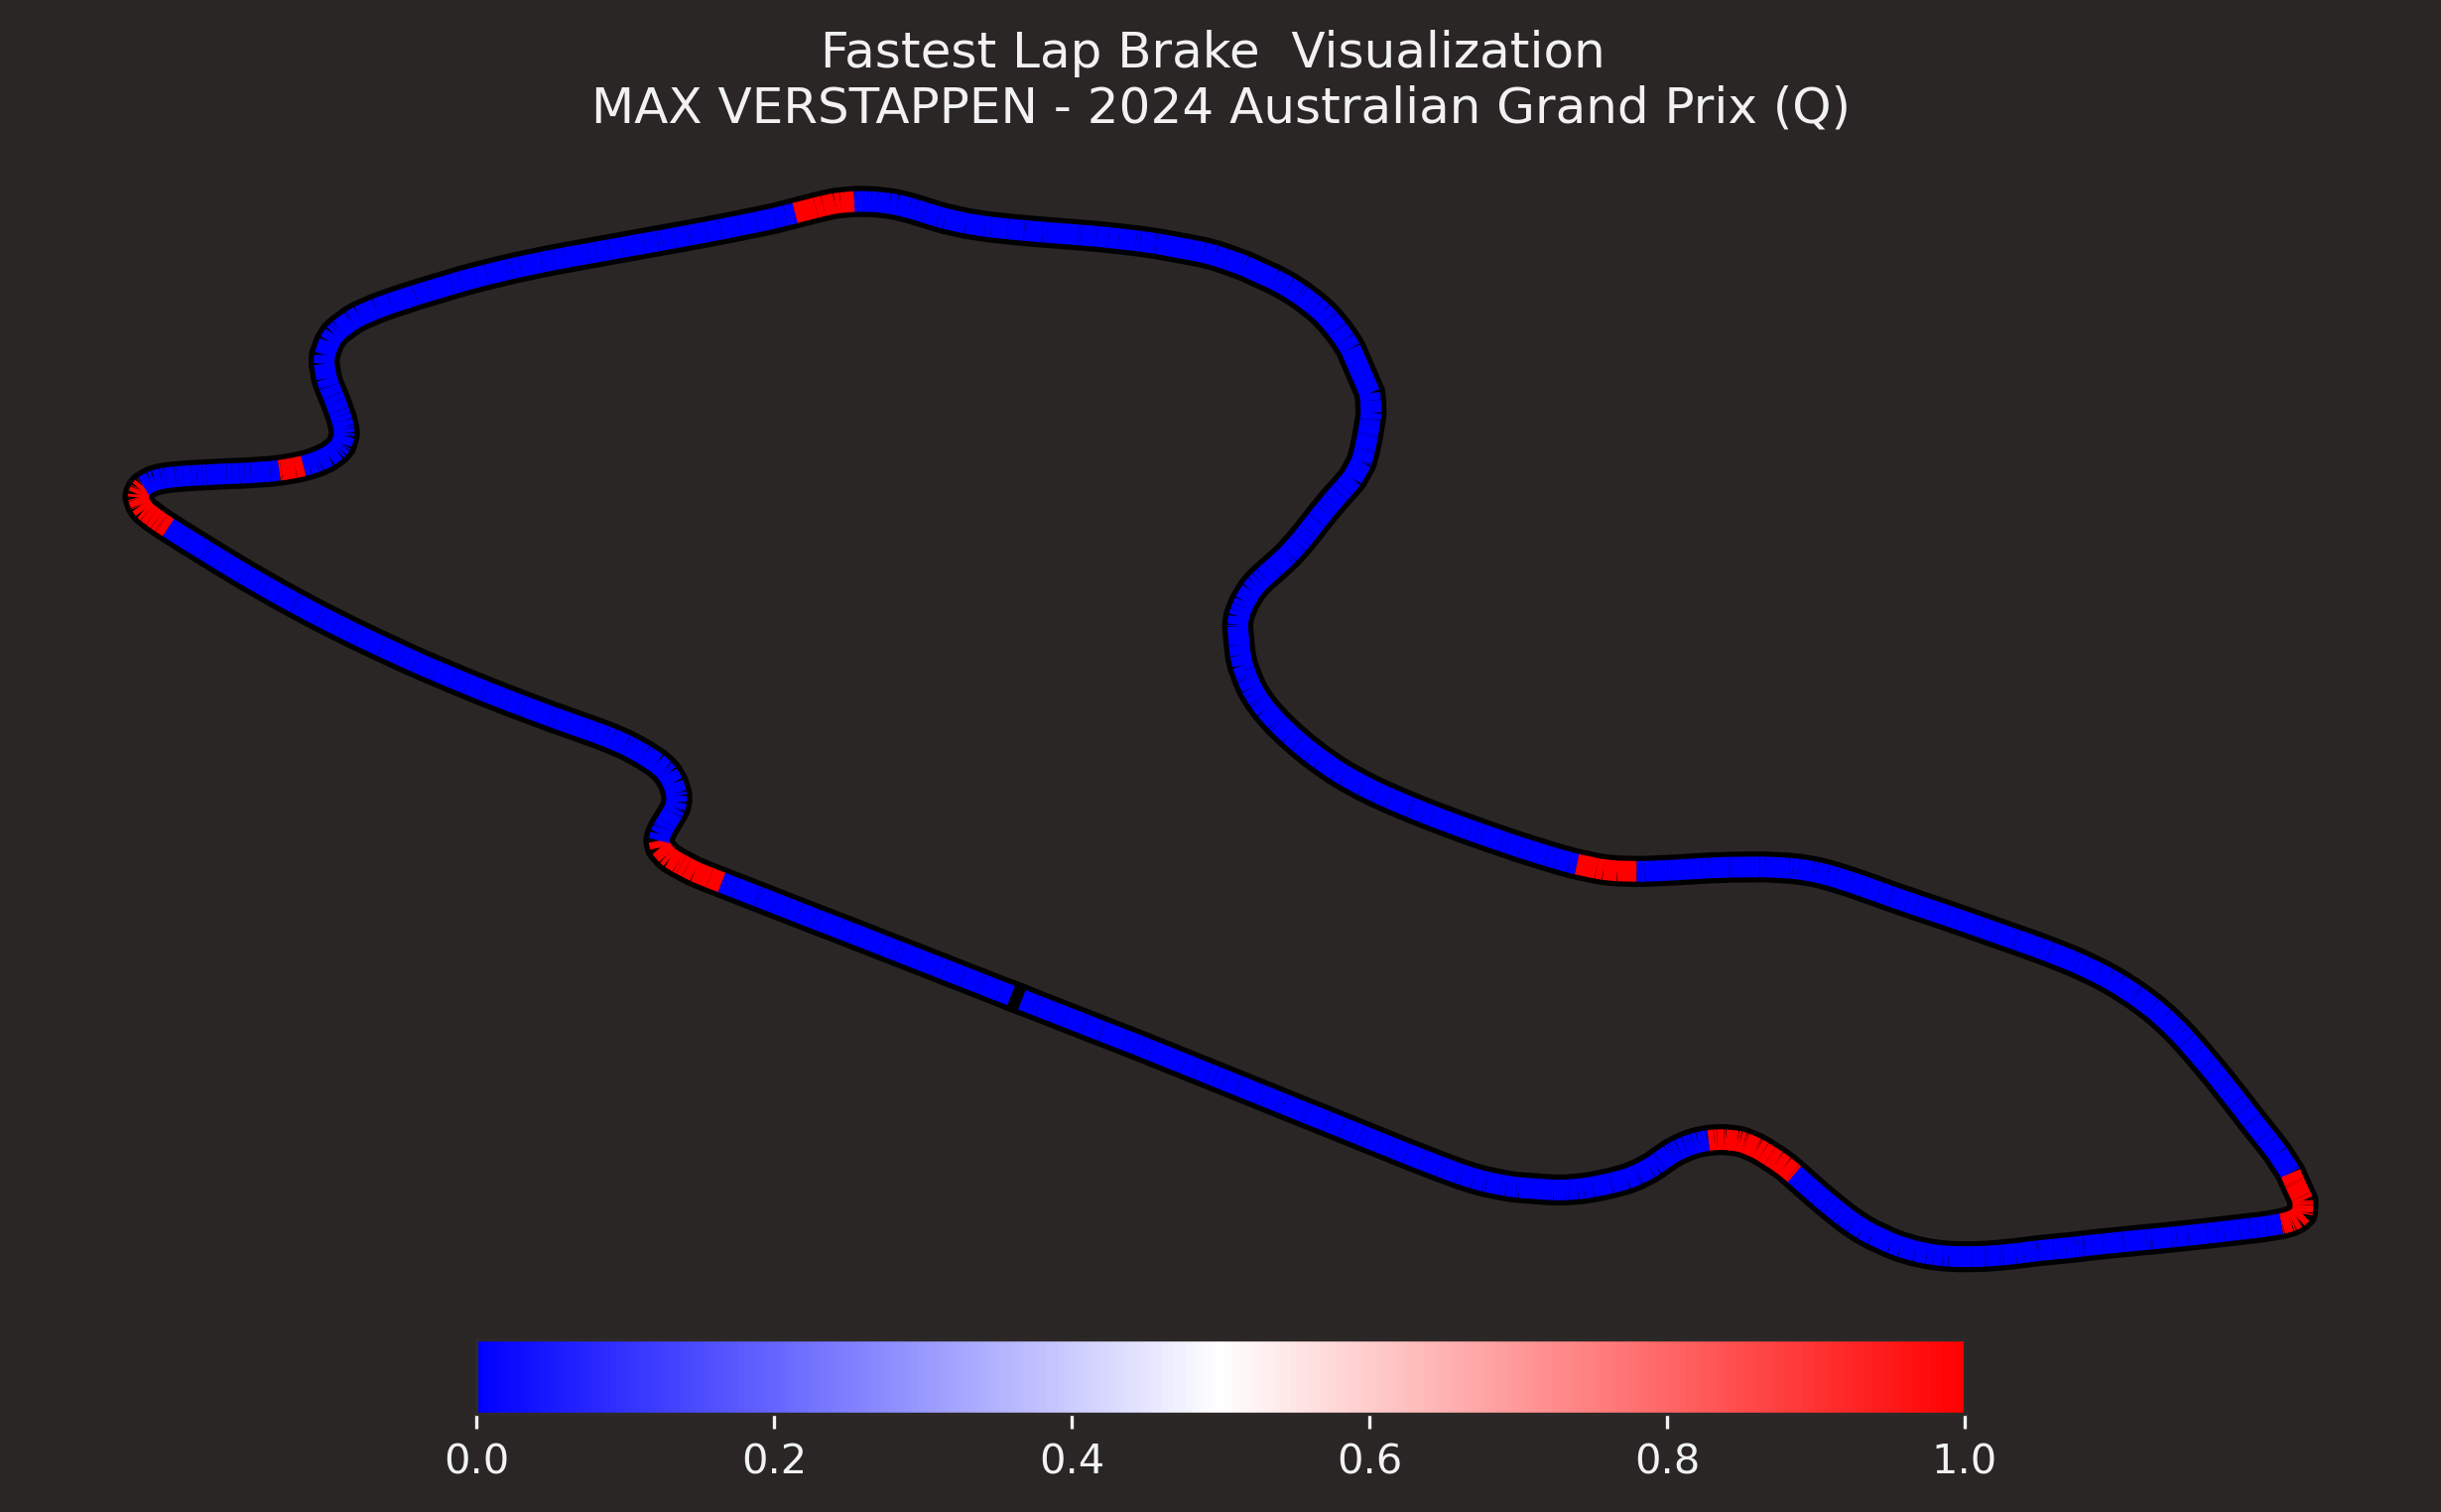

In [32]:
# Podium - 1:

cmap = matplotlib.colormaps['bwr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Brake  Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_1_tel['X'],pod_1_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_1_tel['Brake'].min(), pod_1_tel['Brake'].max())
lc = LineCollection(segments_1, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_1_tel['Brake'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_1_tel['Brake'].min(), vmax=pod_1_tel['Brake'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

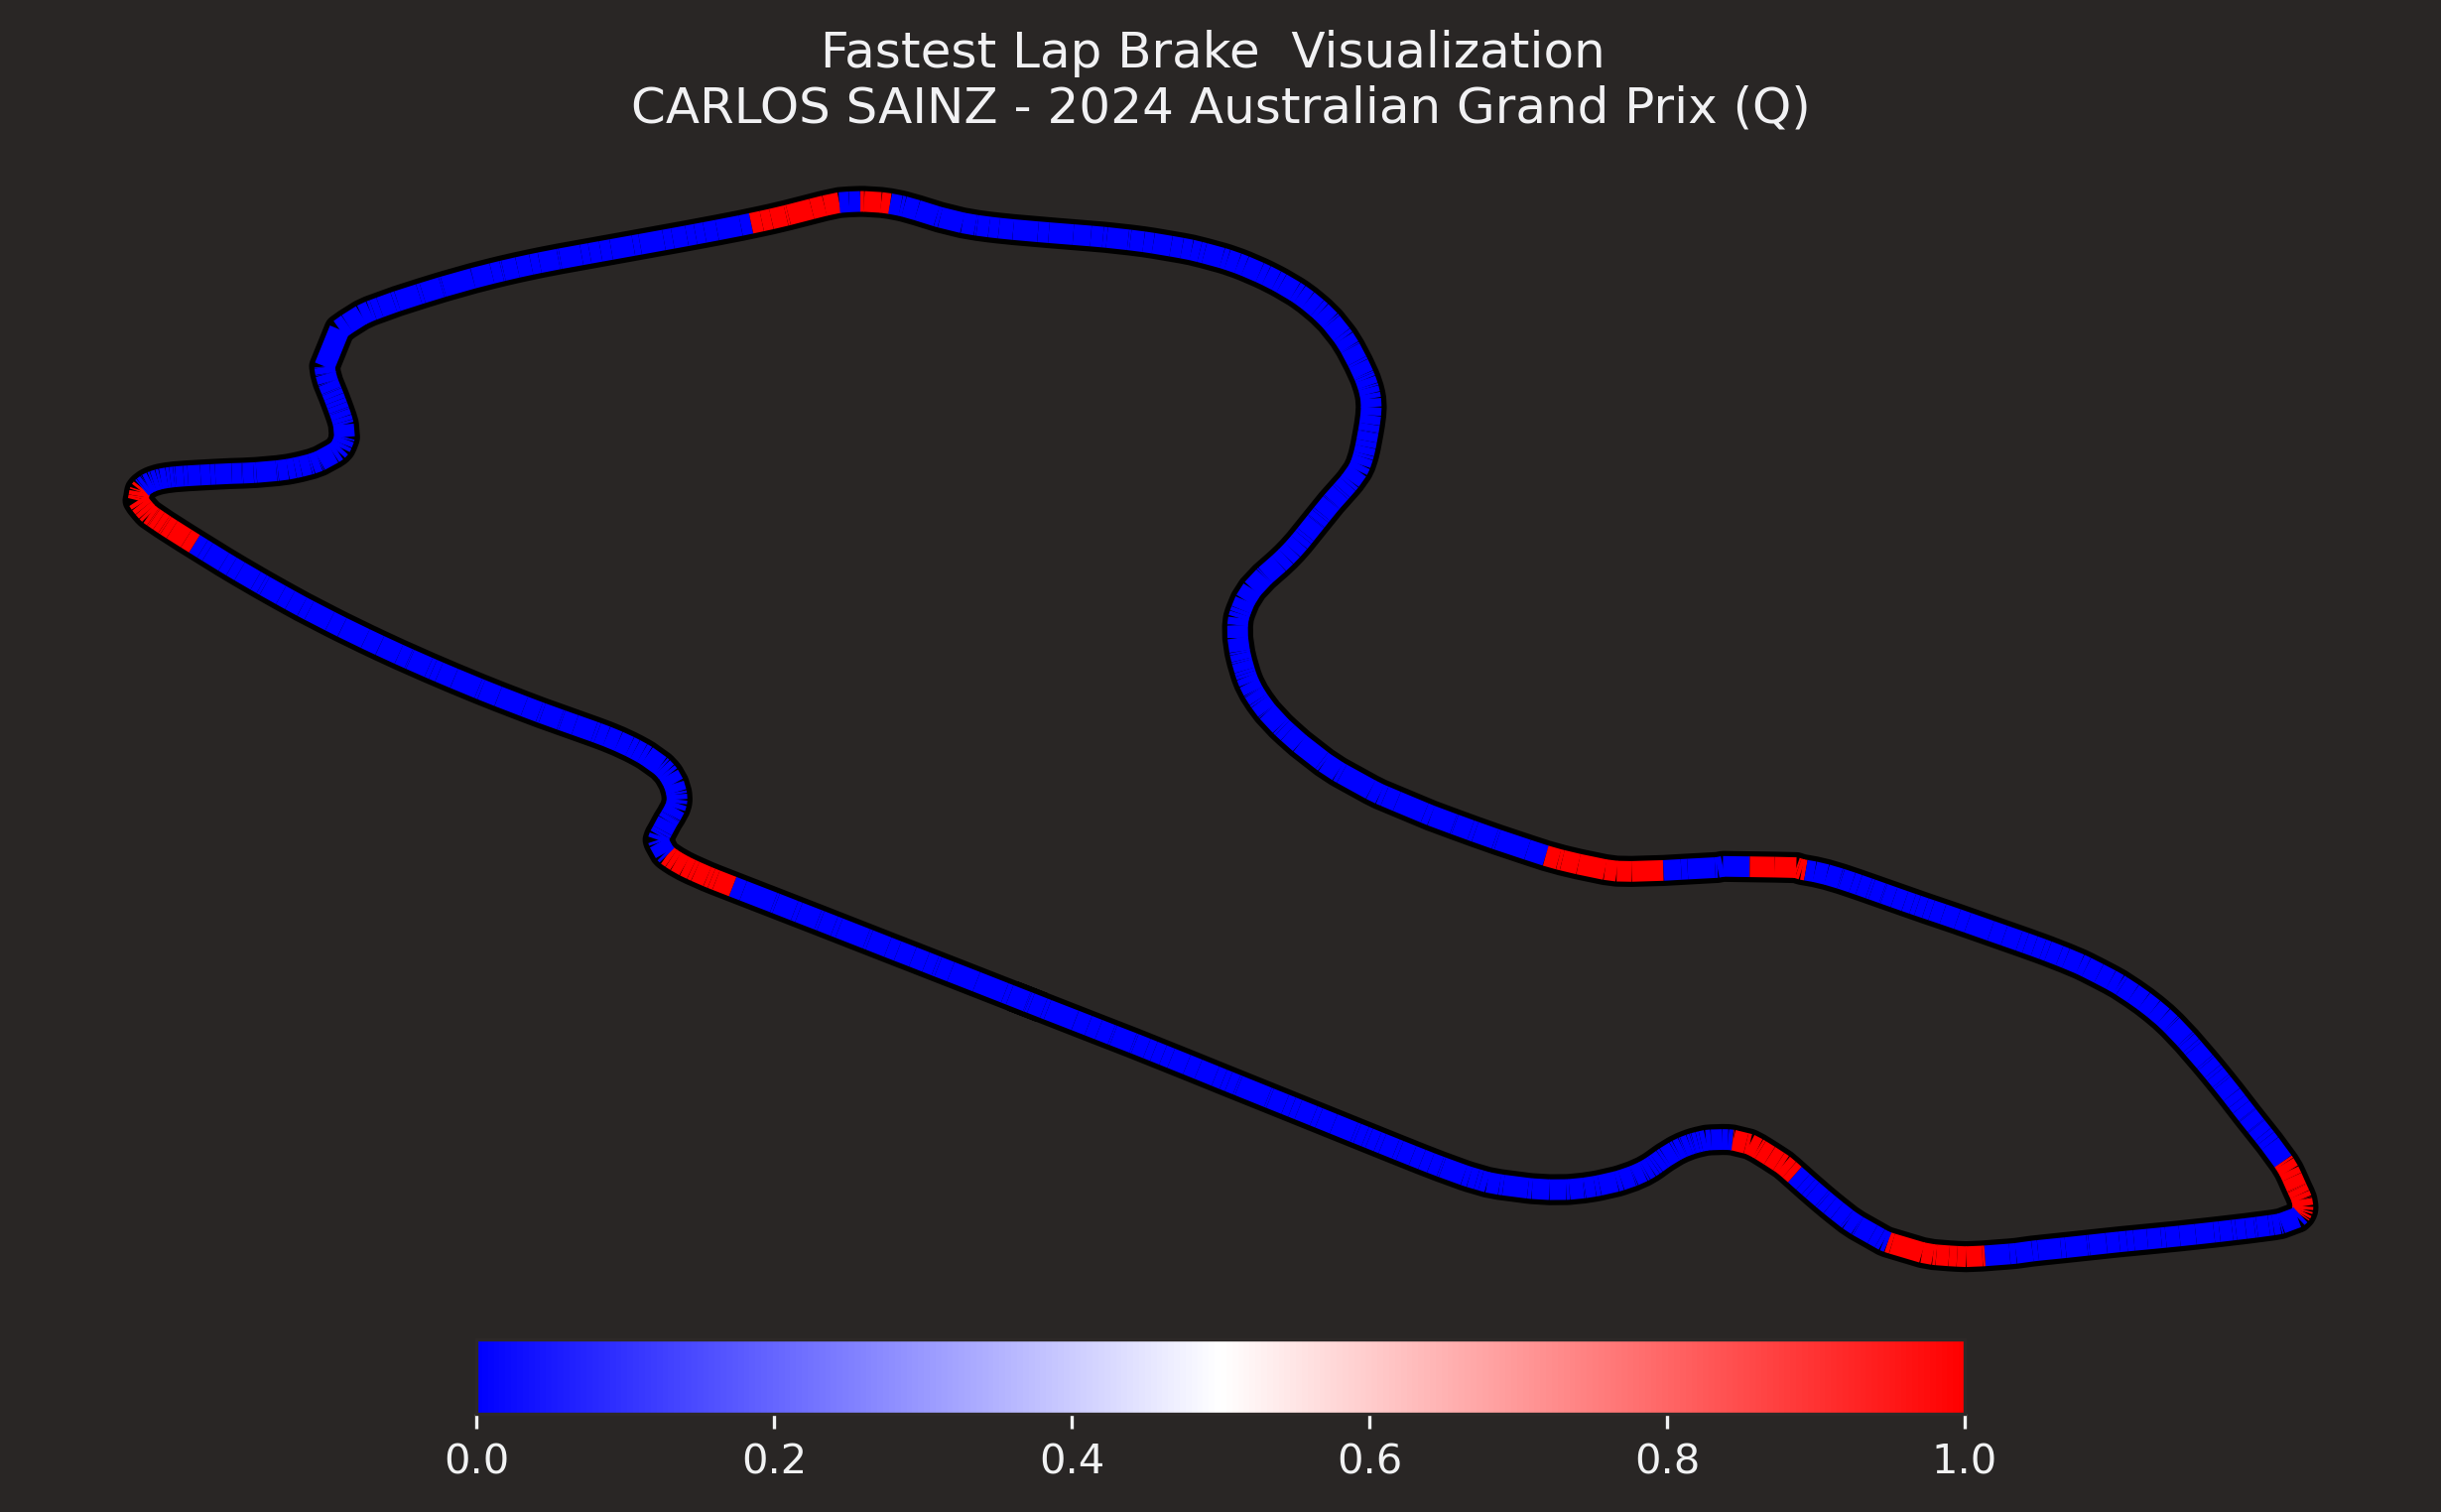

In [33]:
# Podium - 2:

cmap = matplotlib.colormaps['bwr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Brake  Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_2_tel['X'],pod_2_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_2_tel['Brake'].min(), pod_2_tel['Brake'].max())
lc = LineCollection(segments_2, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_2_tel['Brake'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_2_tel['Brake'].min(), vmax=pod_2_tel['Brake'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

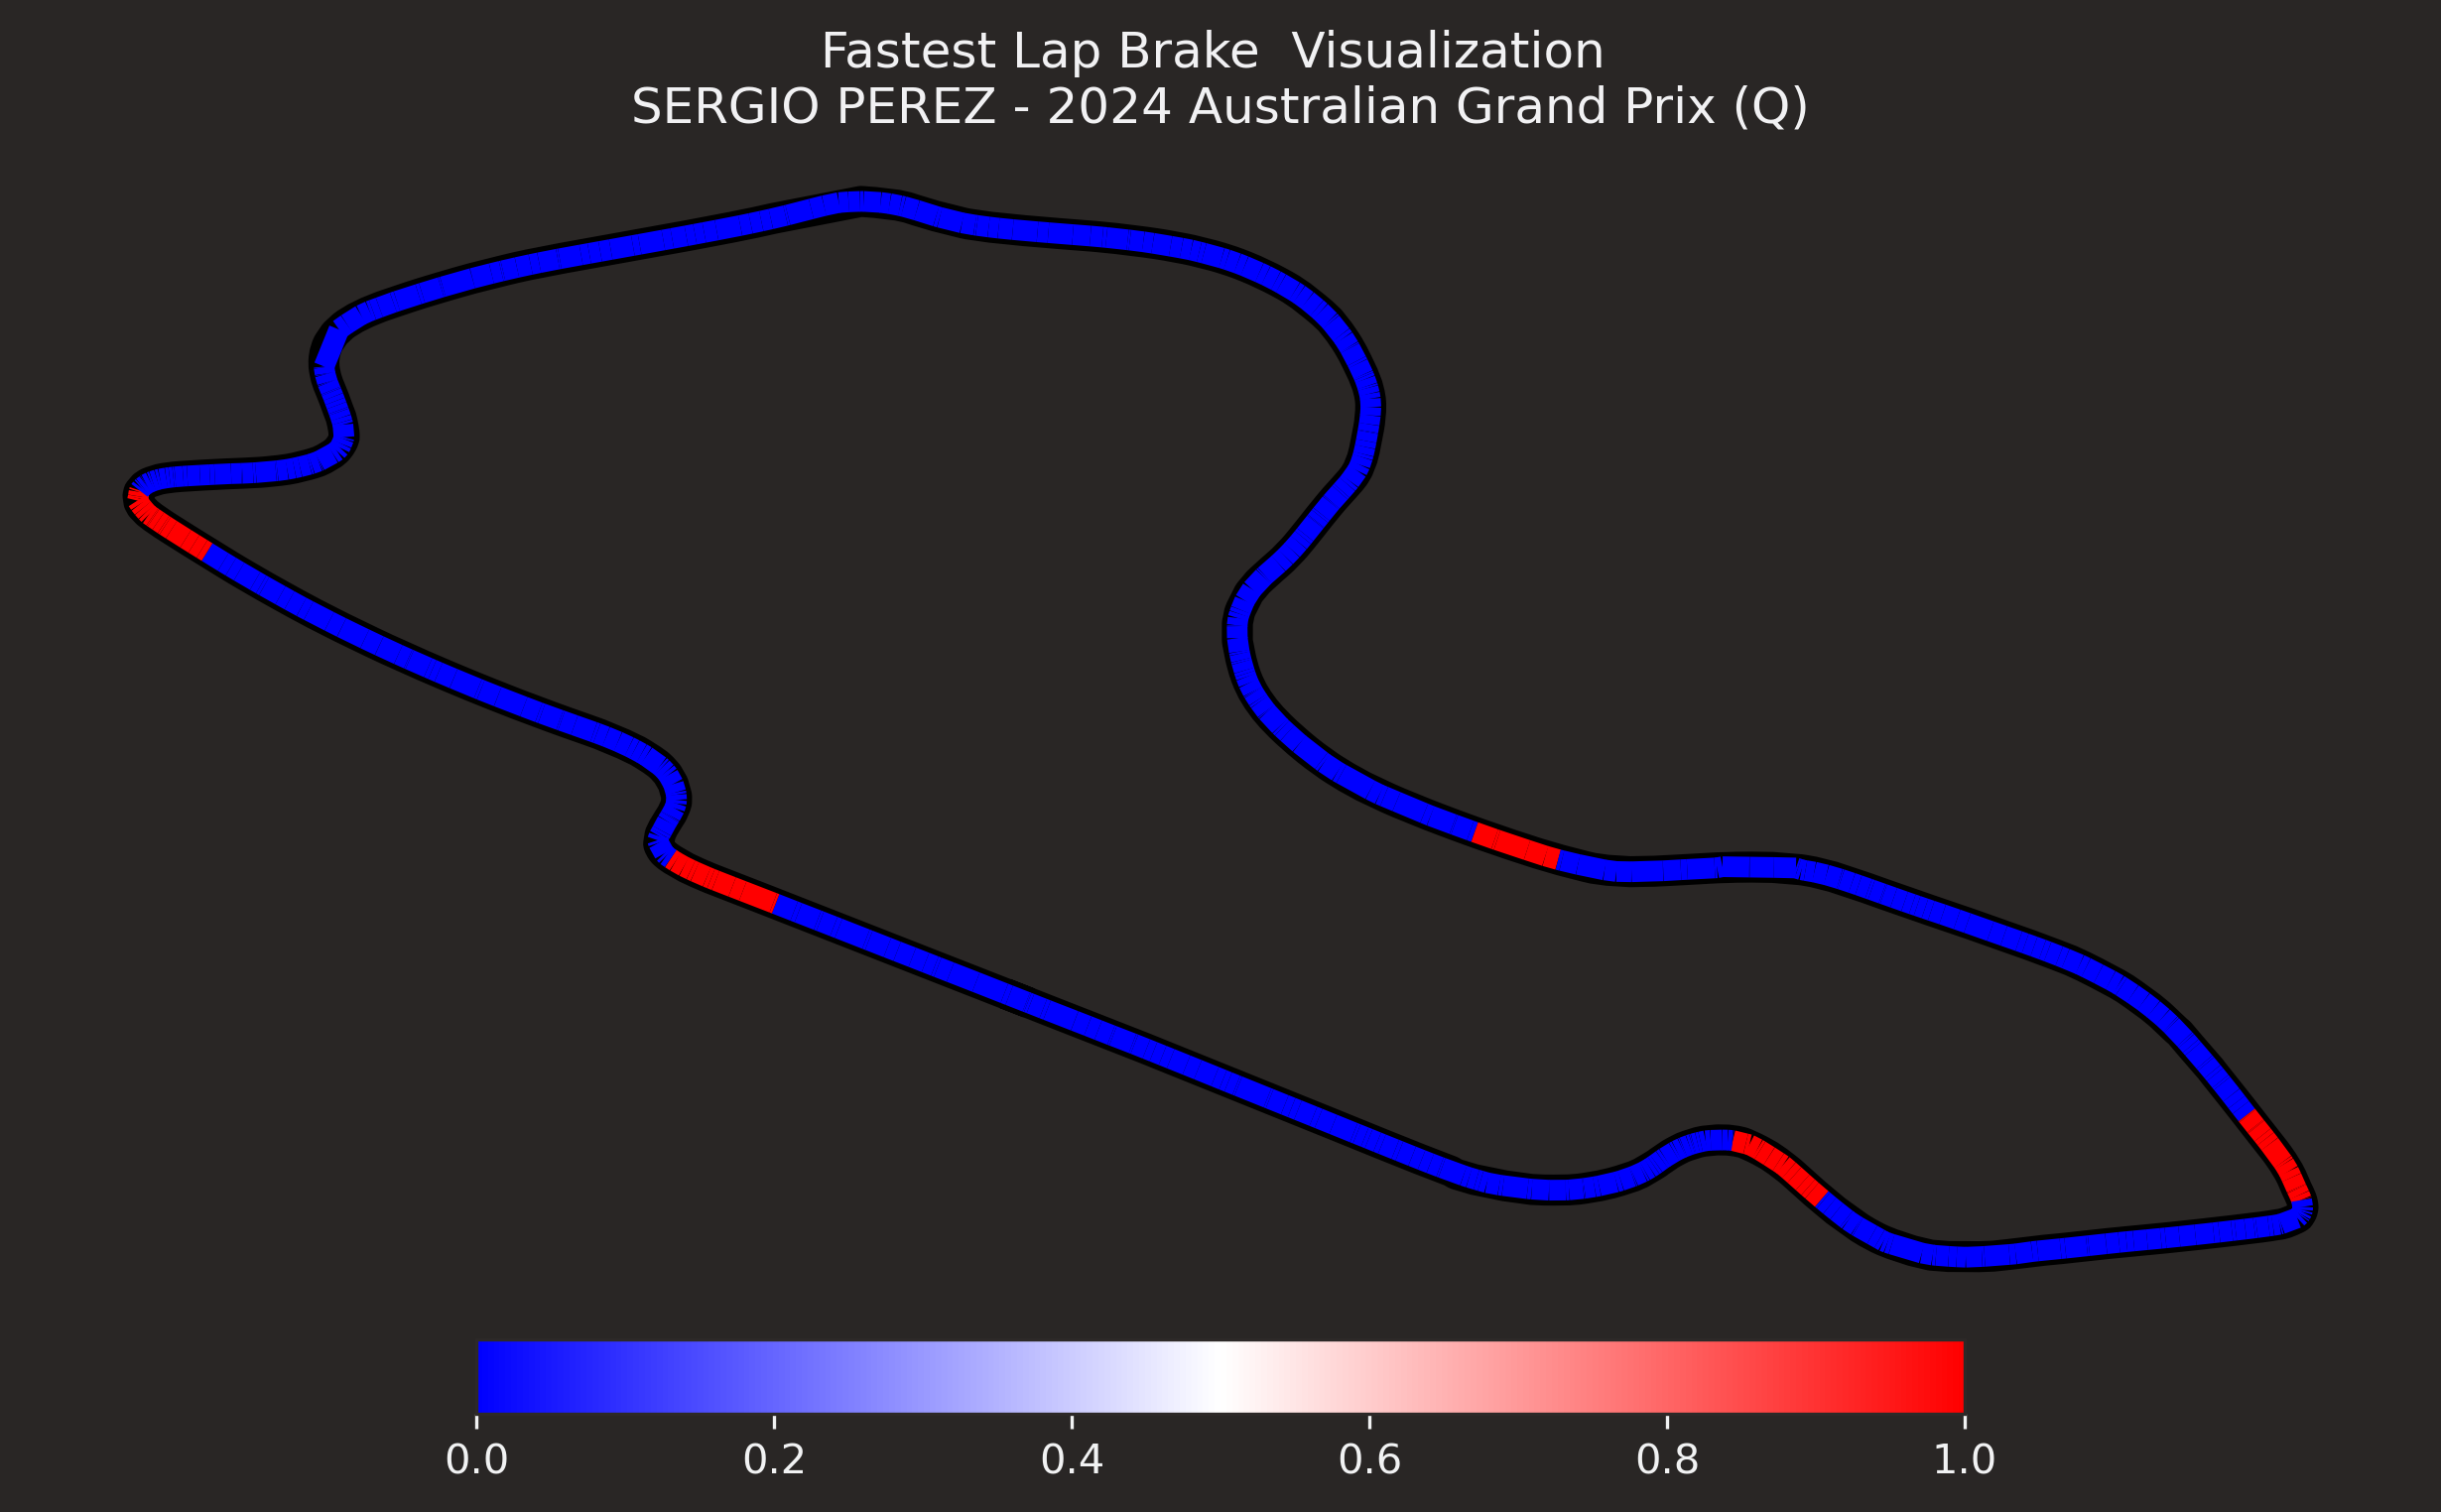

In [34]:
# Podium - 3:

cmap = matplotlib.colormaps['bwr']

fig, ax = plt.subplots(sharex=True, sharey=True ,figsize=(10,5),dpi=300)

fig.suptitle(
    f"Fastest Lap Brake  Visualization \n"
    f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})"
)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(pod_3_tel['X'],pod_3_tel['Y'], color='black', linestyle='-', linewidth=7.5, zorder=0)

norm = plt.Normalize(pod_3_tel['Brake'].min(), pod_3_tel['Brake'].max())
lc = LineCollection(segments_3, cmap=cmap , norm=norm, linestyle='-', linewidth=5)

lc.set_array(pod_3_tel['Brake'])

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = matplotlib.colors.Normalize(vmin=pod_3_tel['Brake'].min(), vmax=pod_3_tel['Brake'].max())
legend = matplotlib.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=cmap , orientation="horizontal")

plt.show()

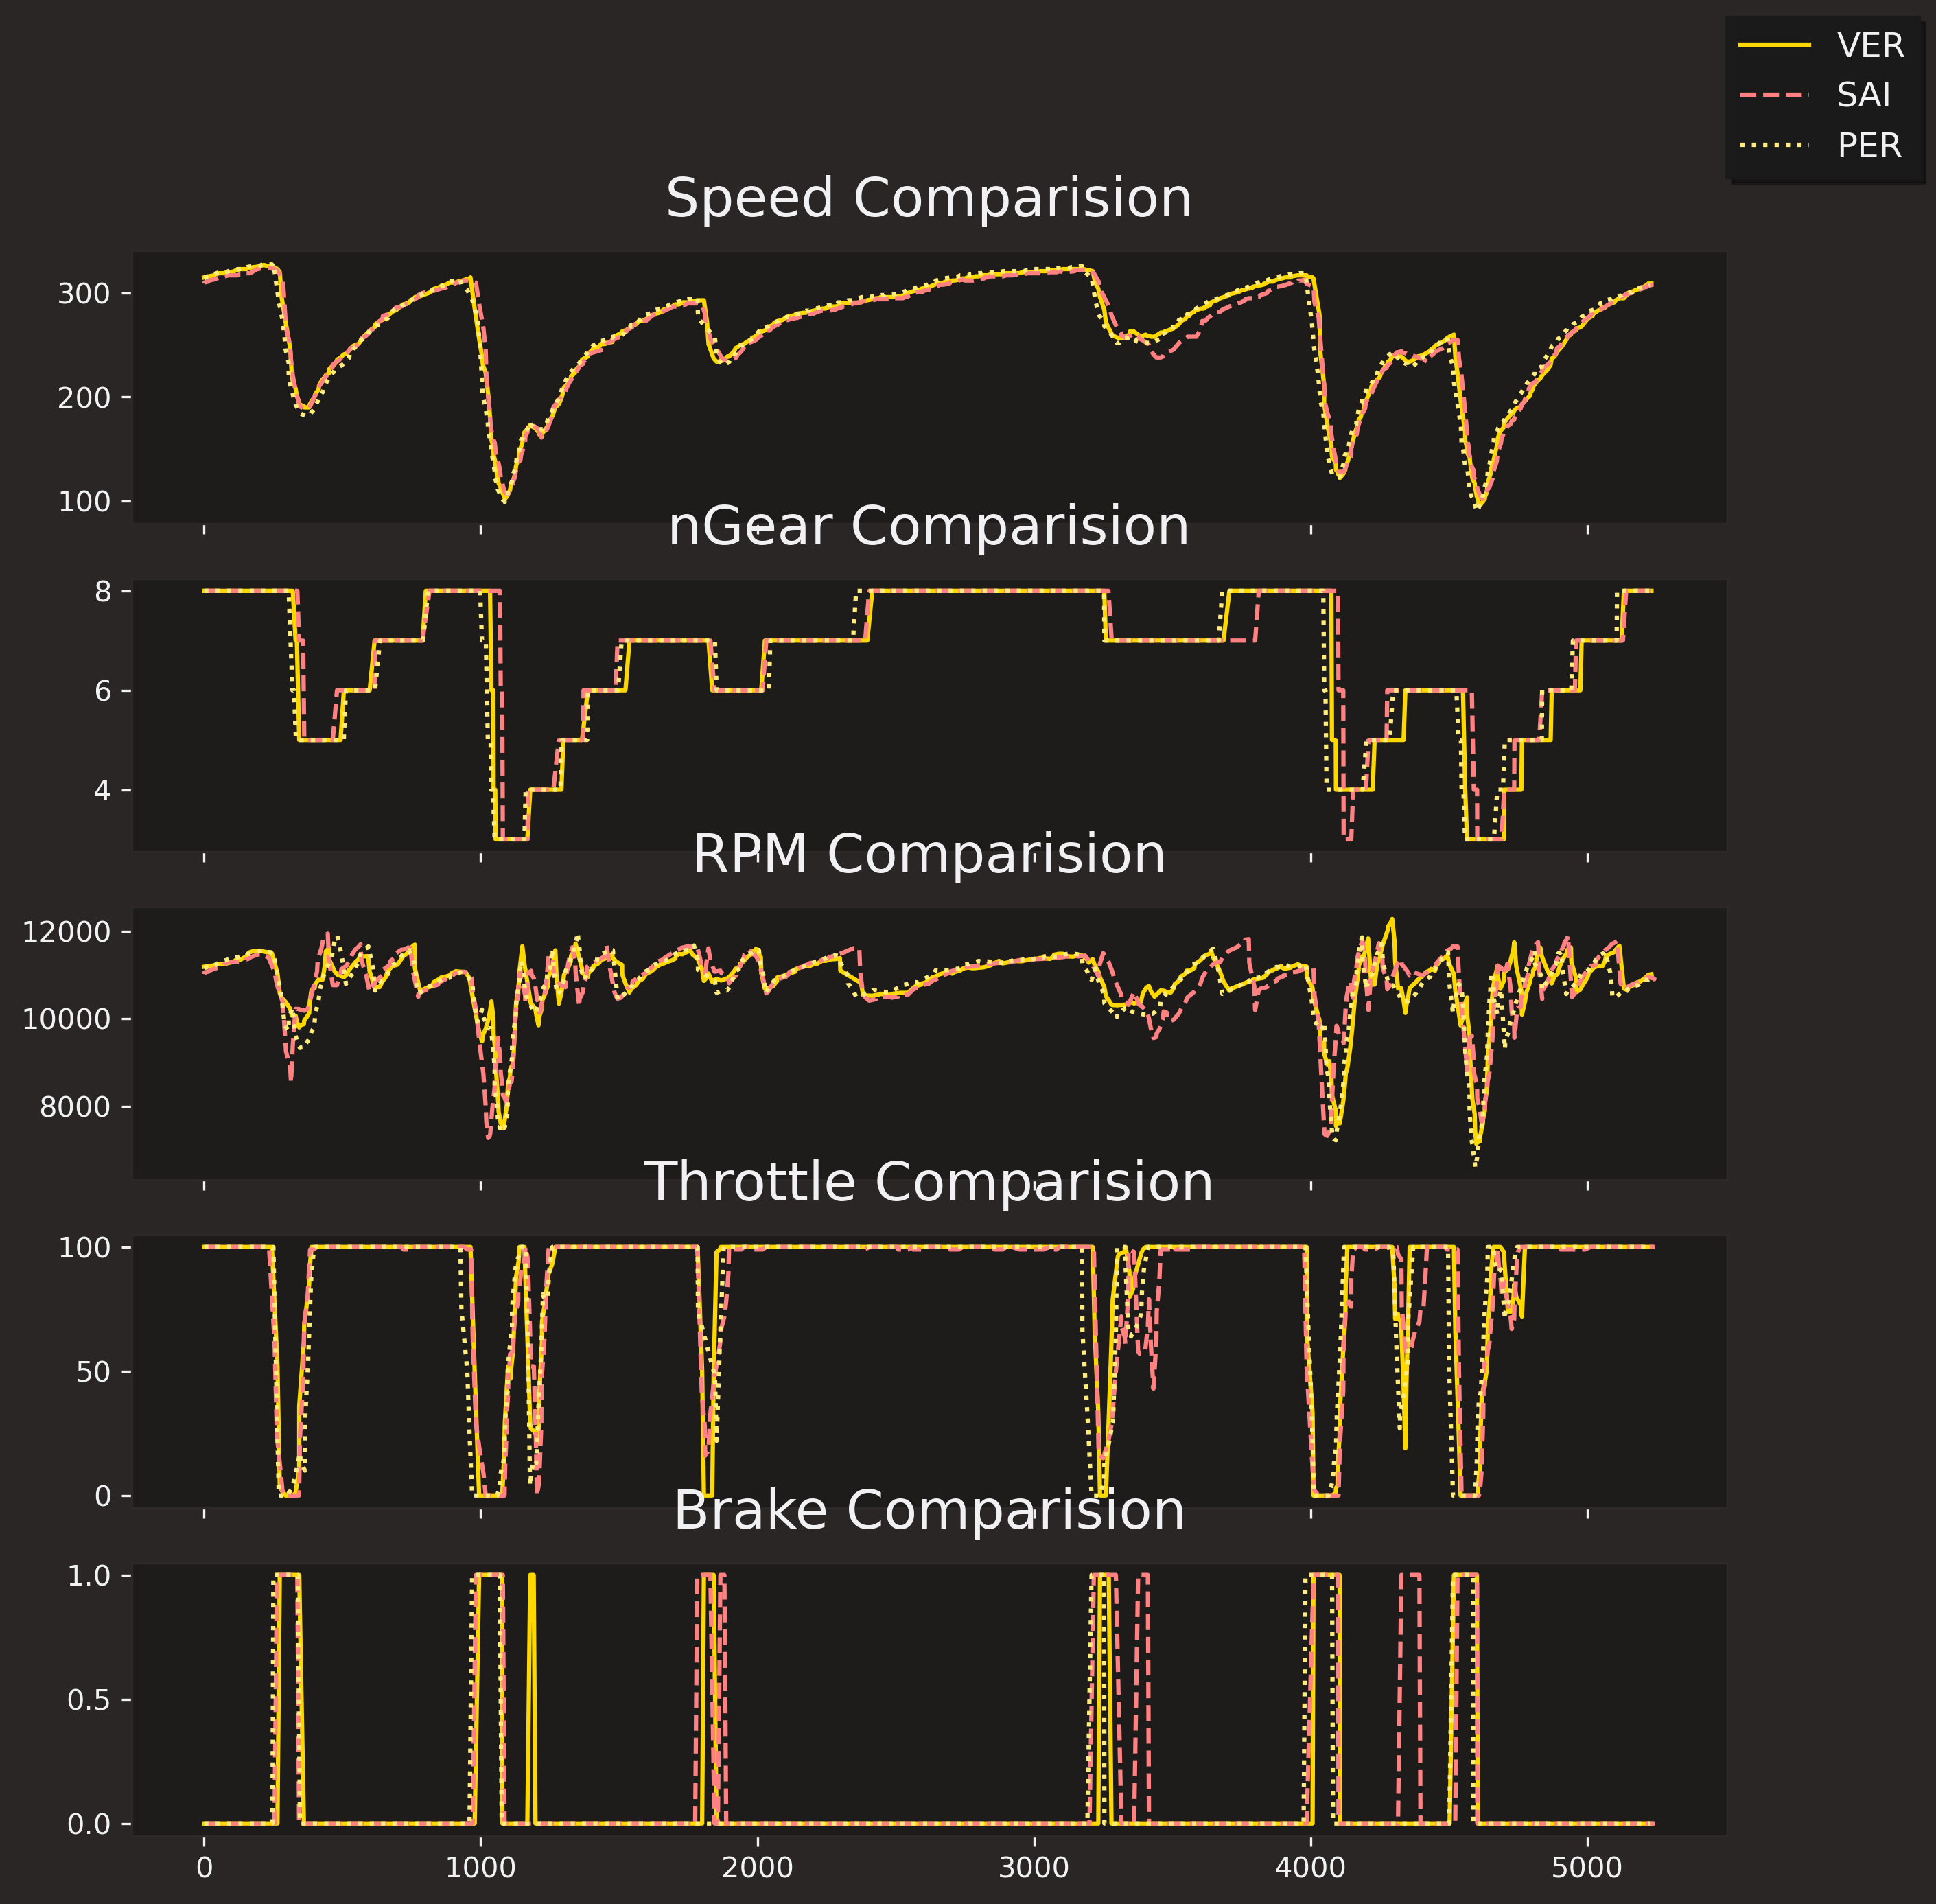

In [35]:
# POD_1
fig, axs = plt.subplots(5,sharex=True,figsize=(10,10),dpi = 300)
# plt.legend(frameon=False)

labels = [pod_1['Driver'],pod_2['Driver'],pod_3['Driver']]

axs[0].plot(pod_1_tel['Distance'], pod_1_tel['Speed'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[0].plot(pod_2_tel['Distance'], pod_2_tel['Speed'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[0].plot(pod_3_tel['Distance'], pod_3_tel['Speed'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[0].set_title('Speed Comparision')

axs[1].plot(pod_1_tel['Distance'], pod_1_tel['nGear'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[1].plot(pod_2_tel['Distance'], pod_2_tel['nGear'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[1].plot(pod_3_tel['Distance'], pod_3_tel['nGear'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[1].set_title('nGear Comparision')

axs[2].plot(pod_1_tel['Distance'], pod_1_tel['RPM'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[2].plot(pod_2_tel['Distance'], pod_2_tel['RPM'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[2].plot(pod_3_tel['Distance'], pod_3_tel['RPM'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[2].set_title('RPM Comparision')

axs[3].plot(pod_1_tel['Distance'], pod_1_tel['Throttle'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[3].plot(pod_2_tel['Distance'], pod_2_tel['Throttle'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[3].plot(pod_3_tel['Distance'], pod_3_tel['Throttle'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[3].set_title('Throttle Comparision')

axs[4].plot(pod_1_tel['Distance'], pod_1_tel['Brake'],label=pod_1['Driver'],color=fastf1.plotting.driver_color(pod_1['Driver']),linestyle='solid')
axs[4].plot(pod_2_tel['Distance'], pod_2_tel['Brake'],label=pod_2['Driver'],color=fastf1.plotting.driver_color(pod_2['Driver']),linestyle='dashed')
axs[4].plot(pod_3_tel['Distance'], pod_3_tel['Brake'],label=pod_3['Driver'],color=fastf1.plotting.driver_color(pod_3['Driver']),linestyle='dotted')
axs[4].set_title('Brake Comparision')

fig.legend(labels=labels,loc="upper right",shadow=True,fontsize='12')


plt.show()

In [36]:
#Drivers Position During the race

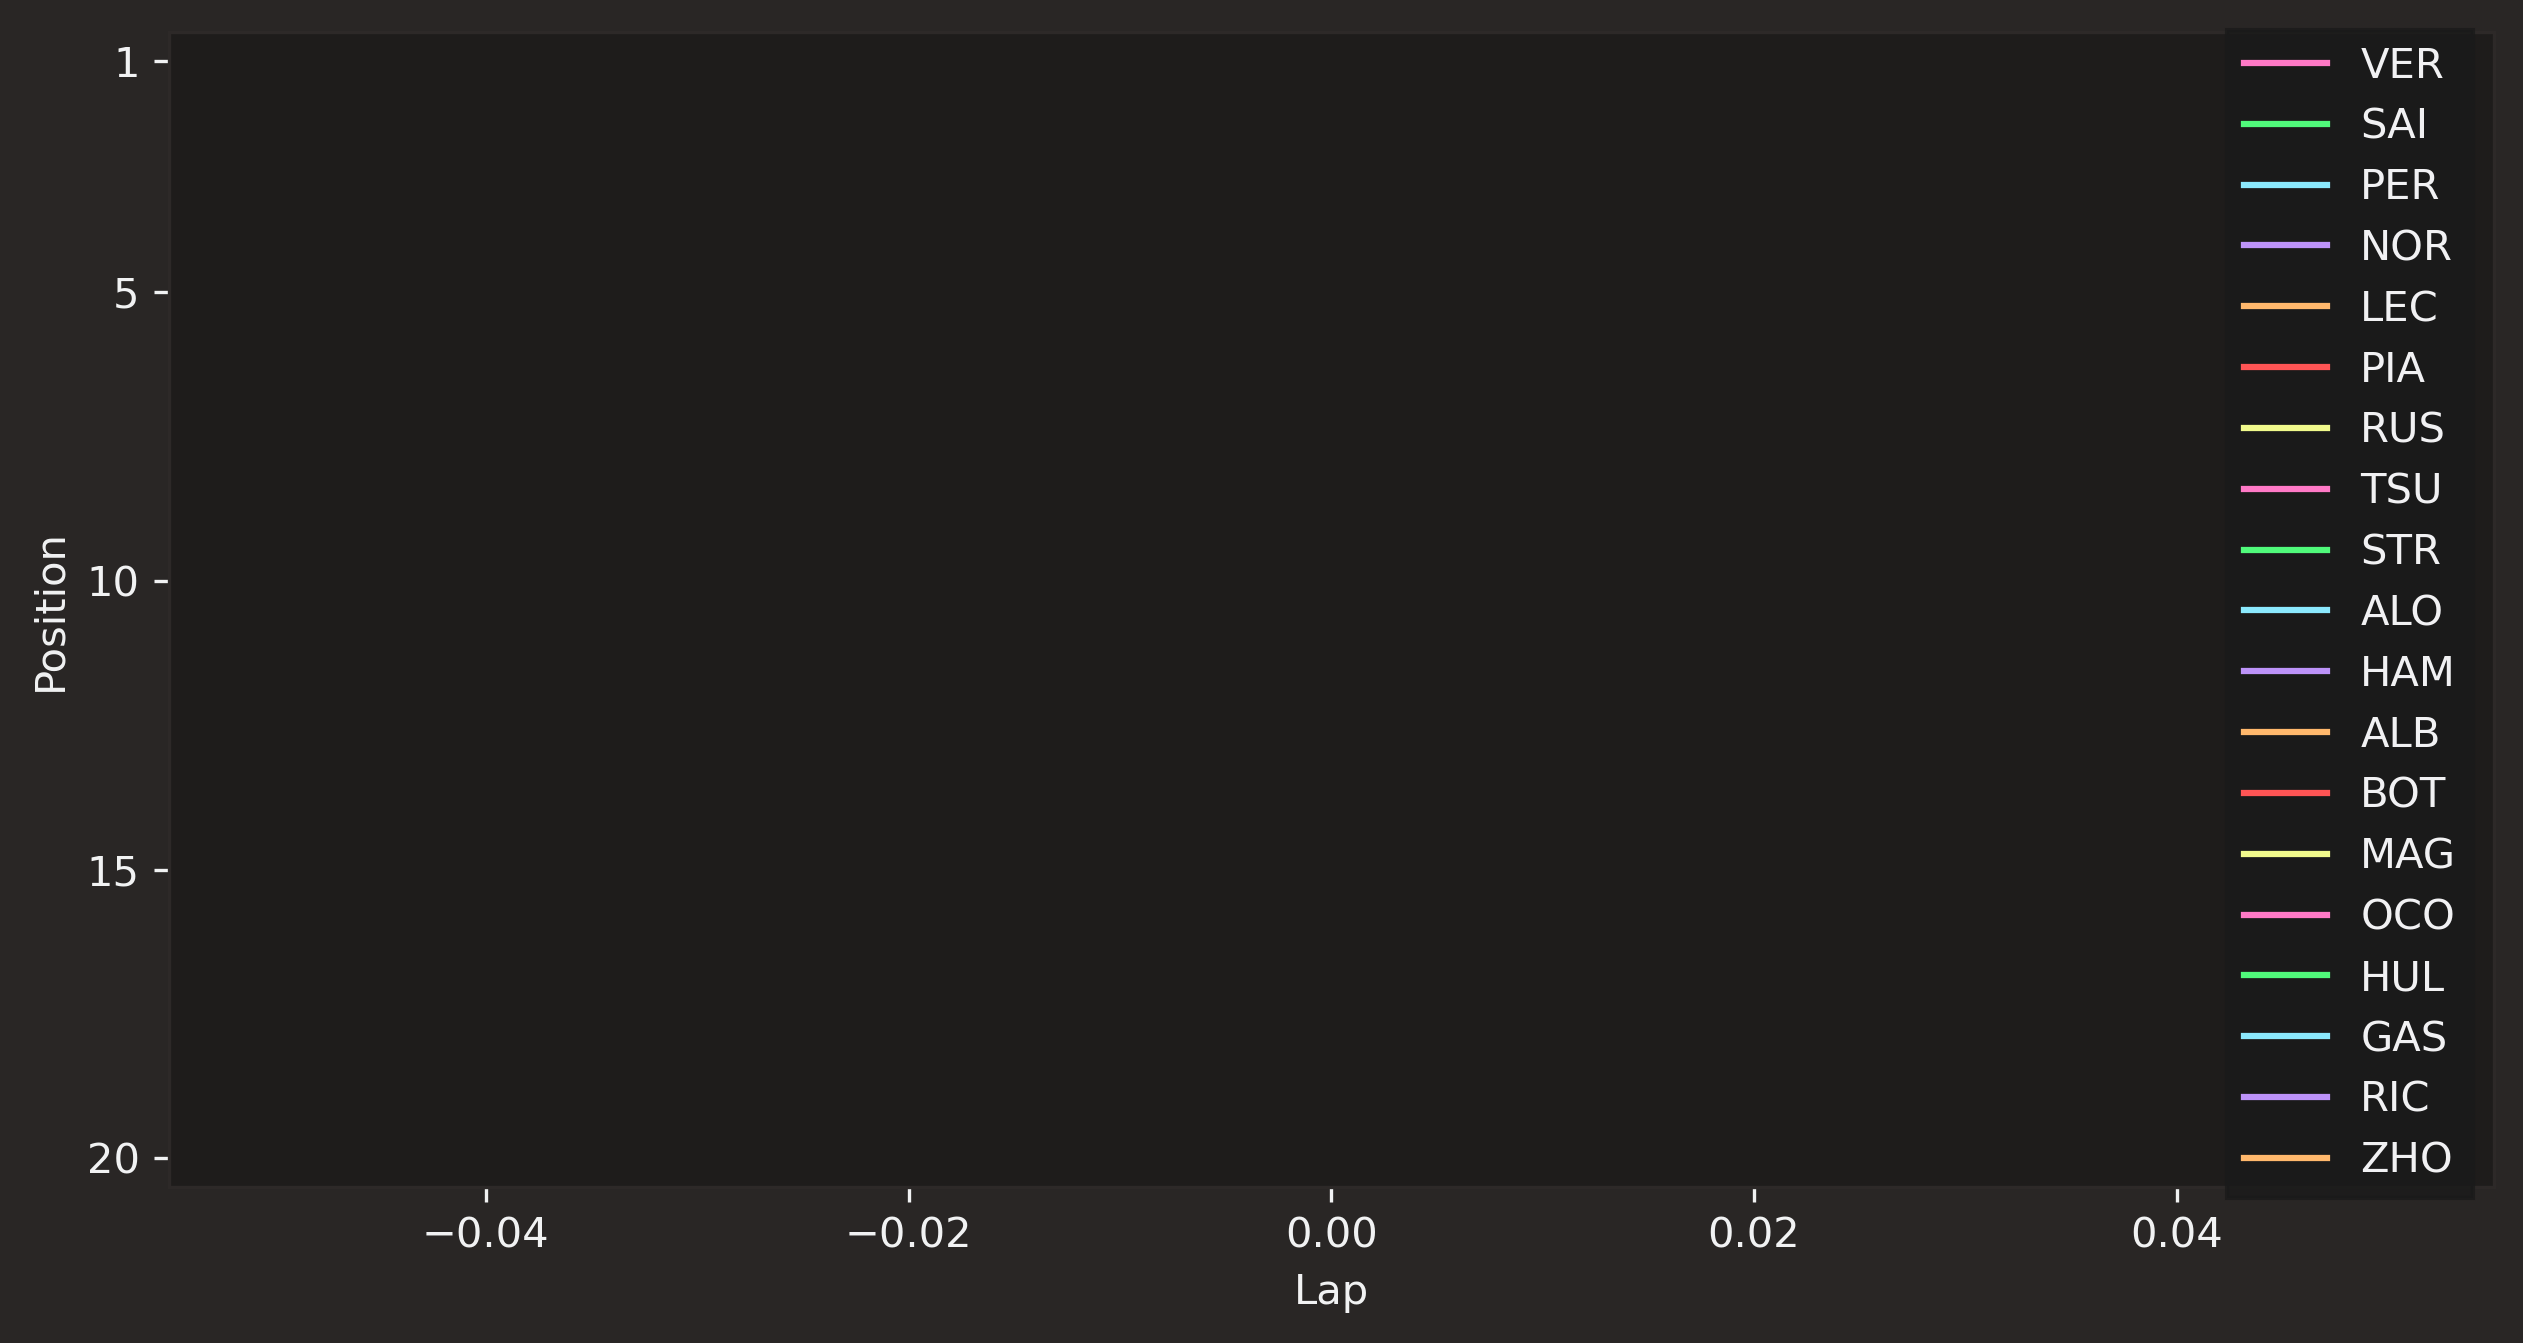

In [37]:
fig, ax = plt.subplots(figsize=(10.0, 5.0),dpi=300)

for drv in race_data.drivers:
    drv_laps = race_data.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    # color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb)
    
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))

plt.show()

In [38]:
#Driver's Lap Time Performance

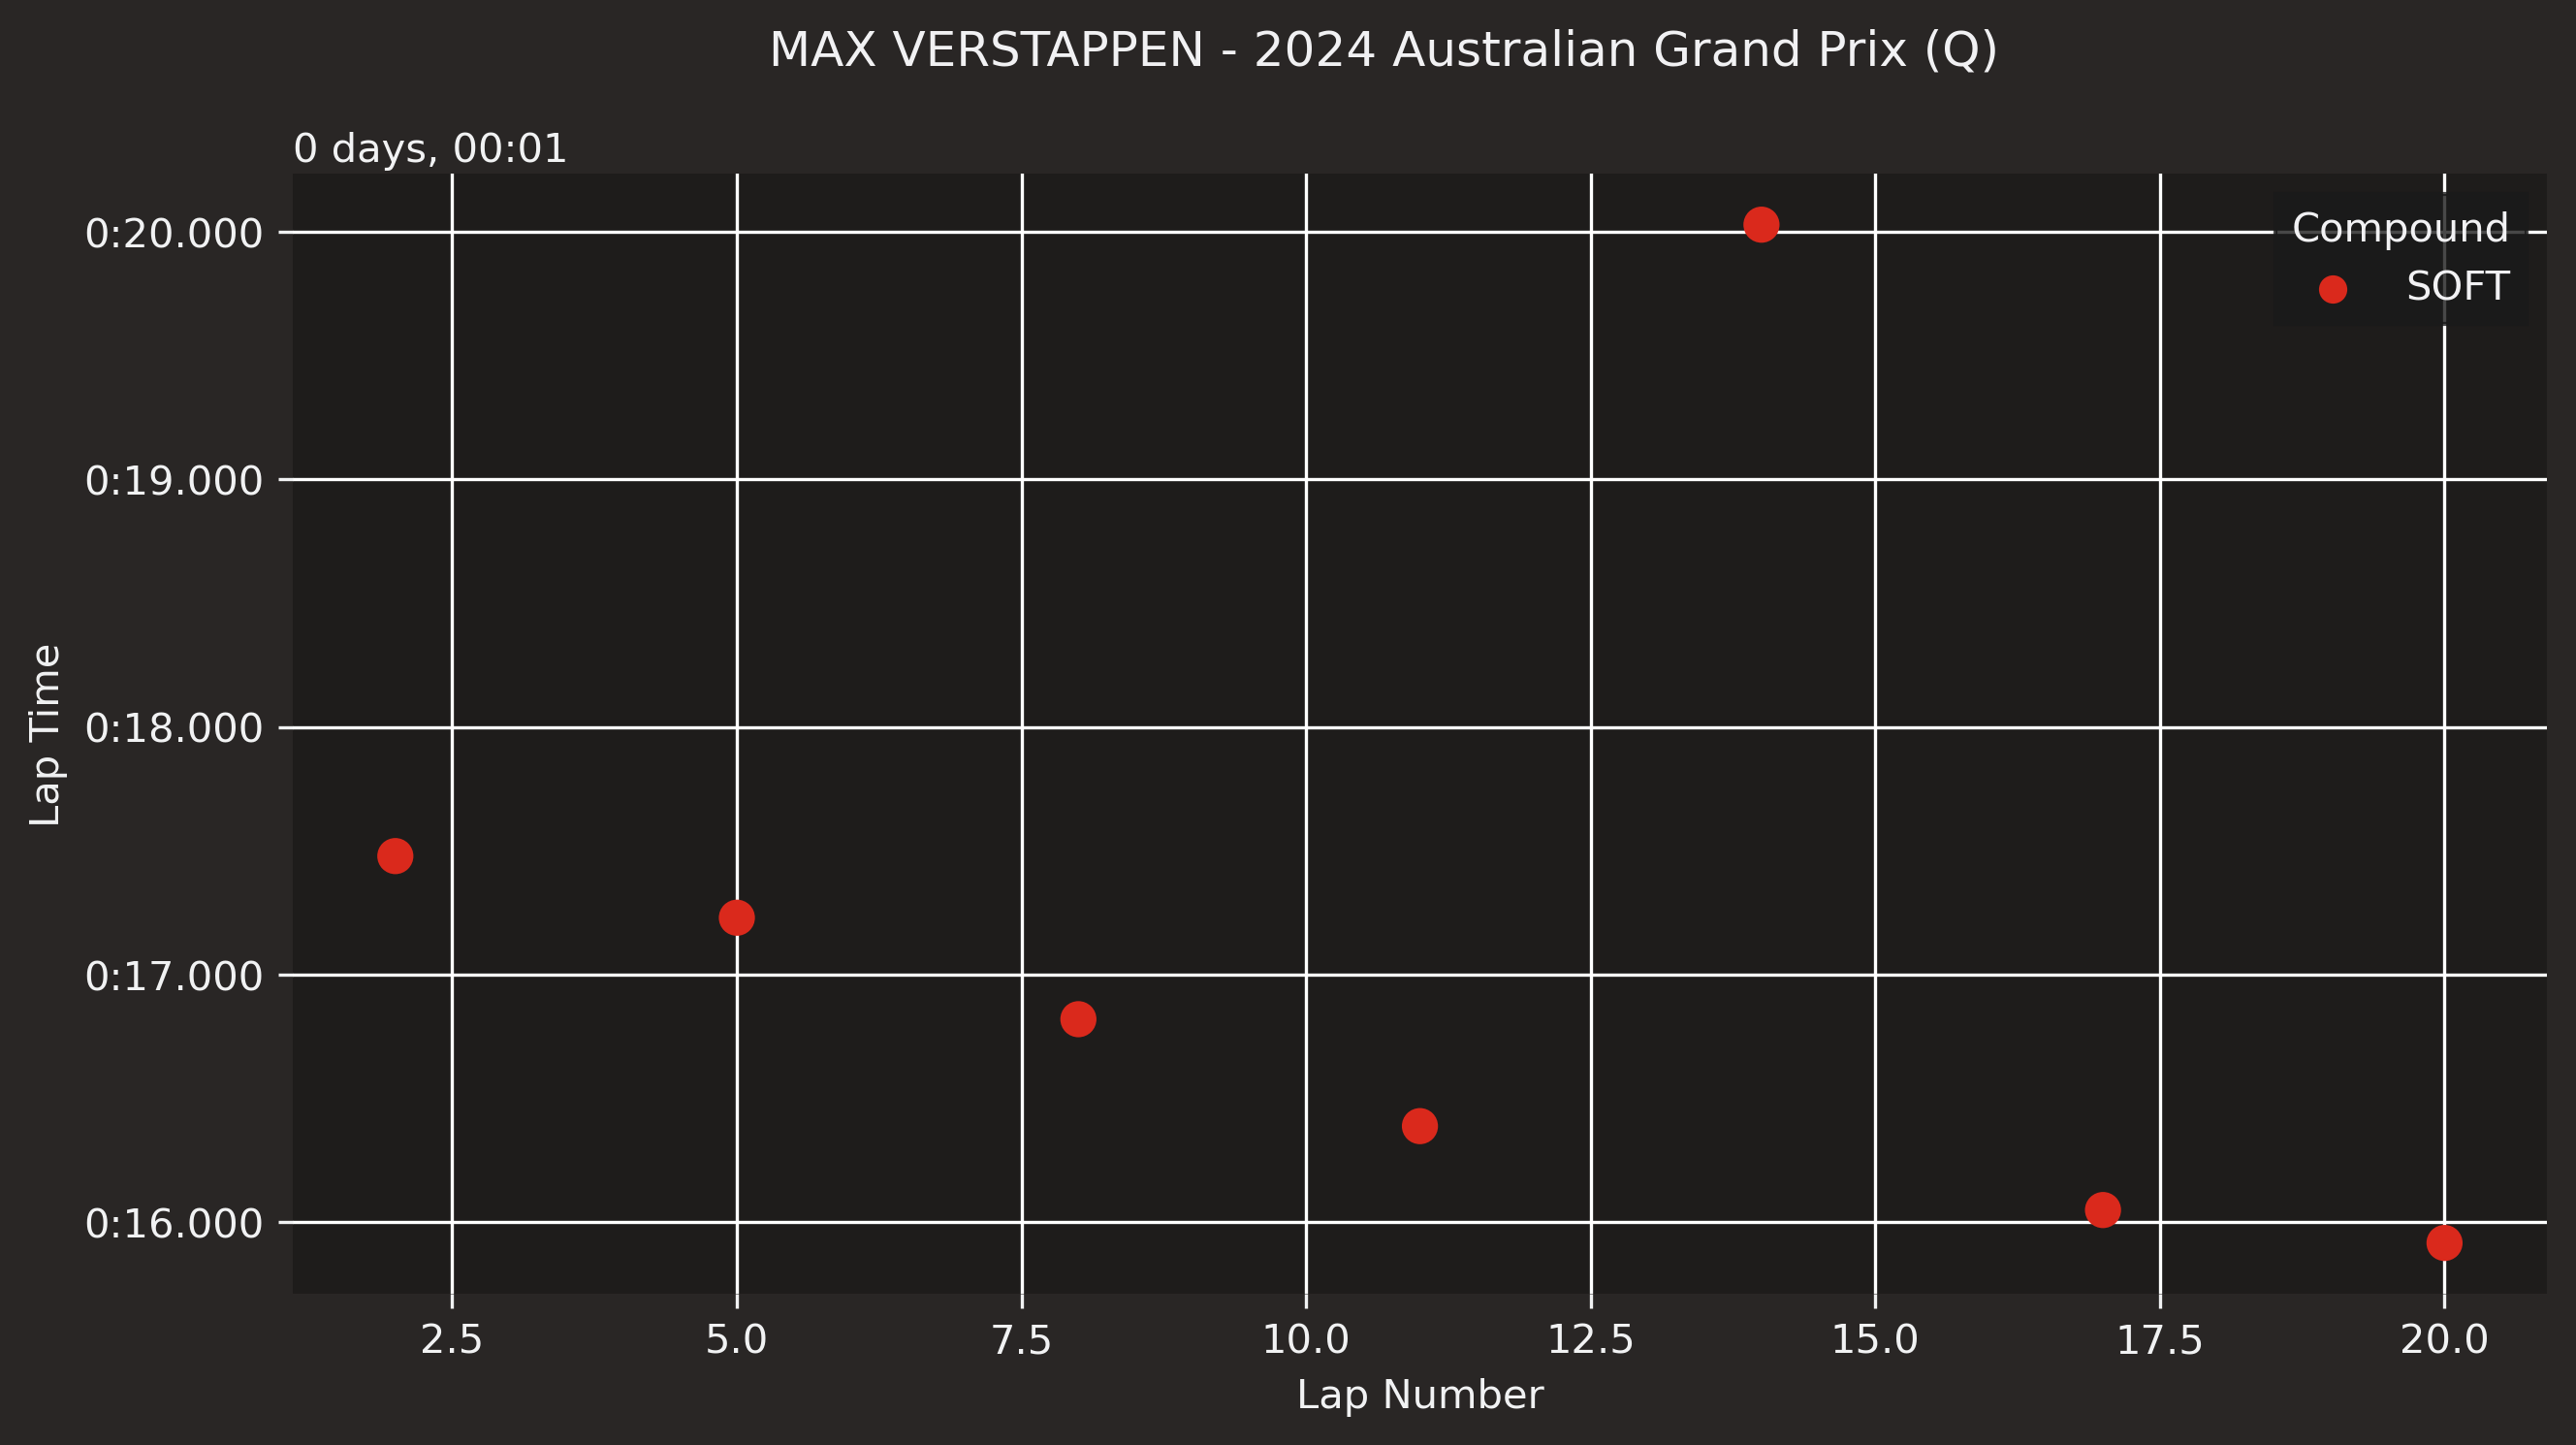

In [39]:
# Podium - 1:
driver_laps = race_data.laps.pick_driver(pod_1['Driver']).pick_quicklaps().reset_index()

fig, ax = plt.subplots(figsize=(10, 5),dpi=300)

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle(f"{fastf1.plotting.DRIVER_TRANSLATE[pod_1['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.show()

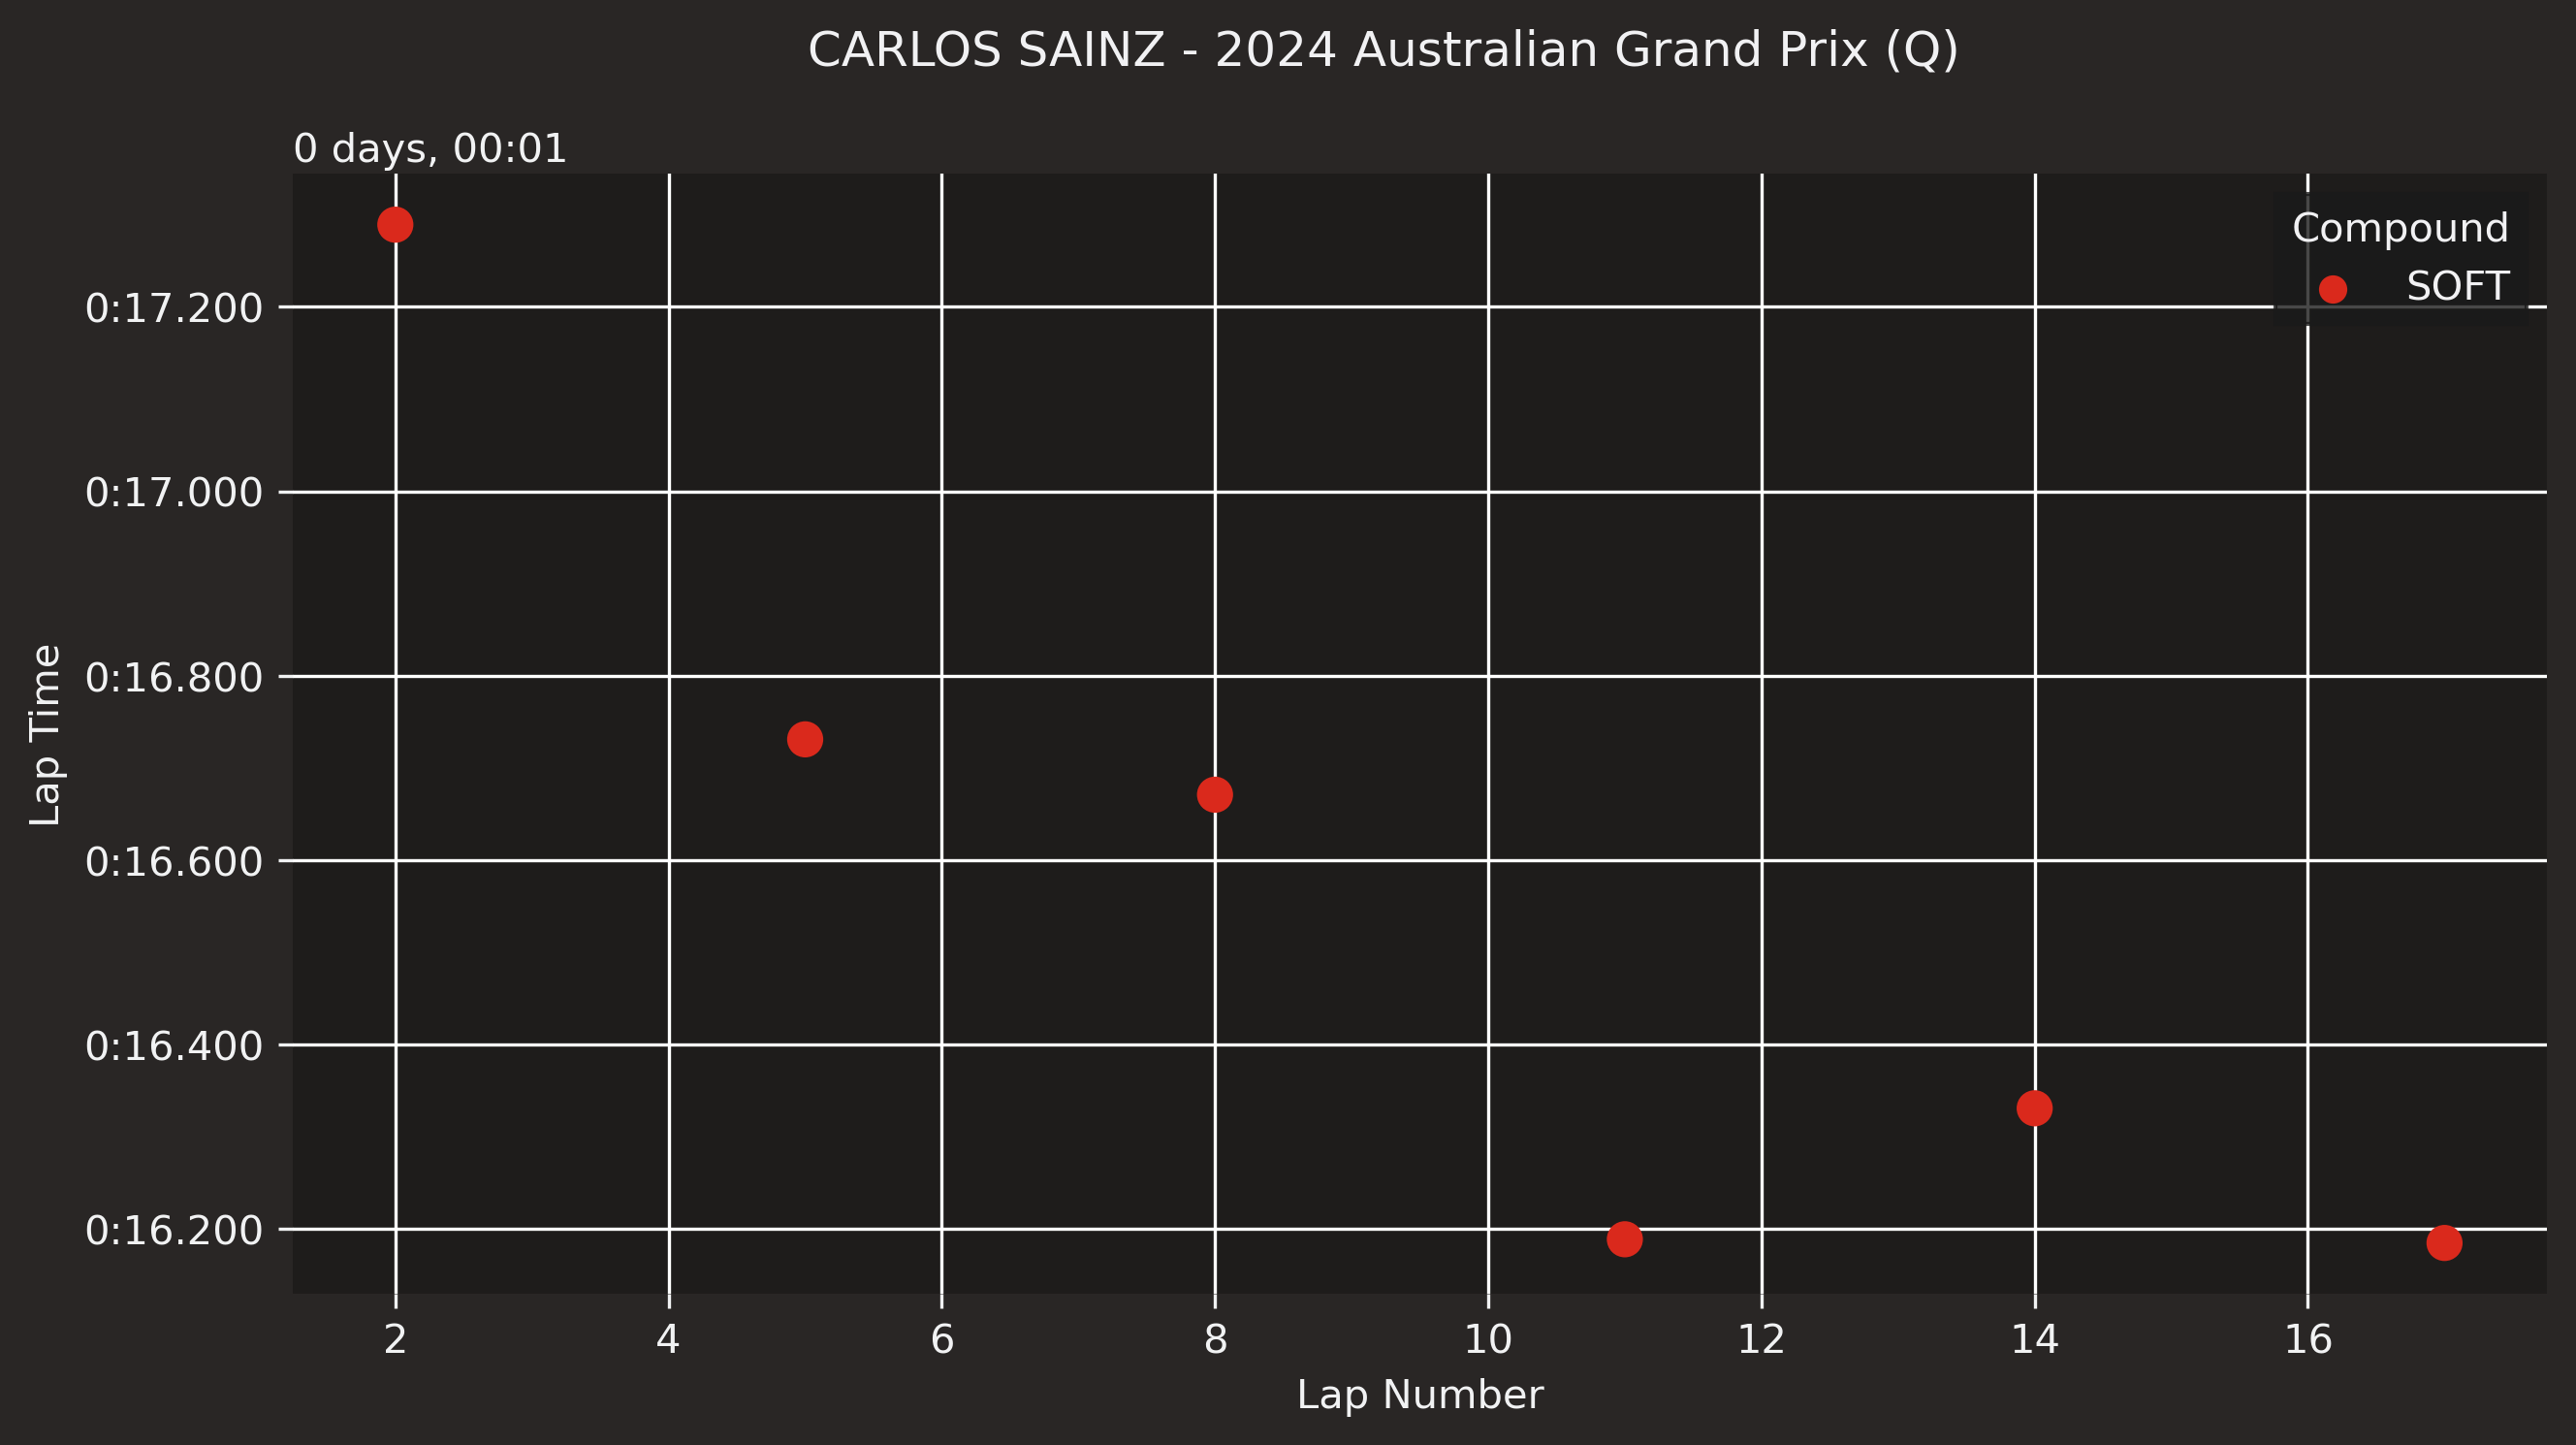

In [40]:
# Podium - 2:
driver_laps = race_data.laps.pick_driver(pod_2['Driver']).pick_quicklaps().reset_index()

fig, ax = plt.subplots(figsize=(10, 5),dpi=300)

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

ax.invert_yaxis()
plt.suptitle(f"{fastf1.plotting.DRIVER_TRANSLATE[pod_2['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.show()

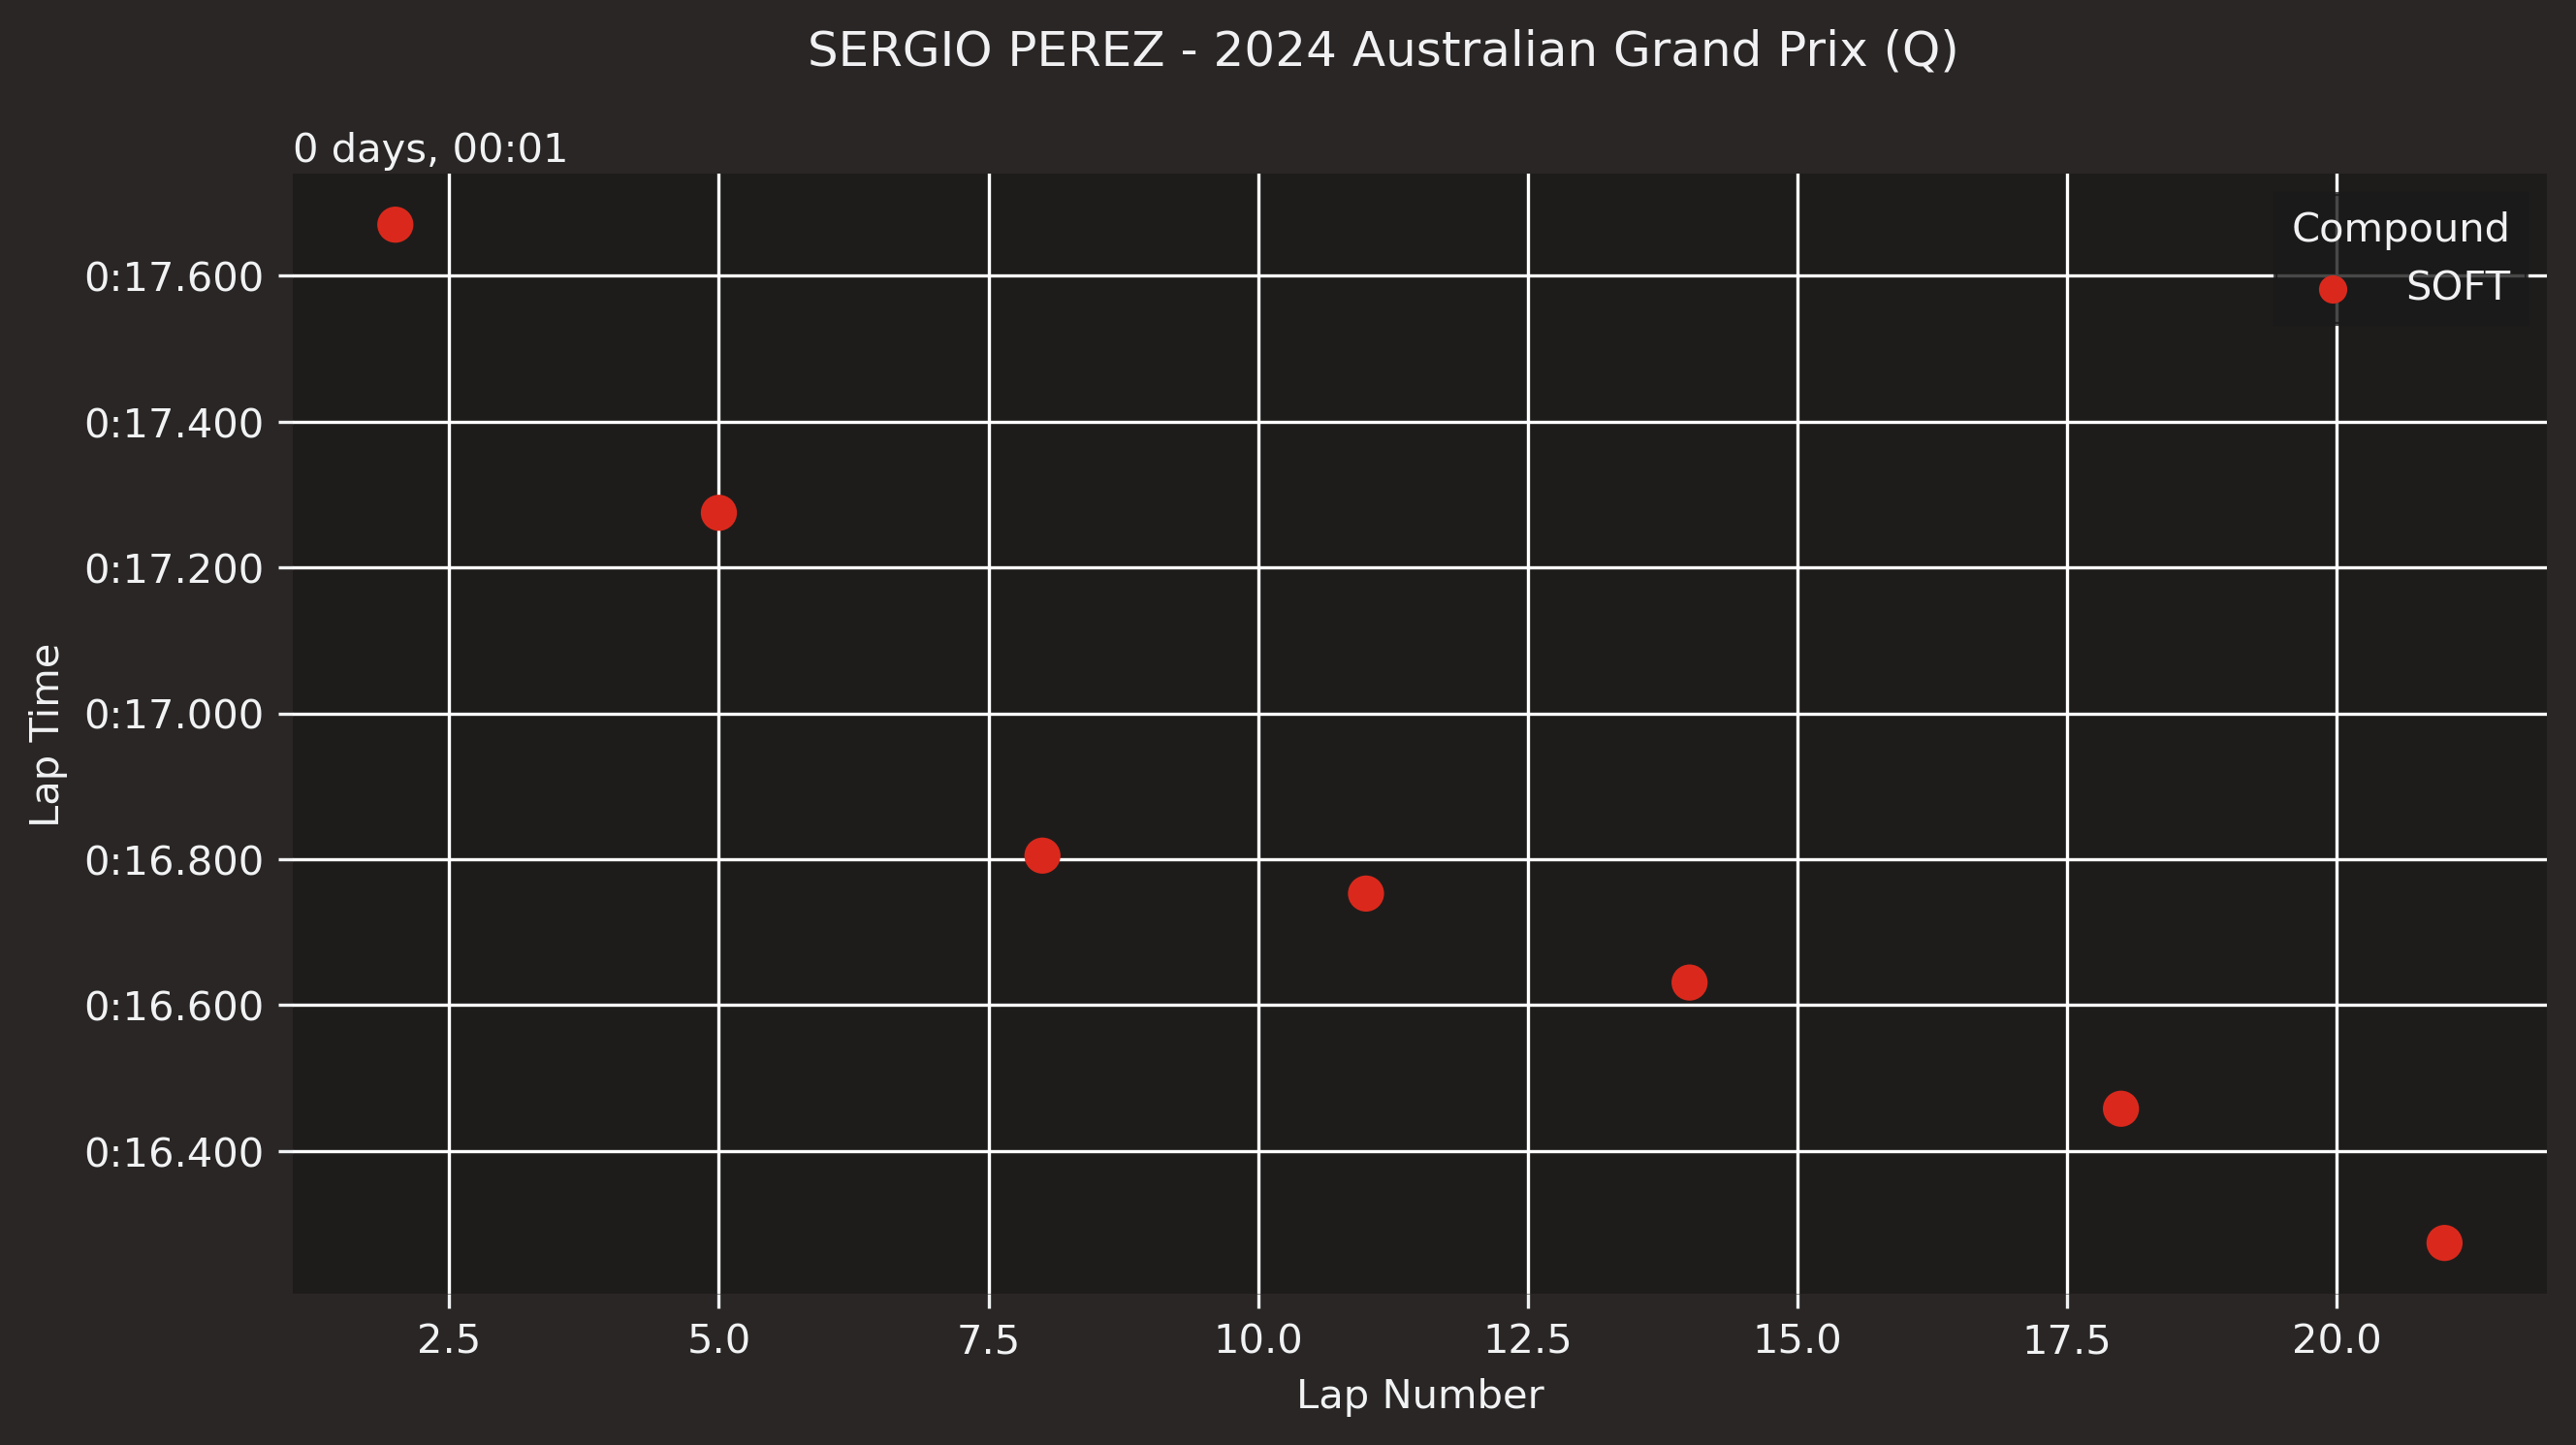

In [41]:
# Podium - 2:
driver_laps = race_data.laps.pick_driver(pod_3['Driver']).pick_quicklaps().reset_index()

fig, ax = plt.subplots(figsize=(10, 5),dpi=300)

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle(f"{fastf1.plotting.DRIVER_TRANSLATE[pod_3['Driver']].upper()} - {year} {race_data.event['EventName']} ({session})")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.show()

In [42]:
from fastf1.api import weather_data,track_status_data

weather = weather_data(race_data.api_path, response=None, livedata=True)
track = track_status_data(race_data.api_path,response=None,livedata = True)

/opt/anaconda3/lib/python3.11/site-packages/fastf1/api.py:32: UserWarning: `fastf1.api` will be considered private in future releases and potentially be removed or changed!
  warnings.warn("`fastf1.api` will be considered private in future releases and "
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for track_status_data


In [43]:
weather = pd.DataFrame(weather)

track = pd.DataFrame(track)

In [44]:
weather

Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0  0 days 00:00:45.081000     18.6      54.0    1024.0     False       34.5   
1  0 days 00:01:45.084000     18.6      54.0    1024.0     False       34.7   
2  0 days 00:02:45.111000     18.7      54.0    1024.0     False       34.8   
3  0 days 00:03:45.122000     18.8      54.0    1024.0      True       34.5   
4  0 days 00:04:45.122000     18.8      54.0    1024.0      True       34.5   
..                    ...      ...       ...       ...       ...        ...   
73 0 days 01:13:45.434000     18.6      54.0    1024.0     False       32.8   
74 0 days 01:14:45.435000     18.5      54.0    1024.0     False       32.5   
75 0 days 01:15:45.438000     18.6      54.0    1024.1     False       32.5   
76 0 days 01:16:45.442000     18.6      55.0    1024.1     False       33.1   
77 0 days 01:17:45.441000     18.6      54.0    1024.0     False       32.6   

    WindDirection  WindSpeed  
0             144        1.6  
1               0        1.0  
2             257        1.1  
3             173        1.6  
4             165        1.5  
..            ...        ...  
73             92        0.8  
74            161        1.1  
75            150        1.6  
76            146        1.0  
77             94        2.0  

[78 rows x 8 columns]